# Prediction on Occurence of Heart Stroke

## SC1015 Mini Project
### AY2022/23 Y127 Group 1

## Essential Libraries
Let's import the necessary libraries.

In [4]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set                                  


<function seaborn.rcmod.set(*args, **kwargs)>

## A Glance at the Dataset
We import the dataset which is in csv format with `read_csv` from the pandas library.

In [5]:
heart_disease=pd.read_csv('heart_disease_data.csv')
heart_disease.head()

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0    Male   39   postgraduate              0         0.0     0.0   
1  Female   46  primaryschool              0         0.0     0.0   
2    Male   48     uneducated              1        20.0     0.0   
3  Female   61       graduate              1        30.0     0.0   
4  Female   46       graduate              1        23.0     0.0   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0              no             0         0    195.0  106.0   70.0  26.97   
1              no             0         0    250.0  121.0   81.0  28.73   
2              no             0         0    245.0  127.5   80.0  25.34   
3              no             1         0    225.0  150.0   95.0  28.58   
4              no             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose Heart_ stroke  
0       80.0     77.0            No  
1       95.0     76.0            No  
2       75.0     70.0            No  
3       65.0    103.0           yes  
4       85.0     85.0            No

Our dataset is from Kaggle: **"Heart Disease Dataset"** by *Mazaharul Hasnine Mirza

Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

> **Gender**: gender of the patient   
> **Age**: age of the patient (years)  
> **education**: uneducated, primaryschool, graduate, postgraduate    
> **currentSmoker**: 0 (No), 1 (Yes)   
> **cigsPerDay**: Number of cigarettes per day = 0...70   
> **BPMeds**: Whether or not the person is taking blood pressure drugs = 0 (No), 1 (Yes)    
> **prevalentStroke**: Whether or not the person has had a stroke = 0 (No), 1 (Yes)   
> **prevalentHyp**: Blood pressure (BP) > = 140 mm Hg systolic and/or > = 90 diastolic = 0 (No), 1 (Yes)   
> **diabetes**: Whether or not the person has diabetes = 0 (No), 1 (Yes)   
> **TotChol**: total serum cholesterol (mm/dl)   
> **sysBP**: Systolic blood pressure = 84...220   
> **diaBP**: Diastolic blood pressure = 48...140   
> **BMI**: Body Mass Index = 16...57   
> **heartRate**: Heart rate = 44...143   
> **glucose**: Blood Sugar = 40...394   
> **Heart_stroke**: Whether or not the person has had a heart attack = 0 (No), 1 (Yes)   


Let's have an overview of the dataset, i.e. the `type` and `shape`.

In [6]:
print("Data type:\t", type(heart_disease))
print("Data dims:\t", heart_disease.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dims:	 (4238, 16)


We check the data type of each column with `info`.

In [7]:
heart_disease.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


## Data Preparation & Data Cleaning
We will now prepare and clean our dataset.

First up, we use describe to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min), **first quartile** (denoted by 25%), **median** (denoted by 50%), **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the relevant columns.

In [8]:
heart_disease.describe()

age  currentSmoker   cigsPerDay       BPMeds  prevalentHyp  \
count  4238.000000    4238.000000  4209.000000  4185.000000   4238.000000   
mean     49.584946       0.494101     9.003089     0.029630      0.310524   
std       8.572160       0.500024    11.920094     0.169584      0.462763   
min      32.000000       0.000000     0.000000     0.000000      0.000000   
25%      42.000000       0.000000     0.000000     0.000000      0.000000   
50%      49.000000       0.000000     0.000000     0.000000      0.000000   
75%      56.000000       1.000000    20.000000     0.000000      1.000000   
max      70.000000       1.000000    70.000000     1.000000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4238.000000  4188.000000  4238.000000  4238.000000  4219.000000   
mean      0.025720   236.721585   132.352407    82.893464    25.802008   
std       0.158316    44.590334    22.038097    11.910850     4.080111   
min       0.000000   107.000000    83.500000    48.000000    15.540000   
25%       0.000000   206.000000   117.000000    75.000000    23.070000   
50%       0.000000   234.000000   128.000000    82.000000    25.400000   
75%       0.000000   263.000000   144.000000    89.875000    28.040000   
max       1.000000   696.000000   295.000000   142.500000    56.800000   

         heartRate      glucose  
count  4237.000000  3850.000000  
mean     75.878924    81.966753  
std      12.026596    23.959998  
min      44.000000    40.000000  
25%      68.000000    71.000000  
50%      75.000000    78.000000  
75%      83.000000    87.000000  
max     143.000000   394.000000

We change the name of the variables to better suit our convention.

In [9]:
heart_disease.rename(columns={'BPMeds' : 'BP_Medication'}, inplace=True)
heart_disease.rename(columns={'prevalentHyp' : 'Prev_Hypertension'}, inplace=True)
heart_disease.rename(columns={'currentSmoker' : 'Current_Smoker'}, inplace=True)
heart_disease.rename(columns={'cigsPerDay' : 'Cigs_Per_Day'}, inplace=True)
heart_disease.rename(columns={'prevalentStroke' : 'Prev_Stroke'}, inplace=True)
heart_disease.rename(columns={'totChol' : 'Tot_Cholesterol'}, inplace=True)
heart_disease.rename(columns={'sysBP' : 'Systolic_BP'}, inplace=True)
heart_disease.rename(columns={'diaBP' : 'Diastolic_BP'}, inplace=True)
heart_disease.rename(columns={'heartRate' : 'Heart_Rate'}, inplace=True)
heart_disease.rename(columns={'glucose' : 'Glucose_Level'}, inplace=True)
heart_disease.rename(columns={'Heart_ stroke' : 'Heart_Stroke'}, inplace=True)


heart_disease.columns=heart_disease.columns.str.upper()

We check for NULL inputs and deal with them accordingly.

We want to create an additional categorical data for age, named as **AGEGROUP**. We start from 30 with intervals of 10 to 80 as the minimum for age found in data is 30 and the maximum age found in data is 70.

In [389]:
bins= [30,40,50,60,70,80]
labels = ['30-39','40-49','50-59','60-69','70-79']
heart_disease['AGEGROUP'] = pd.cut(heart_disease['AGE'], bins=bins, labels=labels, right=False)
heart_disease = heart_disease[['GENDER', 'AGE', 'AGEGROUP', 'EDUCATION', 'CURRENT_SMOKER', 'CIGS_PER_DAY', 'BP_MEDICATION', 'PREV_STROKE', 
                              'PREV_HYPERTENSION', 'DIABETES', 'TOT_CHOLESTEROL', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'BMI', 'HEART_RATE', 
                              'GLUCOSE_LEVEL', 'HEART_STROKE']]
heart_disease

GENDER  AGE AGEGROUP      EDUCATION  CURRENT_SMOKER  CIGS_PER_DAY  \
0       Male   39    30-39   postgraduate               0           0.0   
1     Female   46    40-49  primaryschool               0           0.0   
2       Male   48    40-49     uneducated               1          20.0   
3     Female   61    60-69       graduate               1          30.0   
4     Female   46    40-49       graduate               1          23.0   
...      ...  ...      ...            ...             ...           ...   
4233    Male   50    50-59     uneducated               1           1.0   
4234    Male   51    50-59       graduate               1          43.0   
4235  Female   48    40-49  primaryschool               1          20.0   
4236  Female   44    40-49     uneducated               1          15.0   
4237  Female   52    50-59  primaryschool               0           0.0   

      BP_MEDICATION PREV_STROKE  PREV_HYPERTENSION  DIABETES  TOT_CHOLESTEROL  \
0               0.0          no                  0         0            195.0   
1               0.0          no                  0         0            250.0   
2               0.0          no                  0         0            245.0   
3               0.0          no                  1         0            225.0   
4               0.0          no                  0         0            285.0   
...             ...         ...                ...       ...              ...   
4233            0.0          no                  1         0            313.0   
4234            0.0          no                  0         0            207.0   
4235            NaN          no                  0         0            248.0   
4236            0.0          no                  0         0            210.0   
4237            0.0          no                  0         0            269.0   

      SYSTOLIC_BP  DIASTOLIC_BP    BMI  HEART_RATE  GLUCOSE_LEVEL HEART_STROKE  
0           106.0          70.0  26.97        80.0           77.0           No  
1           121.0          81.0  28.73        95.0           76.0           No  
2           127.5          80.0  25.34        75.0           70.0           No  
3           150.0          95.0  28.58        65.0          103.0          yes  
4           130.0          84.0  23.10        85.0           85.0           No  
...           ...           ...    ...         ...            ...          ...  
4233        179.0          92.0  25.97        66.0           86.0          yes  
4234        126.5          80.0  19.71        65.0           68.0           No  
4235        131.0          72.0  22.00        84.0           86.0           No  
4236        126.5          87.0  19.16        86.0            NaN           No  
4237        133.5          83.0  21.47        80.0          107.0           No  

[4238 rows x 17 columns]

The following is the newly edited dataframe with added column, **Age Group** and edited values for some variables.

We changed the values of **Current Smoker**, **Blood Pressure Medication**, **Prevalent Hypertension**, **Prevalent Hypertension**, **Diabetes** and **Heart Stroke** to boolean values. 

We also changed the values of **Education** to better suit our convention.

In [251]:
heart_dis = heart_disease.copy()                                 # Create copy of DataFrame
heart_dis = heart_dis.astype({'CURRENT_SMOKER': bool, 'PREV_HYPERTENSION': bool, 'DIABETES': bool})  # Transform multiple integers to boolean
heart_dis = heart_dis.replace({'PREV_STROKE': {'yes': True, 'no': False}, 'HEART_STROKE': {'yes': True, 'No': False}})
heart_dis = heart_dis.replace({'BP_MEDICATION': {1: True, 0: False}})
heart_dis['EDUCATION'] = heart_dis['EDUCATION'].replace(['primaryschool', 'uneducated', 'graduate', 'postgraduate'], ['Primary School', 'Uneducated', 'Graduate', 'Postgraduate'])
heart_dis

GENDER  AGE AGEGROUP       EDUCATION  CURRENT_SMOKER  CIGS_PER_DAY  \
0       Male   39    30-39    Postgraduate           False           0.0   
1     Female   46    40-49  Primary School           False           0.0   
2       Male   48    40-49      Uneducated            True          20.0   
3     Female   61    60-69        Graduate            True          30.0   
4     Female   46    40-49        Graduate            True          23.0   
...      ...  ...      ...             ...             ...           ...   
4233    Male   50    50-59      Uneducated            True           1.0   
4234    Male   51    50-59        Graduate            True          43.0   
4235  Female   48    40-49  Primary School            True          20.0   
4236  Female   44    40-49      Uneducated            True          15.0   
4237  Female   52    50-59  Primary School           False           0.0   

     BP_MEDICATION  PREV_STROKE  PREV_HYPERTENSION  DIABETES  TOT_CHOLESTEROL  \
0            False        False              False     False            195.0   
1            False        False              False     False            250.0   
2            False        False              False     False            245.0   
3            False        False               True     False            225.0   
4            False        False              False     False            285.0   
...            ...          ...                ...       ...              ...   
4233         False        False               True     False            313.0   
4234         False        False              False     False            207.0   
4235           NaN        False              False     False            248.0   
4236         False        False              False     False            210.0   
4237         False        False              False     False            269.0   

      SYSTOLIC_BP  DIASTOLIC_BP    BMI  HEART_RATE  GLUCOSE_LEVEL  \
0           106.0          70.0  26.97        80.0           77.0   
1           121.0          81.0  28.73        95.0           76.0   
2           127.5          80.0  25.34        75.0           70.0   
3           150.0          95.0  28.58        65.0          103.0   
4           130.0          84.0  23.10        85.0           85.0   
...           ...           ...    ...         ...            ...   
4233        179.0          92.0  25.97        66.0           86.0   
4234        126.5          80.0  19.71        65.0           68.0   
4235        131.0          72.0  22.00        84.0           86.0   
4236        126.5          87.0  19.16        86.0            NaN   
4237        133.5          83.0  21.47        80.0          107.0   

      HEART_STROKE  
0            False  
1            False  
2            False  
3             True  
4            False  
...            ...  
4233          True  
4234         False  
4235         False  
4236         False  
4237         False  

[4238 rows x 17 columns]

Now we check the data type of each columns of the cleaned data with `info` again.

In [252]:
heart_dis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GENDER             4238 non-null   object  
 1   AGE                4238 non-null   int64   
 2   AGEGROUP           4238 non-null   category
 3   EDUCATION          4133 non-null   object  
 4   CURRENT_SMOKER     4238 non-null   bool    
 5   CIGS_PER_DAY       4209 non-null   float64 
 6   BP_MEDICATION      4185 non-null   object  
 7   PREV_STROKE        4238 non-null   bool    
 8   PREV_HYPERTENSION  4238 non-null   bool    
 9   DIABETES           4238 non-null   bool    
 10  TOT_CHOLESTEROL    4188 non-null   float64 
 11  SYSTOLIC_BP        4238 non-null   float64 
 12  DIASTOLIC_BP       4238 non-null   float64 
 13  BMI                4219 non-null   float64 
 14  HEART_RATE         4237 non-null   float64 
 15  GLUCOSE_LEVEL      3850 non-null   float64 
 16  HEART_

Here we check for NULL inputs and we will deal with them accordingly.

In [253]:
heart_dis.isnull().sum()

GENDER                 0
AGE                    0
AGEGROUP               0
EDUCATION            105
CURRENT_SMOKER         0
CIGS_PER_DAY          29
BP_MEDICATION         53
PREV_STROKE            0
PREV_HYPERTENSION      0
DIABETES               0
TOT_CHOLESTEROL       50
SYSTOLIC_BP            0
DIASTOLIC_BP           0
BMI                   19
HEART_RATE             1
GLUCOSE_LEVEL        388
HEART_STROKE           0
dtype: int64

We want to clear the null values of `CIGS_PER_DAY`, `TOT_CHOLESTEROL`, `BMI`, `HEART_RATE` and `GLUCOSE_LEVEL`. We are dealing with numerical variables first, so let us get to know more about measure of central tendency.

### Measure of Central Tendency

### Impute with mean, median or mode value
* **When to use mean**: If the data is symmetrically distributed, one can make use of mean for replacing missing value. One can use box plot or distribution plot to find out about the data distribution.
* **When to use median**: If the data is skewed or if the data consists of outliers, one may want to use median.
* **When to use mode**: If the data is skewed, one may want to use mode.


Once again, we use `describe` to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min), **first quartile** (denoted by 25%), **median** (denoted by 50%), **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of each of the columns of the cleaned dataframe.

In [254]:
heart_dis[["CIGS_PER_DAY", "TOT_CHOLESTEROL", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]].describe()

CIGS_PER_DAY  TOT_CHOLESTEROL          BMI   HEART_RATE  GLUCOSE_LEVEL
count   4209.000000      4188.000000  4219.000000  4237.000000    3850.000000
mean       9.003089       236.721585    25.802008    75.878924      81.966753
std       11.920094        44.590334     4.080111    12.026596      23.959998
min        0.000000       107.000000    15.540000    44.000000      40.000000
25%        0.000000       206.000000    23.070000    68.000000      71.000000
50%        0.000000       234.000000    25.400000    75.000000      78.000000
75%       20.000000       263.000000    28.040000    83.000000      87.000000
max       70.000000       696.000000    56.800000   143.000000     394.000000

Now we plot the boxplot for *five* variables, i.e. **cigarettes per day**, **total cholesterol**, **bmi**, **heart rate** and **glucose level**.

Text(0.5, 1.0, 'Glucose Level')

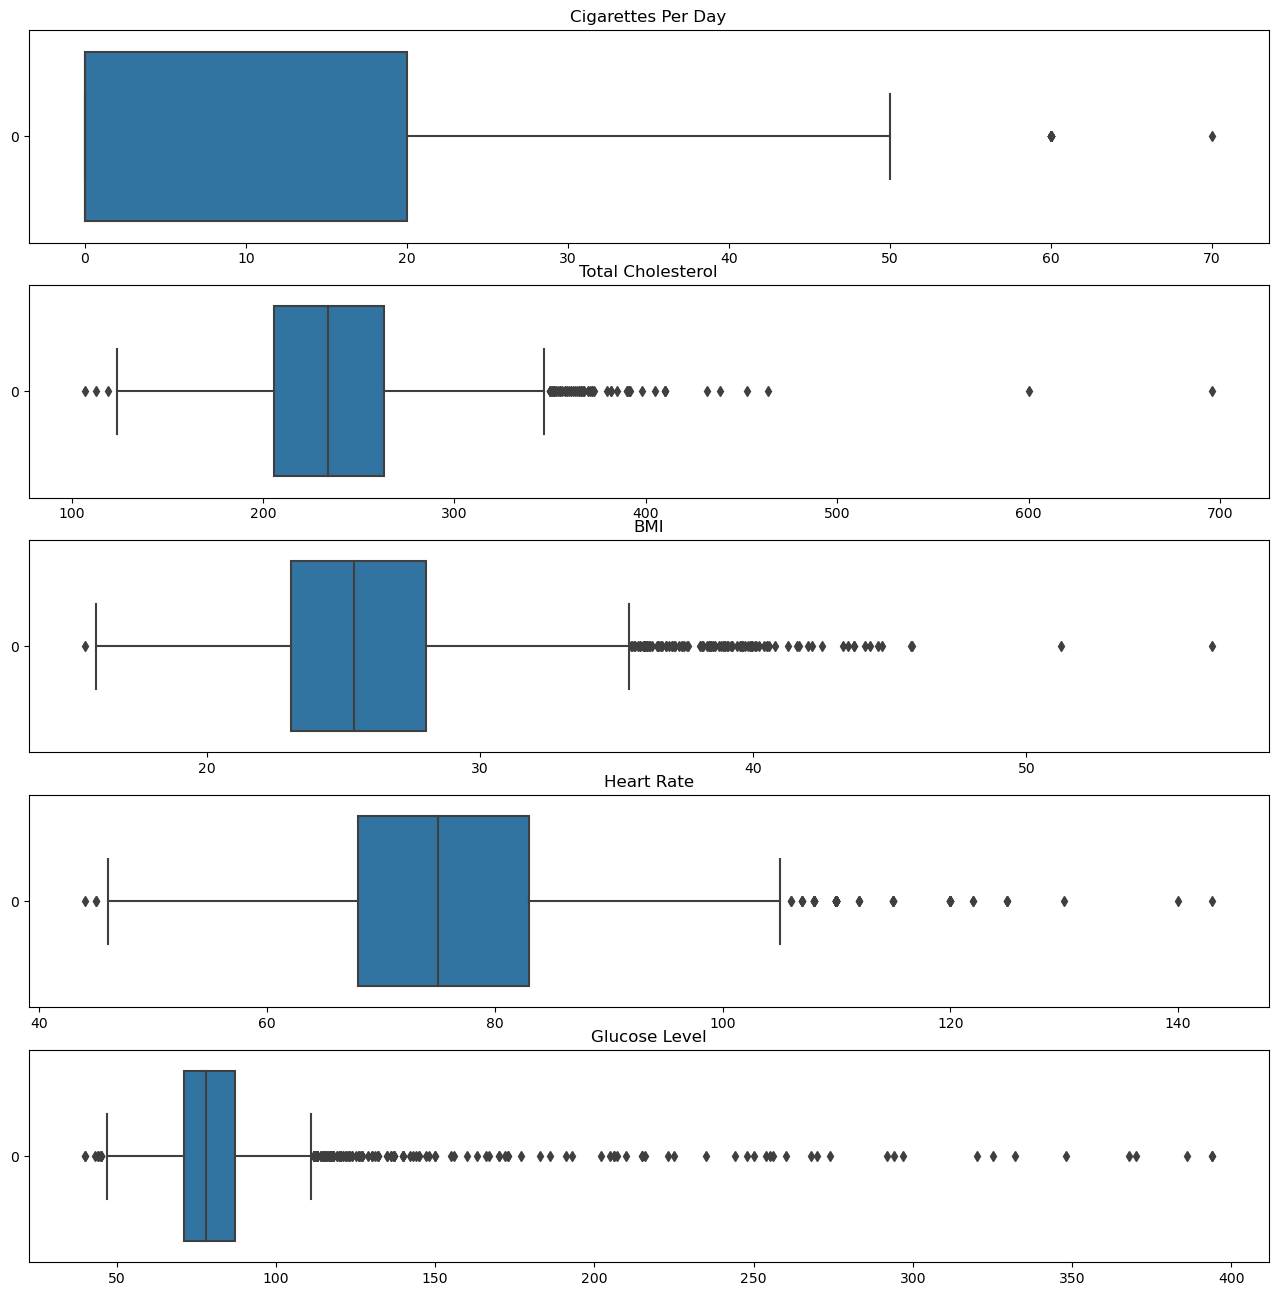

In [255]:
f, axes=plt.subplots(5, 1, figsize=(16,16))

sb.boxplot(data=heart_dis["CIGS_PER_DAY"], orient='h', ax=axes[0]).set_title("Cigarettes Per Day")
sb.boxplot(data=heart_dis["TOT_CHOLESTEROL"], orient='h', ax=axes[1]).set_title("Total Cholesterol")
sb.boxplot(data=heart_dis["BMI"], orient='h', ax=axes[2]).set_title("BMI")
sb.boxplot(data=heart_dis["HEART_RATE"], orient='h', ax=axes[3]).set_title("Heart Rate")
sb.boxplot(data=heart_dis["GLUCOSE_LEVEL"], orient='h', ax=axes[4]).set_title("Glucose Level")

### Skewness
Skewness is a measure of symmetry, which in turn tells us more about the distribution of the data.

- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
- If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed.
- If the skewness is less than -1 or greater than 1, the data is highly skewed.



From the skewness of each variable given above, we can conclude that **Total Cholesterol**, **BMI** and **Heart Rate** are moderately skewed, whereas **Cigarettes per Day** and **Glucose Level** are highly skewed.

In [256]:
dArr=["CIGS_PER_DAY", "TOT_CHOLESTEROL", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]

for i in dArr:
    print("Skewness of ", i, "\t: ", heart_dis[i].skew())

Skewness of  CIGS_PER_DAY 	:  1.247909902517148
Skewness of  TOT_CHOLESTEROL 	:  0.8714220097202442
Skewness of  BMI 	:  0.9819743063688907
Skewness of  HEART_RATE 	:  0.644481733525319
Skewness of  GLUCOSE_LEVEL 	:  6.213401853788979


Here we observe the **mean**, **median** and **mode** of our data. These measures of central of tendency gives a summary of the center point of the dataset.

In [257]:
for i in dArr:
    print(i, "Mean:", heart_disease[i].mean(), "\tMedian:", heart_disease[i].median(), "\t\tMode:", heart_disease[i].mode())

CIGS_PER_DAY Mean: 9.003088619624615 	Median: 0.0 		Mode: 0    0.0
Name: CIGS_PER_DAY, dtype: float64
TOT_CHOLESTEROL Mean: 236.72158548233045 	Median: 234.0 		Mode: 0    240.0
Name: TOT_CHOLESTEROL, dtype: float64
BMI Mean: 25.80200758473571 	Median: 25.4 		Mode: 0    22.19
1    22.54
2    22.91
3    23.48
Name: BMI, dtype: float64
HEART_RATE Mean: 75.87892376681614 	Median: 75.0 		Mode: 0    75.0
Name: HEART_RATE, dtype: float64
GLUCOSE_LEVEL Mean: 81.96675324675324 	Median: 78.0 		Mode: 0    75.0
Name: GLUCOSE_LEVEL, dtype: float64


After considering the skewness, we decided to use **median** to fill the null values for **Total Cholesterol**, **BMI**, **Heart Rate**, **Glucose Level** and **Cigarettes per day**. As such, we can replace all the null values without changing the distribution. Futhermore, the values of mean and median are pretty much similar, with only a very small margin, that's why we chose median over mode for the highly skewed data.

In [258]:
from sklearn.impute import SimpleImputer

imputer_mean=SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer_median=SimpleImputer(missing_values=np.NaN, strategy='median')
imputer_mode=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [259]:
heart_dis.CIGS_PER_DAY=imputer_median.fit_transform(heart_dis["CIGS_PER_DAY"].values.reshape(-1,1))[:,0]
heart_dis.TOT_CHOLESTEROL=imputer_median.fit_transform(heart_dis["TOT_CHOLESTEROL"].values.reshape(-1,1))[:,0]
heart_dis.BMI=imputer_median.fit_transform(heart_dis["BMI"].values.reshape(-1,1))[:,0]
heart_dis.HEART_RATE=imputer_median.fit_transform(heart_dis["HEART_RATE"].values.reshape(-1,1))[:,0]
heart_dis.GLUCOSE_LEVEL=imputer_median.fit_transform(heart_dis["GLUCOSE_LEVEL"].values.reshape(-1,1))[:,0]

Here we count the number of null data from each column of the cleaned data. Notice that we still have null values in the categorical variables **Education** and **BP_MEDICATION**.

In [260]:
heart_dis.isnull().sum()

GENDER                 0
AGE                    0
AGEGROUP               0
EDUCATION            105
CURRENT_SMOKER         0
CIGS_PER_DAY           0
BP_MEDICATION         53
PREV_STROKE            0
PREV_HYPERTENSION      0
DIABETES               0
TOT_CHOLESTEROL        0
SYSTOLIC_BP            0
DIASTOLIC_BP           0
BMI                    0
HEART_RATE             0
GLUCOSE_LEVEL          0
HEART_STROKE           0
dtype: int64

The box plot with all the numerical null data replaced with median. Notice that the distribution stays the same.

Text(0.5, 1.0, 'Glucose Level')

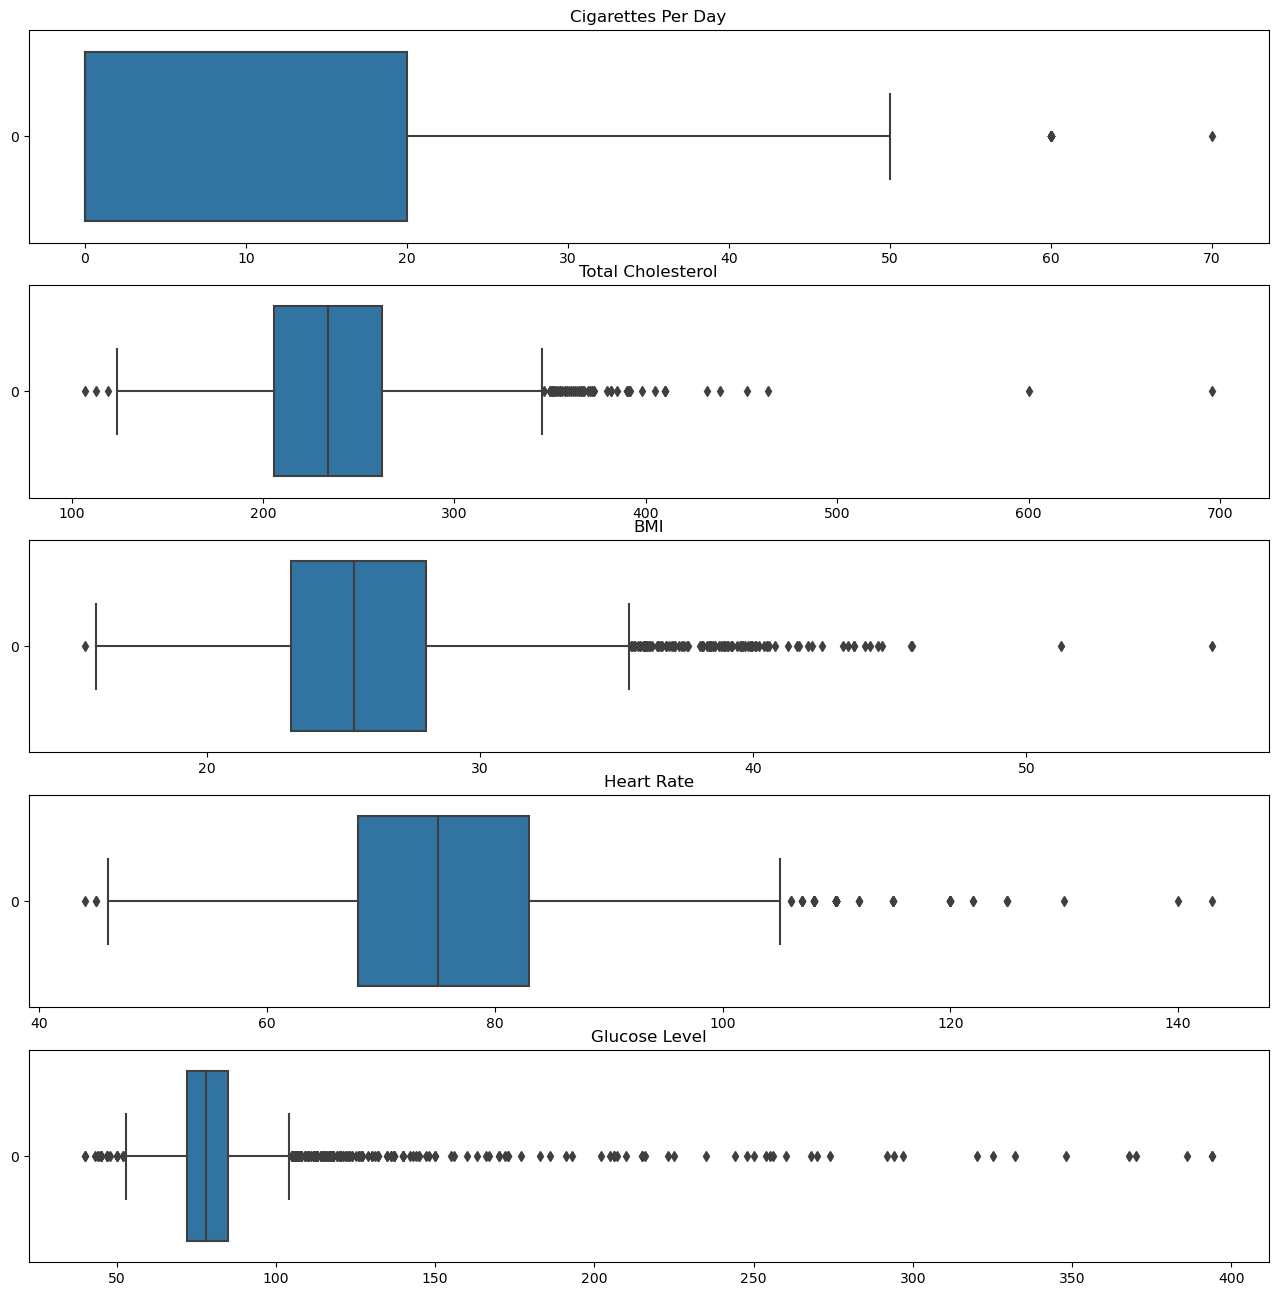

In [261]:
f, axes=plt.subplots(5, 1, figsize=(16,16))

sb.boxplot(data=heart_dis["CIGS_PER_DAY"], orient='h', ax=axes[0]).set_title("Cigarettes Per Day")
sb.boxplot(data=heart_dis["TOT_CHOLESTEROL"], orient='h', ax=axes[1]).set_title("Total Cholesterol")
sb.boxplot(data=heart_dis["BMI"], orient='h', ax=axes[2]).set_title("BMI")
sb.boxplot(data=heart_dis["HEART_RATE"], orient='h', ax=axes[3]).set_title("Heart Rate")
sb.boxplot(data=heart_dis["GLUCOSE_LEVEL"], orient='h', ax=axes[4]).set_title("Glucose Level")

Now we deal with the null values which are non-numerical by filling **NotDefined**.

In [262]:
for col in ["EDUCATION", "BP_MEDICATION"]:
    heart_dis[col].fillna(value="NotDefined", inplace=True)

Now our data does not consist of any NULL data anymore.

In [263]:
heart_dis.isnull().sum()

GENDER               0
AGE                  0
AGEGROUP             0
EDUCATION            0
CURRENT_SMOKER       0
CIGS_PER_DAY         0
BP_MEDICATION        0
PREV_STROKE          0
PREV_HYPERTENSION    0
DIABETES             0
TOT_CHOLESTEROL      0
SYSTOLIC_BP          0
DIASTOLIC_BP         0
BMI                  0
HEART_RATE           0
GLUCOSE_LEVEL        0
HEART_STROKE         0
dtype: int64

The data consists of around 5000 entries. We manipulate the data types to facilitate our exploratory data analysis and to reduce memory usage in order to achieve shorter processing time.

In [264]:
def to_category(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("category")
    
def to_float32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float32")

def to_int32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("int32")
         

In [265]:
to_category(heart_dis, ["EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "GENDER", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES", "HEART_STROKE"])
to_float32(heart_dis, ["CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"])
to_int32(heart_dis, "AGE")


This is the updated data type of all columns after the catagory for selected columns have been changed.

In [266]:
heart_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GENDER             4238 non-null   category
 1   AGE                4238 non-null   int32   
 2   AGEGROUP           4238 non-null   category
 3   EDUCATION          4238 non-null   category
 4   CURRENT_SMOKER     4238 non-null   category
 5   CIGS_PER_DAY       4238 non-null   float32 
 6   BP_MEDICATION      4238 non-null   category
 7   PREV_STROKE        4238 non-null   category
 8   PREV_HYPERTENSION  4238 non-null   category
 9   DIABETES           4238 non-null   category
 10  TOT_CHOLESTEROL    4238 non-null   float32 
 11  SYSTOLIC_BP        4238 non-null   float32 
 12  DIASTOLIC_BP       4238 non-null   float32 
 13  BMI                4238 non-null   float32 
 14  HEART_RATE         4238 non-null   float32 
 15  GLUCOSE_LEVEL      4238 non-null   float32 
 16  HEART_

Here is the list of Age Group involved in the occurance of heart stroke, using unique function.

In [268]:
print("Number of unique AGEGROUP:\t", len(heart_dis["AGEGROUP"].unique()))

Number of unique AGEGROUP:	 5


We have 5 unique values. The number of data for each unique age group is shown below.

In [269]:
print("Number of unique AGEGROUP:\t", len(heart_dis["AGEGROUP"].unique()))
heart_dis["AGEGROUP"].value_counts()

Number of unique AGEGROUP:	 5


40-49    1660
50-59    1333
60-69     688
30-39     555
70-79       2
Name: AGEGROUP, dtype: int64

## Exploratory Data Analysis & Visualization (prelude)
We are now ready to work on our Exploratory Data Analysis and Visualization. However, this is just a preliminary stage as more data cleaning is required. More outliers will be removed in this section for a better visualization of our data.

The complete exploratory data analysis and visualization can be found at the later part (**Exploratory Data Analysis & Visualization**)

In [270]:
heart_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GENDER             4238 non-null   category
 1   AGE                4238 non-null   int32   
 2   AGEGROUP           4238 non-null   category
 3   EDUCATION          4238 non-null   category
 4   CURRENT_SMOKER     4238 non-null   category
 5   CIGS_PER_DAY       4238 non-null   float32 
 6   BP_MEDICATION      4238 non-null   category
 7   PREV_STROKE        4238 non-null   category
 8   PREV_HYPERTENSION  4238 non-null   category
 9   DIABETES           4238 non-null   category
 10  TOT_CHOLESTEROL    4238 non-null   float32 
 11  SYSTOLIC_BP        4238 non-null   float32 
 12  DIASTOLIC_BP       4238 non-null   float32 
 13  BMI                4238 non-null   float32 
 14  HEART_RATE         4238 non-null   float32 
 15  GLUCOSE_LEVEL      4238 non-null   float32 
 16  HEART_

### Uni-Variate Statistics
We have one response variable, namely `HEART_STROKE`.


Let's have a broader look at Heart Stroke, the target variable in our analysis

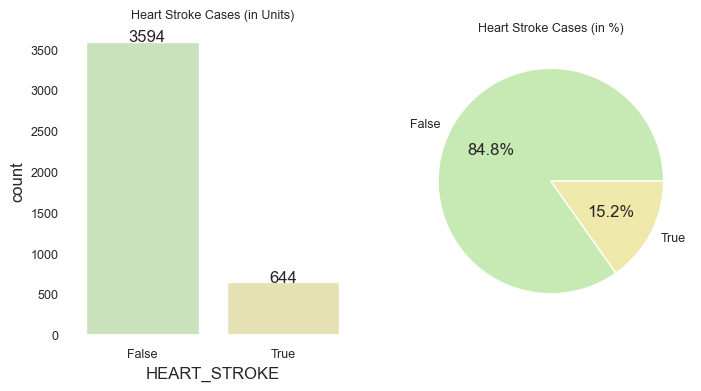

In [393]:
sb.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9})
my_col = ('#c7e9b4', '#EEE8AA')
plt.figure(figsize=(8,4))

## Heart Stroke Cases (in Units)

plt.subplot(1,2,1)
plt.title('Heart Stroke Cases (in Units)', fontdict={'fontsize':9})
ax = sb.countplot(x="HEART_STROKE", data=heart_dis, palette=my_col, order=heart_dis['HEART_STROKE'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+8))

## Heart Stroke Cases (in %)

plt.subplot(1,2,2)
plt.title('Heart Stroke Cases (in %)', fontdict={'fontsize':9})
heart_dis['HEART_STROKE'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()

The dataset appears to be imbalanced since the number of heart stroke cases is relatively much lower than the cases without heart stroke.

In % terms, heart stroke cases account for just around 15% of total cases.

In [277]:
print("Number of Heart Stroke :", len(heart_dis["HEART_STROKE"].unique()))
print(heart_dis["HEART_STROKE"].value_counts())

Number of Heart Stroke : 2
False    3594
True      644
Name: HEART_STROKE, dtype: int64


The following is a catplot that illustrates the distribution of **heart stroke**.

Text(0.5, 1.0, 'Heart Stroke')

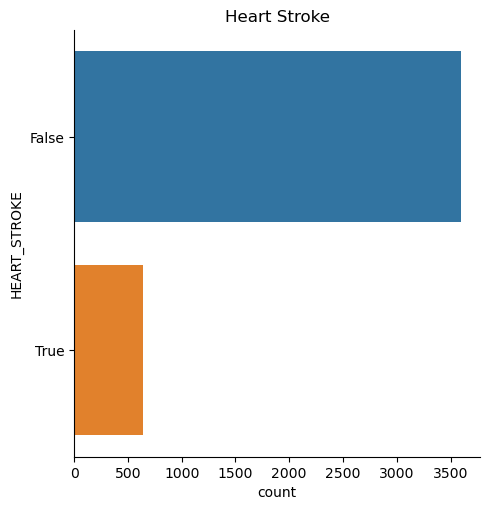

In [278]:
sb.catplot(y = "HEART_STROKE", data = heart_dis, kind = "count")
plt.title("Heart Stroke")

### Numeric Predictors (Overview)
We then perform uni-variate visualization on the numeric predictors.

Predictors (numeric) : `AGE`, `CIGS_PER_DAY`, `TOT_CHOLESTEROL`, `SYSTOLIC_BP`, `DIASTOLIC_BP`, `BMI`, `HEART_RATE`, `GLUCOSE_LEVEL`.

In [394]:
numDF=pd.DataFrame(heart_dis[["AGE", "CIGS_PER_DAY", "TOT_CHOLESTEROL","SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]])
numDF

AGE  CIGS_PER_DAY  TOT_CHOLESTEROL  SYSTOLIC_BP  DIASTOLIC_BP  \
0      39           0.0            195.0        106.0          70.0   
1      46           0.0            250.0        121.0          81.0   
2      48          20.0            245.0        127.5          80.0   
3      61          30.0            225.0        150.0          95.0   
4      46          23.0            285.0        130.0          84.0   
...   ...           ...              ...          ...           ...   
4233   50           1.0            313.0        179.0          92.0   
4234   51          43.0            207.0        126.5          80.0   
4235   48          20.0            248.0        131.0          72.0   
4236   44          15.0            210.0        126.5          87.0   
4237   52           0.0            269.0        133.5          83.0   

            BMI  HEART_RATE  GLUCOSE_LEVEL  
0     26.969999        80.0           77.0  
1     28.730000        95.0           76.0  
2     25.340000        75.0           70.0  
3     28.580000        65.0          103.0  
4     23.100000        85.0           85.0  
...         ...         ...            ...  
4233  25.969999        66.0           86.0  
4234  19.709999        65.0           68.0  
4235  22.000000        84.0           86.0  
4236  19.160000        86.0           78.0  
4237  21.469999        80.0          107.0  

[4238 rows x 8 columns]

Using describe to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min), **first quartile** (denoted by 25%), **median** (denoted by 50%), **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of each of the columns of the new dataframe.

In [395]:
numDF.describe()

AGE  CIGS_PER_DAY  TOT_CHOLESTEROL  SYSTOLIC_BP  DIASTOLIC_BP  \
count  4238.000000   4238.000000      4238.000000  4238.000000   4238.000000   
mean     49.584946      8.941482       236.689484   132.352402     82.893463   
std       8.572160     11.902263        44.327389    22.038095     11.910854   
min      32.000000      0.000000       107.000000    83.500000     48.000000   
25%      42.000000      0.000000       206.000000   117.000000     75.000000   
50%      49.000000      0.000000       234.000000   128.000000     82.000000   
75%      56.000000     20.000000       262.000000   144.000000     89.875000   
max      70.000000     70.000000       696.000000   295.000000    142.500000   

               BMI   HEART_RATE  GLUCOSE_LEVEL  
count  4238.000000  4238.000000    4238.000000  
mean     25.800173    75.878716      81.603584  
std       4.071043    12.025211      22.865265  
min      15.540000    44.000000      40.000000  
25%      23.080000    68.000000      72.000000  
50%      25.400000    75.000000      78.000000  
75%      28.037501    83.000000      85.000000  
max      56.799999   143.000000     394.000000

These are the boxplot, histogram and violin plot for **Age**, **Cigarettes per day**, **Total Cholesterol**, **Systolic Blood Pressure**, **Diastolic Blood Pressure**, **BMI**, **Heart Rate** and **Glucose Level**. Here we can see the distribution of our data for each of our predictors.

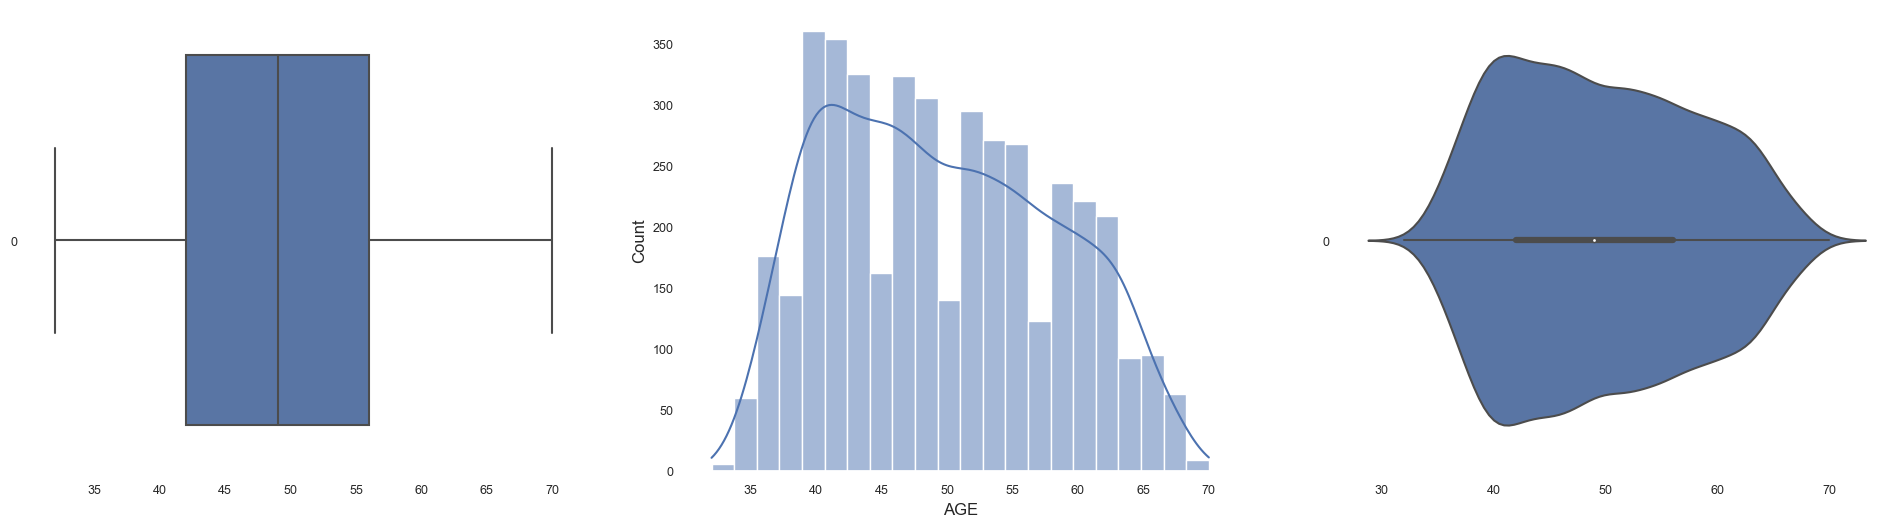

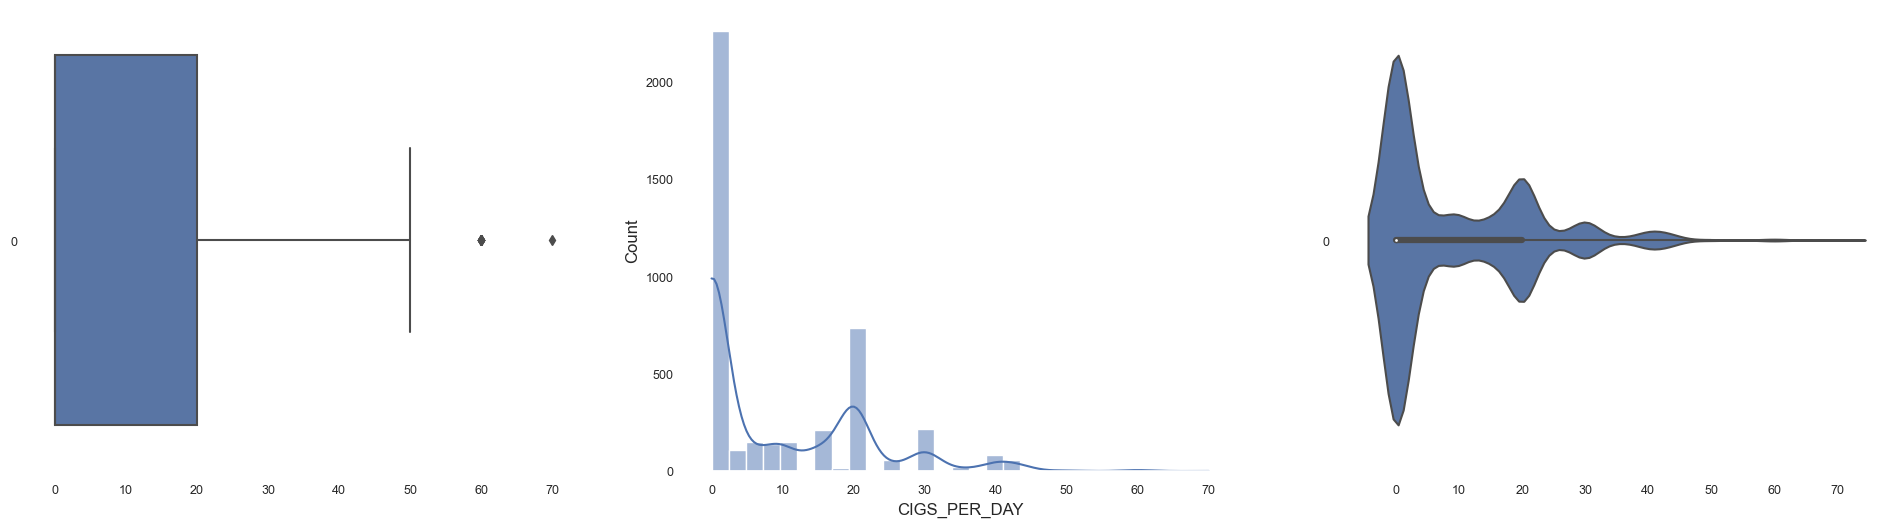

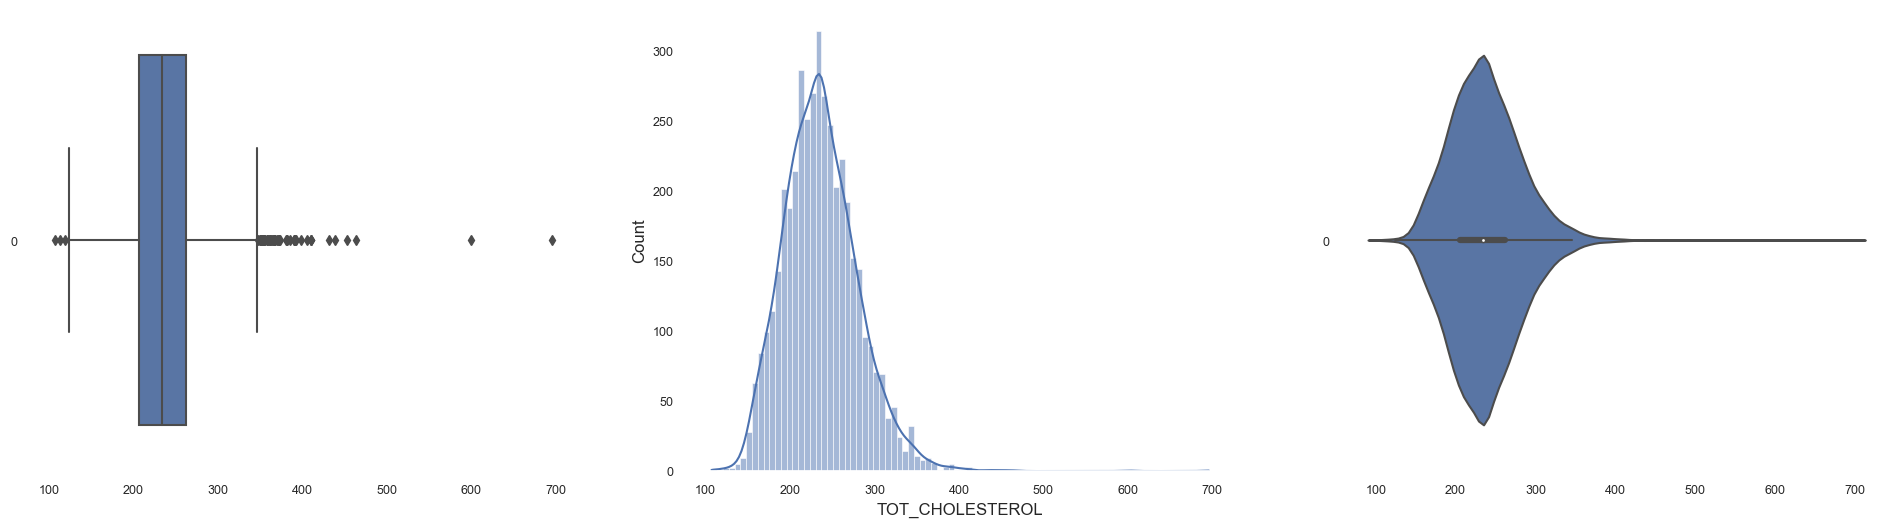

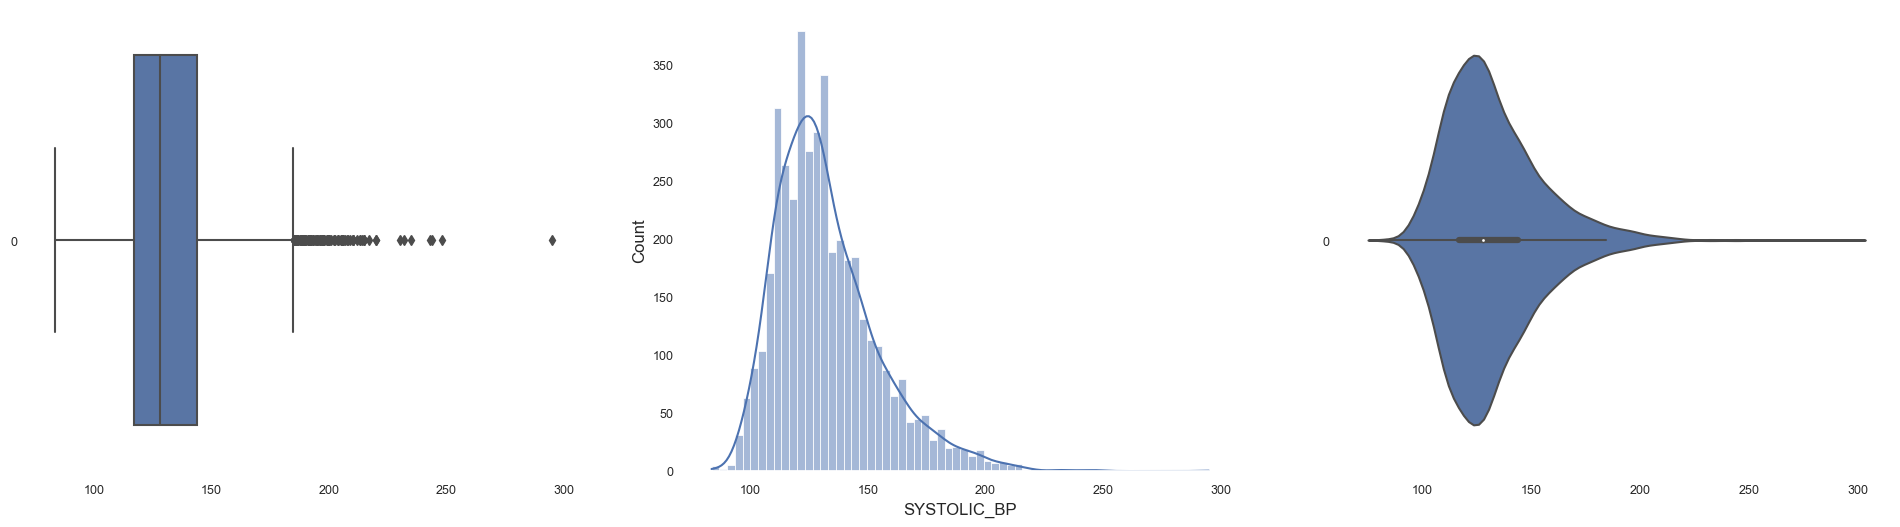

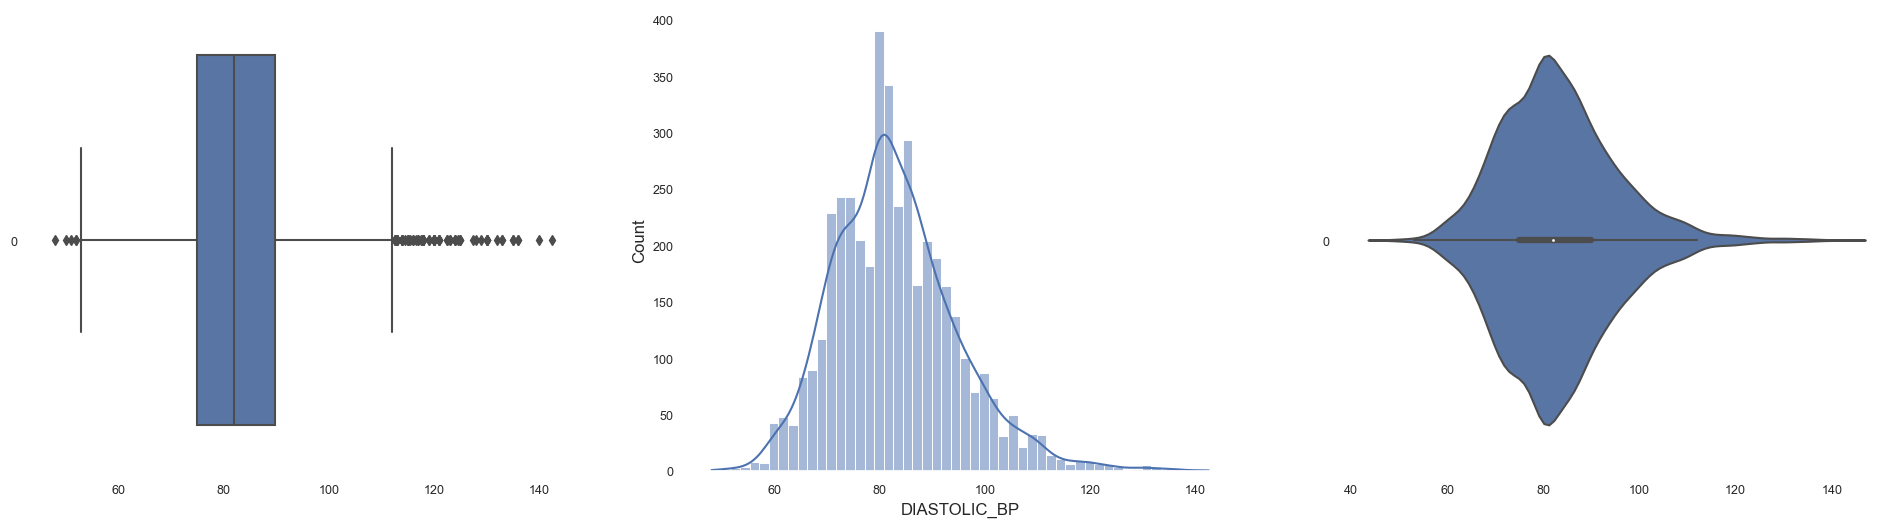

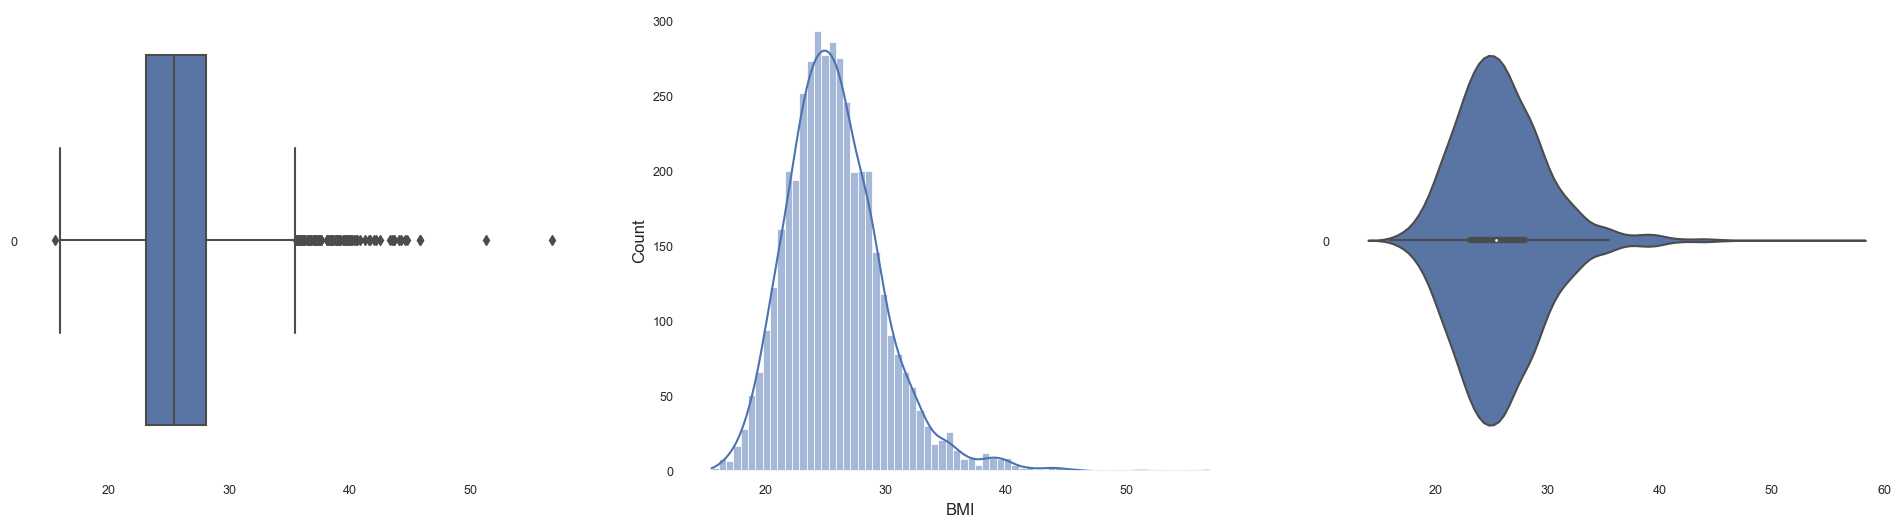

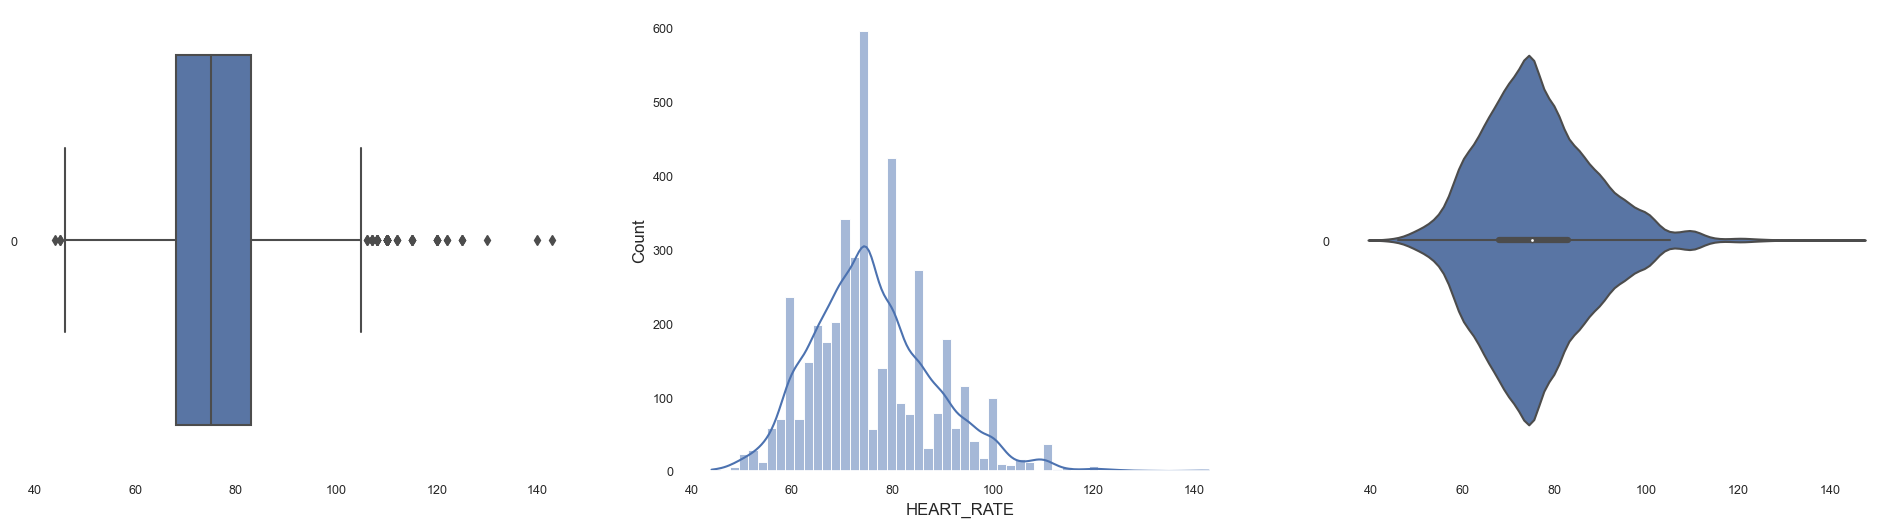

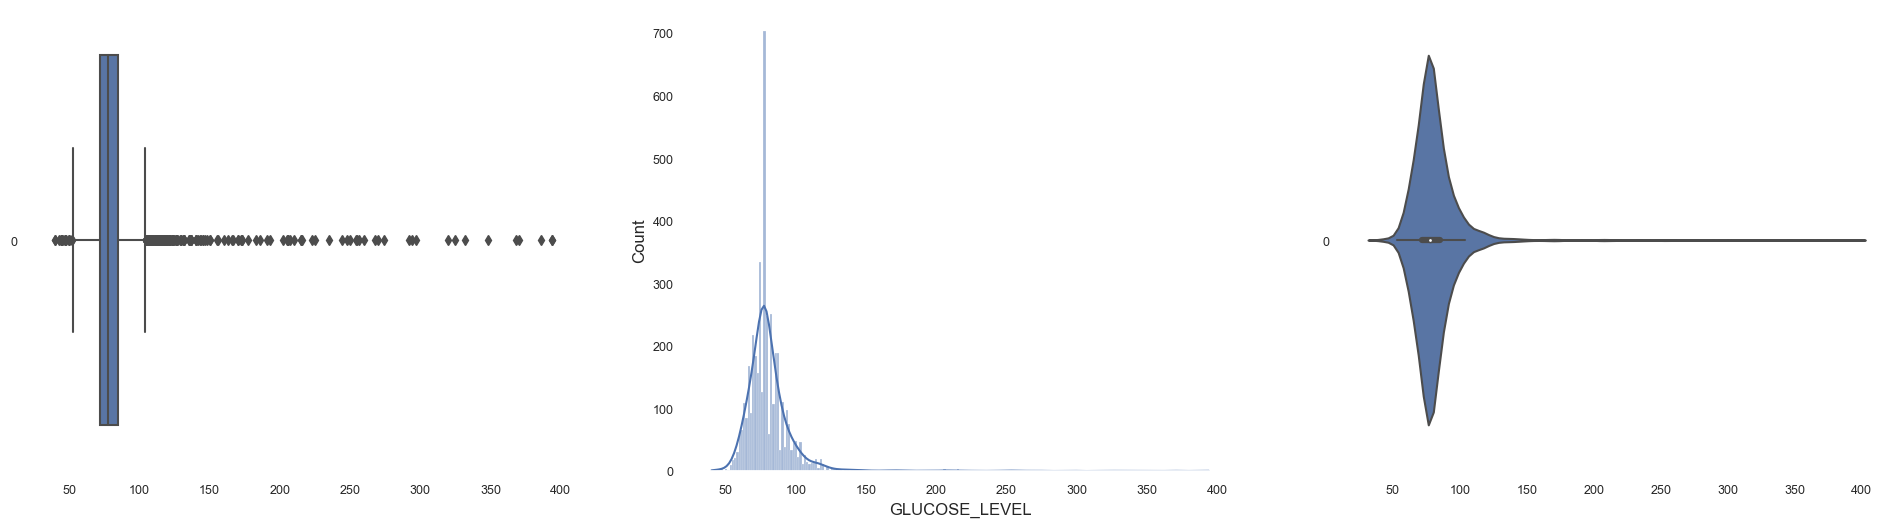

In [396]:
for var in numDF:
    f, axes=plt.subplots(1,3, figsize=(24,6))
    
    sb.boxplot(data=numDF[var], orient='h', ax=axes[0])
    sb.histplot(data=numDF[var], kde=True, ax=axes[1])
    sb.violinplot(data=numDF[var], orient='h', ax=axes[2])

### Age

Once again, the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Age**. Our data is positively skewed.

<AxesSubplot:>

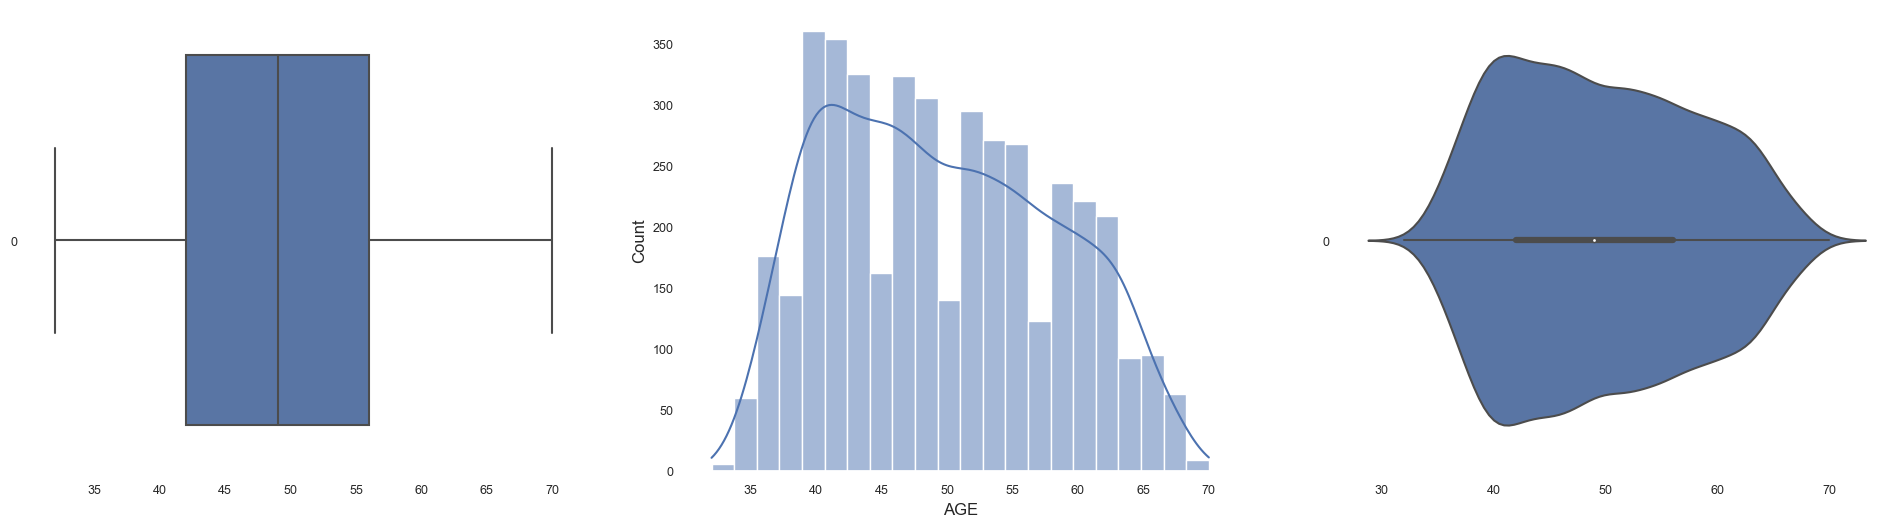

In [397]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["AGE"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["AGE"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["AGE"], orient='h', ax=axes[2])

Since the data is relatively well distributed, we do not intend to make any changes.

### Cigarettes per day

Once again, the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Cigarettes per day**. Our data is positively skewed.

<AxesSubplot:>

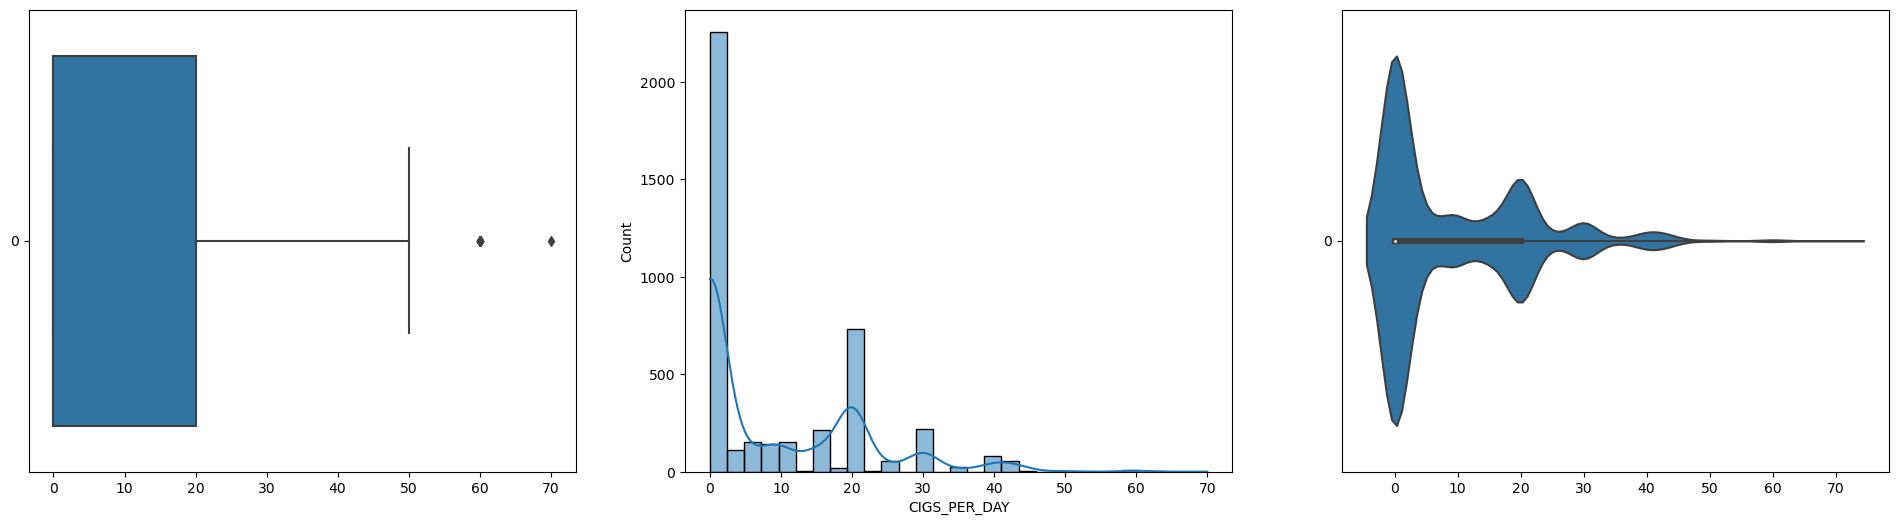

In [283]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["CIGS_PER_DAY"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["CIGS_PER_DAY"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["CIGS_PER_DAY"], orient='h', ax=axes[2])

In [284]:
cpd_ed=heart_dis[heart_dis["CIGS_PER_DAY"]>50]
cpd_ed.shape

(12, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

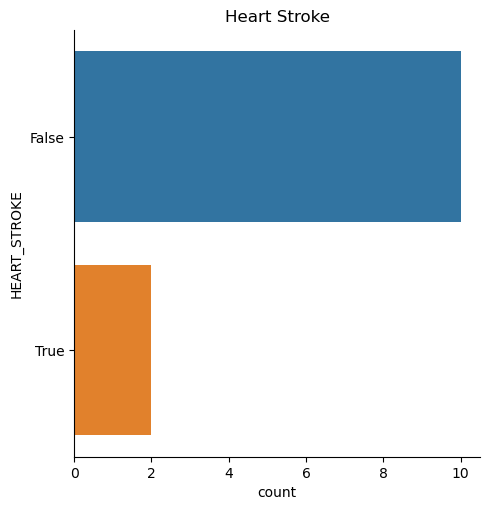

In [285]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=cpd_ed, kind="count") #cpd_ed is dataframe of outliers
plt.title("Heart Stroke")

In [286]:
cpd_ed["HEART_STROKE"].value_counts() #cpd_ed is dataframe of outliers

False    10
True      2
Name: HEART_STROKE, dtype: int64

### Total Cholesterol

Once again, the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Total Cholesterol**. Our data is negatively skewed.

<AxesSubplot:>

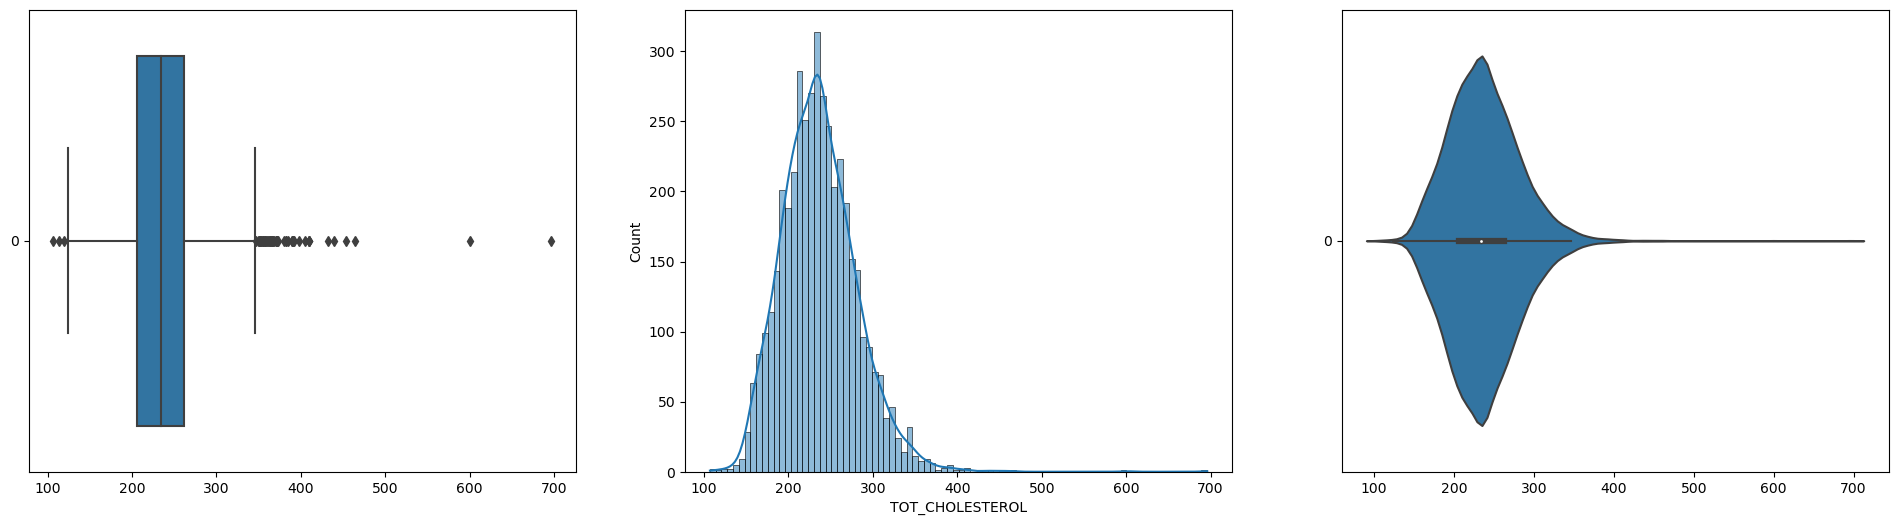

In [287]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["TOT_CHOLESTEROL"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["TOT_CHOLESTEROL"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["TOT_CHOLESTEROL"], orient='h', ax=axes[2])

In [288]:
tc_ed=heart_dis[(heart_dis["TOT_CHOLESTEROL"]>346) | (heart_dis["TOT_CHOLESTEROL"]<122)]
tc_ed.shape

(57, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

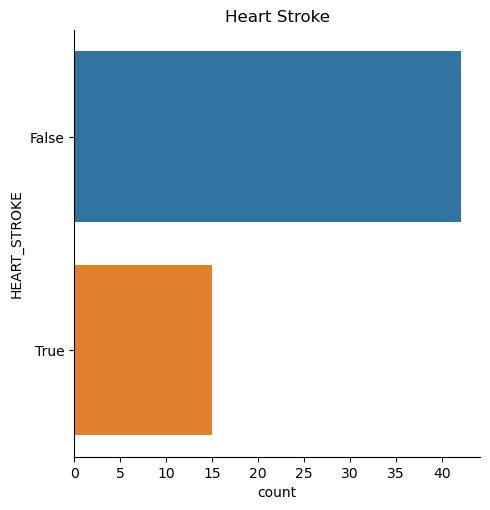

In [289]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=tc_ed, kind="count") #tc_ed is dataframe of outliers
plt.title("Heart Stroke")

In [290]:
tc_ed["HEART_STROKE"].value_counts() #tc_ed is dataframe of outliers

False    42
True     15
Name: HEART_STROKE, dtype: int64

### Systolic Blood Pressure

Here are the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Systolic Blood Pressure**. Our data is negatively skewed.

<AxesSubplot:>

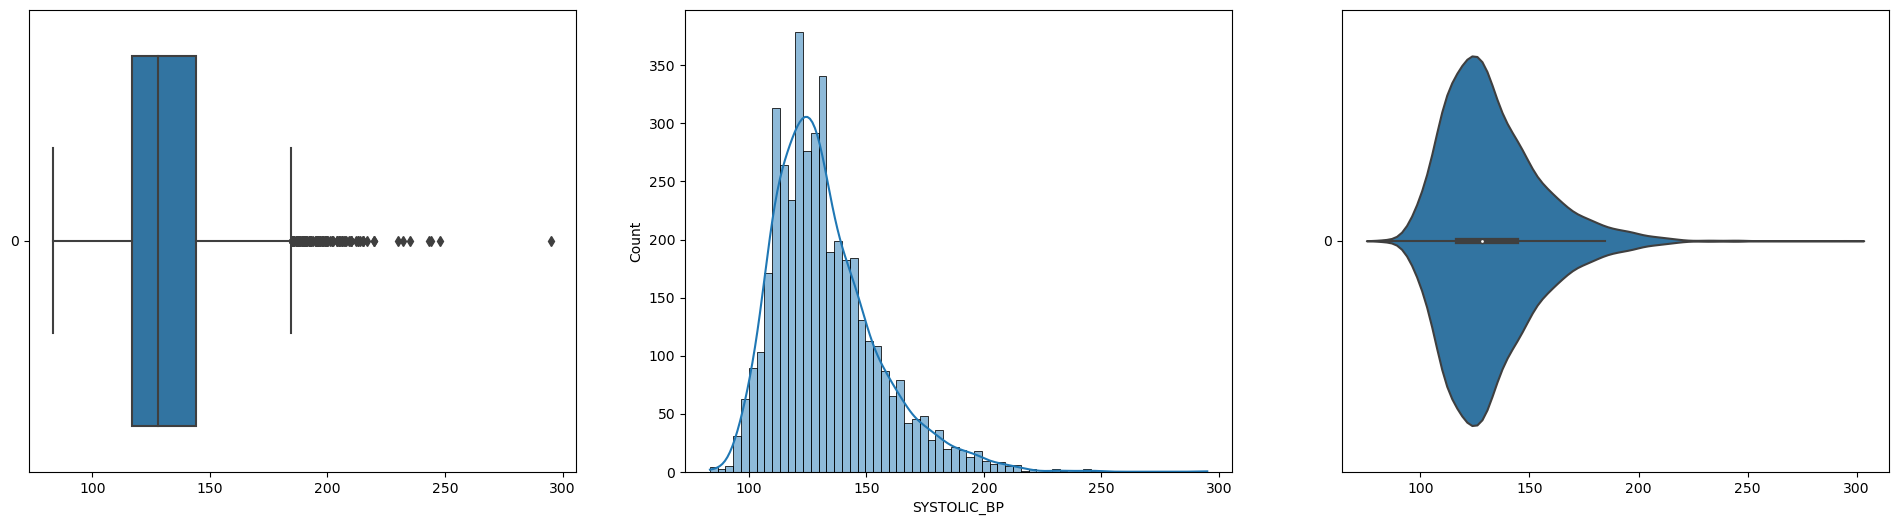

In [291]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["SYSTOLIC_BP"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["SYSTOLIC_BP"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["SYSTOLIC_BP"], orient='h', ax=axes[2])

In [292]:
sbp_ed=heart_dis[heart_dis["SYSTOLIC_BP"]>184.5]
sbp_ed.shape

(126, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

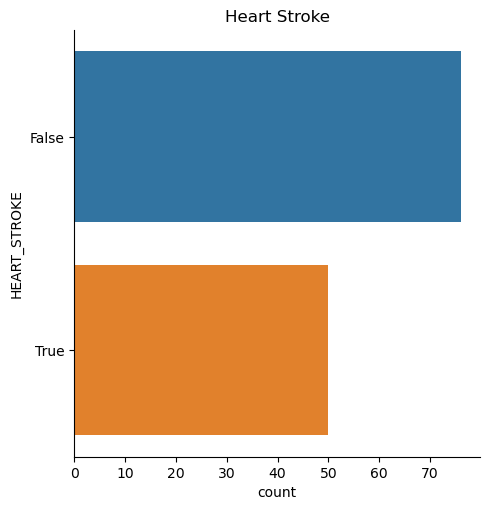

In [293]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=sbp_ed, kind="count") #sbp_ed is dataframe of outliers
plt.title("Heart Stroke")

In [294]:
sbp_ed["HEART_STROKE"].value_counts() #sbp_ed is dataframe of outliers

False    76
True     50
Name: HEART_STROKE, dtype: int64

### Diastolic Blood Pressure

Here are the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Diastolic Blood Pressure**. Our data is negatively skewed.

<AxesSubplot:>

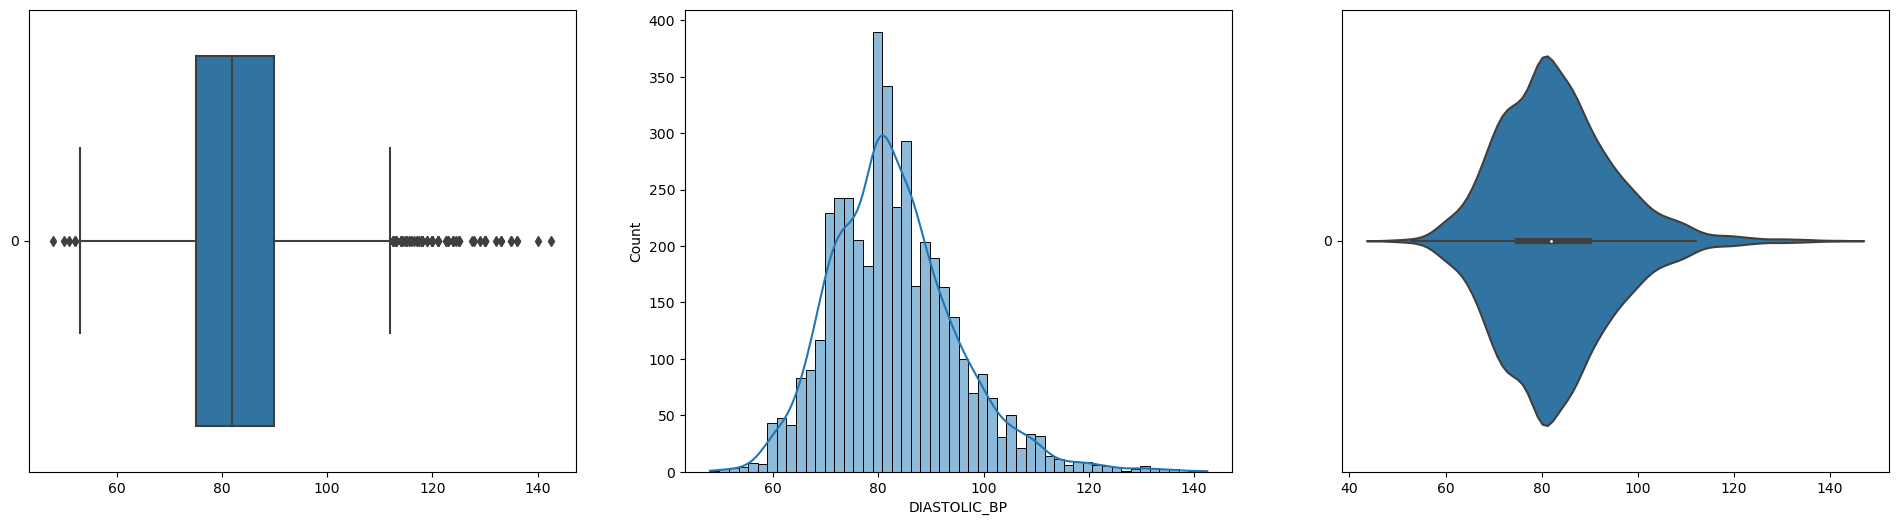

In [295]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["DIASTOLIC_BP"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["DIASTOLIC_BP"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["DIASTOLIC_BP"], orient='h', ax=axes[2])

In [296]:
dbp_ed=heart_dis[(heart_dis["DIASTOLIC_BP"]>112.2) | (heart_dis["DIASTOLIC_BP"]<52.7)]
dbp_ed.shape

(81, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

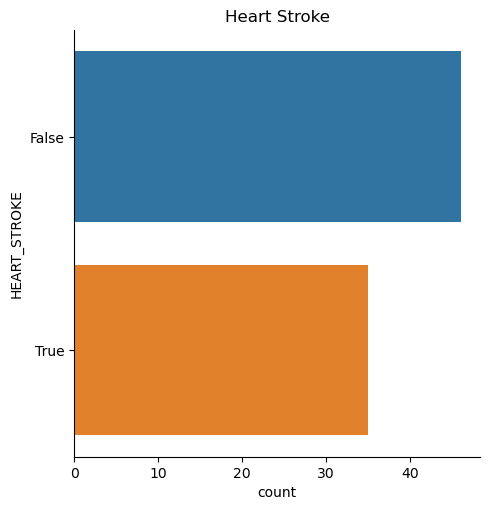

In [297]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=dbp_ed, kind="count") #dbp_ed is dataframe of outliers
plt.title("Heart Stroke")

In [298]:
dbp_ed["HEART_STROKE"].value_counts() #dbp_ed is dataframe of outliers

False    46
True     35
Name: HEART_STROKE, dtype: int64

### BMI (Body Mass Index)

Here are the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **BMI**. Our data is negatively skewed.

<AxesSubplot:>

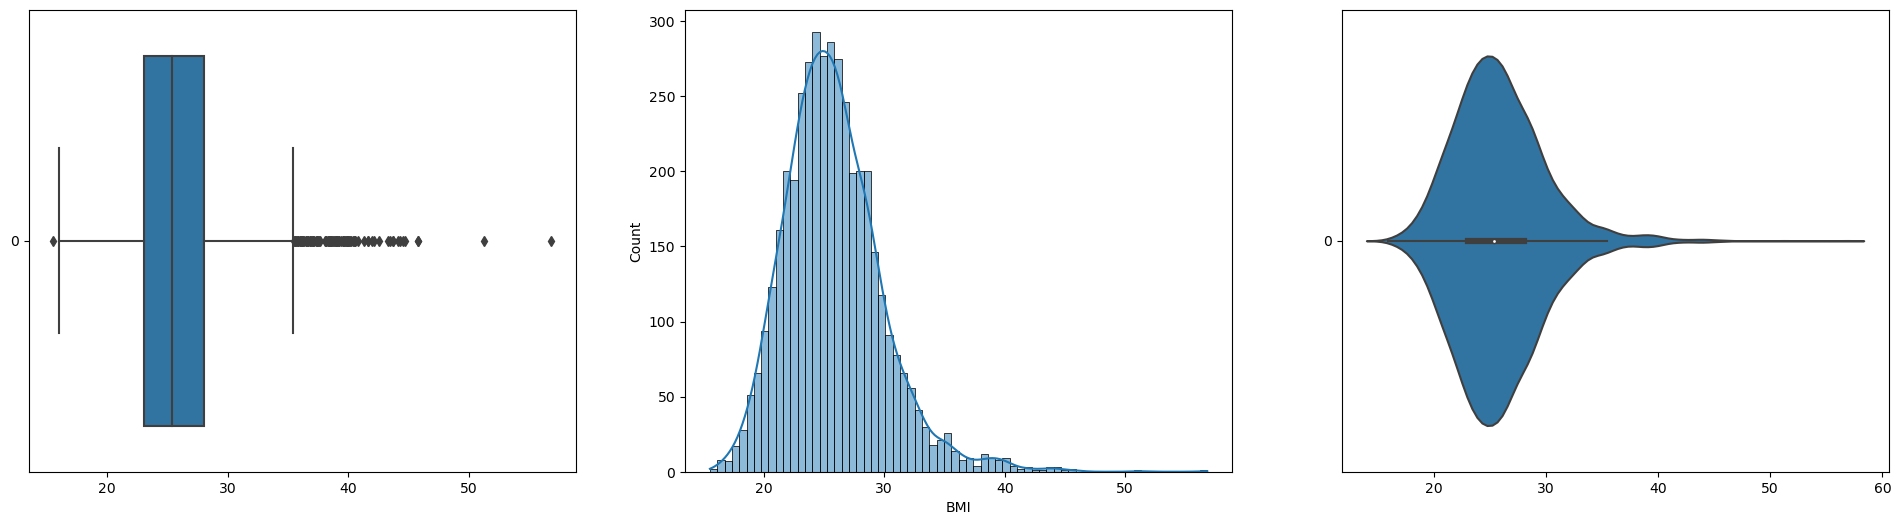

In [299]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["BMI"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["BMI"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["BMI"], orient='h', ax=axes[2])

In [300]:
bmi_ed=heart_dis[(heart_dis["BMI"]>35.5) | (heart_dis["BMI"]<15.6)]
bmi_ed.shape

(97, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

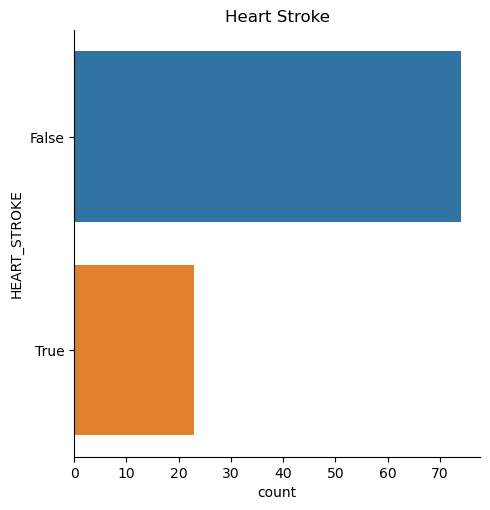

In [301]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=bmi_ed, kind="count") #bmi_ed is dataframe of outliers
plt.title("Heart Stroke")

In [302]:
bmi_ed["HEART_STROKE"].value_counts() #bmi_ed is dataframe of outliers

False    74
True     23
Name: HEART_STROKE, dtype: int64

### Heart Rate

Here are the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Heart Rate**. Our data is negatively skewed.

<AxesSubplot:>

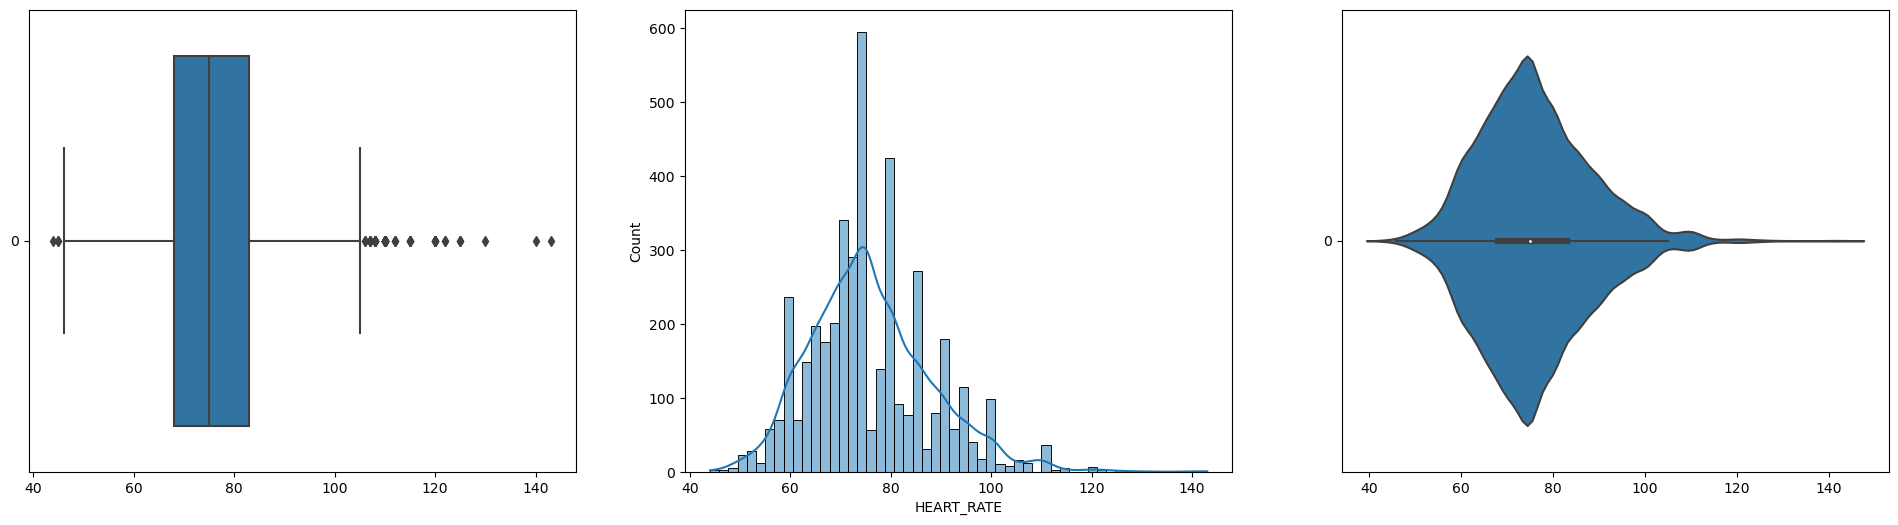

In [303]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["HEART_RATE"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["HEART_RATE"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["HEART_RATE"], orient='h', ax=axes[2])

In [304]:
hr_ed=heart_dis[(heart_dis["HEART_RATE"]>105.5) | (heart_dis["HEART_RATE"]<45.5)]
hr_ed.shape

(76, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

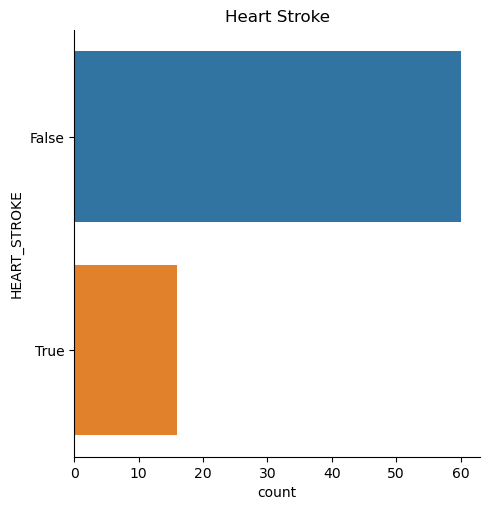

In [305]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=hr_ed, kind="count") #hr_ed is dataframe of outliers
plt.title("Heart Stroke")

In [306]:
hr_ed["HEART_STROKE"].value_counts() #hr_ed is dataframe of outliers

False    60
True     16
Name: HEART_STROKE, dtype: int64

### Glucose Level

Here are the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for **Heart Rate**. Our data is negatively skewed, with a very thin standard deviation as indicated by the width of violin plot.

<AxesSubplot:>

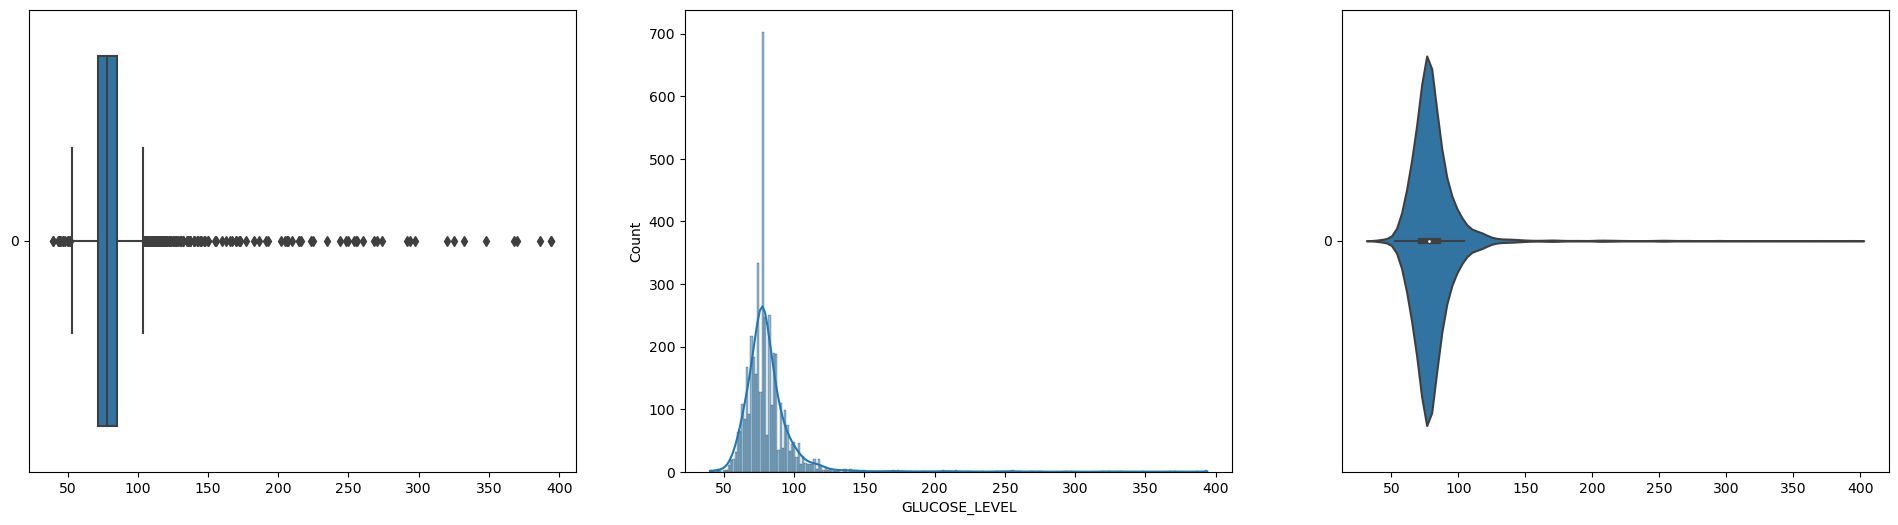

In [307]:
f, axes=plt.subplots(1,3, figsize=(24,6))
    
sb.boxplot(data=heart_dis["GLUCOSE_LEVEL"], orient='h', ax=axes[0])
sb.histplot(data=heart_dis["GLUCOSE_LEVEL"], kde=True, ax=axes[1])
sb.violinplot(data=heart_dis["GLUCOSE_LEVEL"], orient='h', ax=axes[2])

In [308]:
gl_ed=heart_dis[(heart_dis["GLUCOSE_LEVEL"]>104.5) | (heart_dis["GLUCOSE_LEVEL"]<52.5)]
gl_ed.shape

(262, 17)

The categorical plot below shows the occurance of **Heart Stroke** which the outliers above fall in, with the occurance of heart stroke categorised **False** holding a greater count than **True**.

Text(0.5, 1.0, 'Heart Stroke')

<Figure size 1200x800 with 0 Axes>

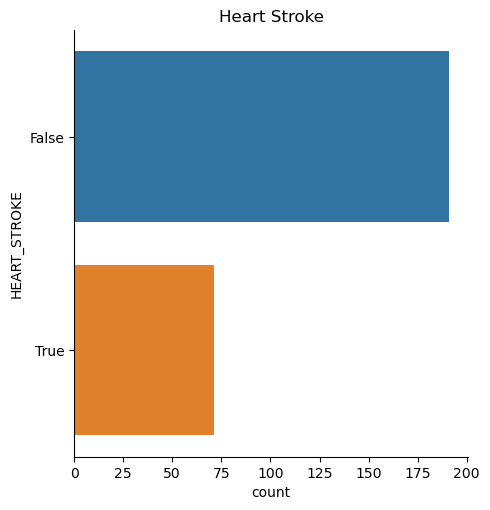

In [309]:
f=plt.figure(figsize=(12,8))
sb.catplot(y="HEART_STROKE", data=gl_ed, kind="count") #gl_ed is dataframe of outliers
plt.title("Heart Stroke")

In [310]:
gl_ed["HEART_STROKE"].value_counts() #gl_ed is dataframe of outliers

False    191
True      71
Name: HEART_STROKE, dtype: int64

#### Numeric Predictors (Overview)
Now we will drop the outliers from our data. This applies for **Cigarettes per day**, **Total Cholesterol**, **Systolic Blood Pressure**, **Diastolic Blood Pressure**, **BMI**, **Heart Rate** and **Glucose Level**.

In [311]:
numDF.drop(numDF.index[(numDF["CIGS_PER_DAY"]>50) | 
                       (numDF["TOT_CHOLESTEROL"]>346) | (numDF["TOT_CHOLESTEROL"]<122) | 
                       (numDF["SYSTOLIC_BP"]>184.5) |
                       (numDF["DIASTOLIC_BP"]>112.2) | (numDF["DIASTOLIC_BP"]<52.7) |
                       (numDF["BMI"]>35.5) | (numDF["BMI"]<15.6) |
                       (numDF["HEART_RATE"]>105.5) | (numDF["HEART_RATE"]<45.5) |
                       (numDF["GLUCOSE_LEVEL"]>104.5) | (numDF["GLUCOSE_LEVEL"]<52.5)], inplace=True)
numDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 4236
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CIGS_PER_DAY     3653 non-null   float32
 1   TOT_CHOLESTEROL  3653 non-null   float32
 2   SYSTOLIC_BP      3653 non-null   float32
 3   DIASTOLIC_BP     3653 non-null   float32
 4   BMI              3653 non-null   float32
 5   HEART_RATE       3653 non-null   float32
 6   GLUCOSE_LEVEL    3653 non-null   float32
dtypes: float32(7)
memory usage: 128.4 KB


After dropping the outliers, these are the boxplot, histogram with kernel density estimate (KDE) and violin plot for **Age**, **Cigarettes per day**, **Total Cholesterol**, **Systolic Blood Pressure**, **Diastolic Blood Pressure**, **BMI**, **Heart Rate** and **Glucose Level** respectively.

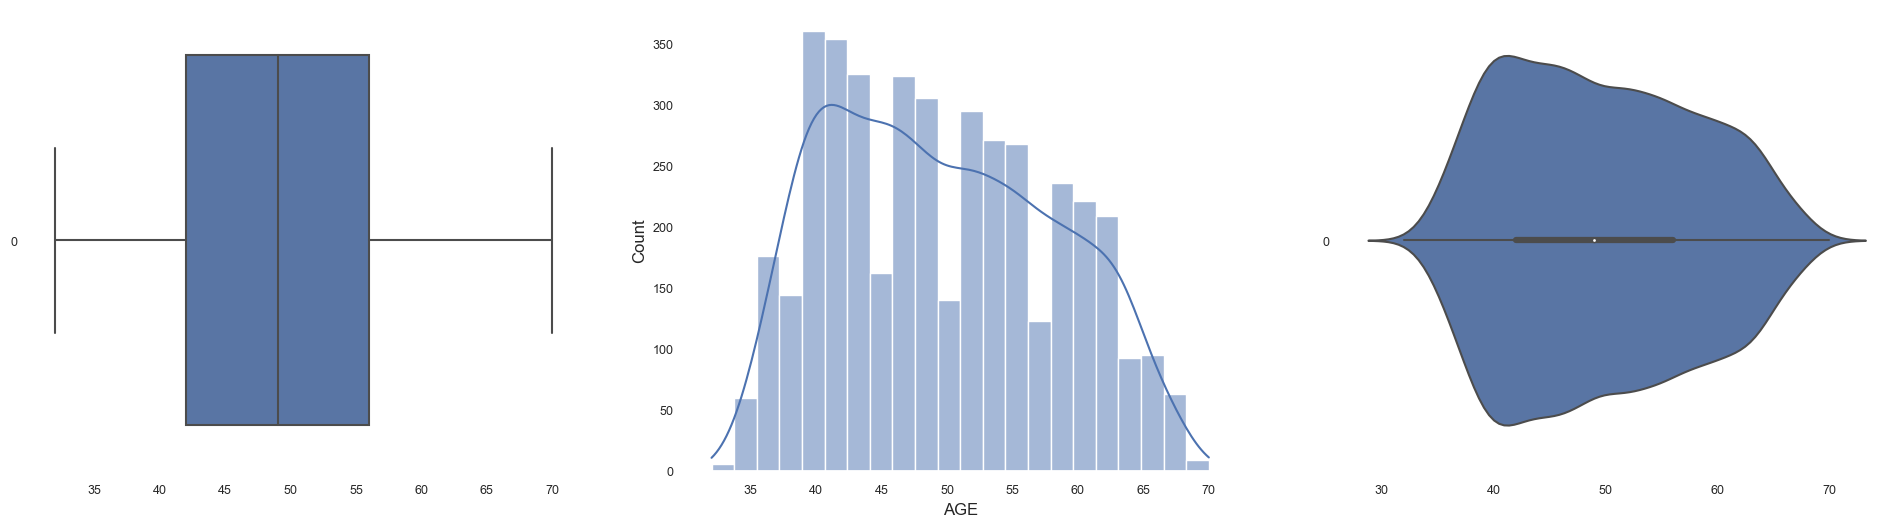

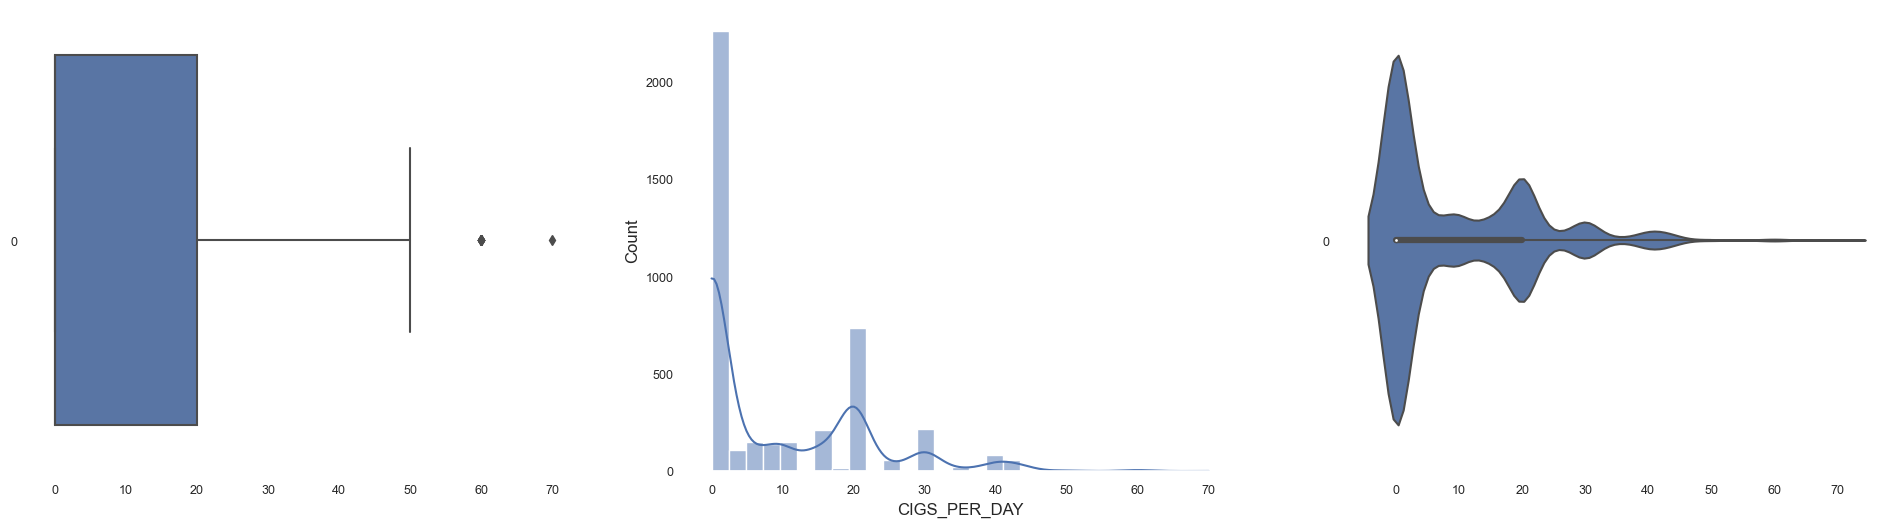

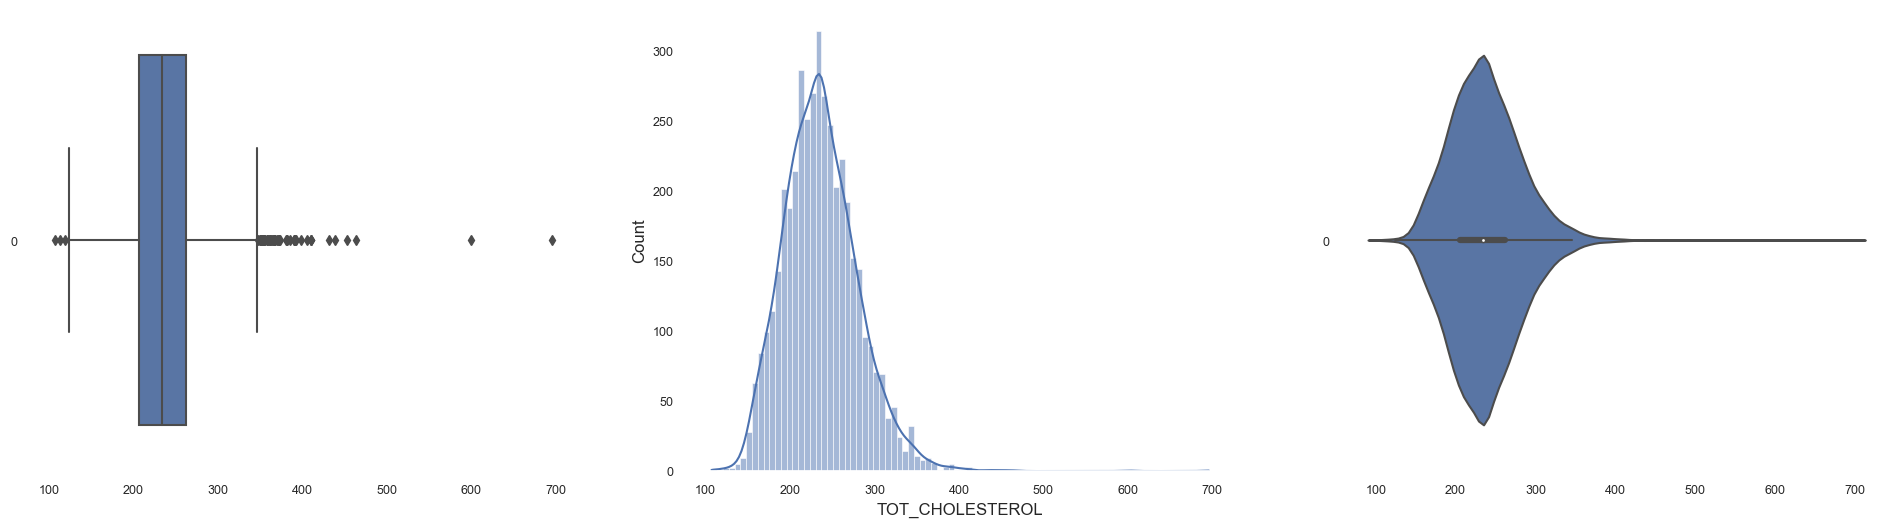

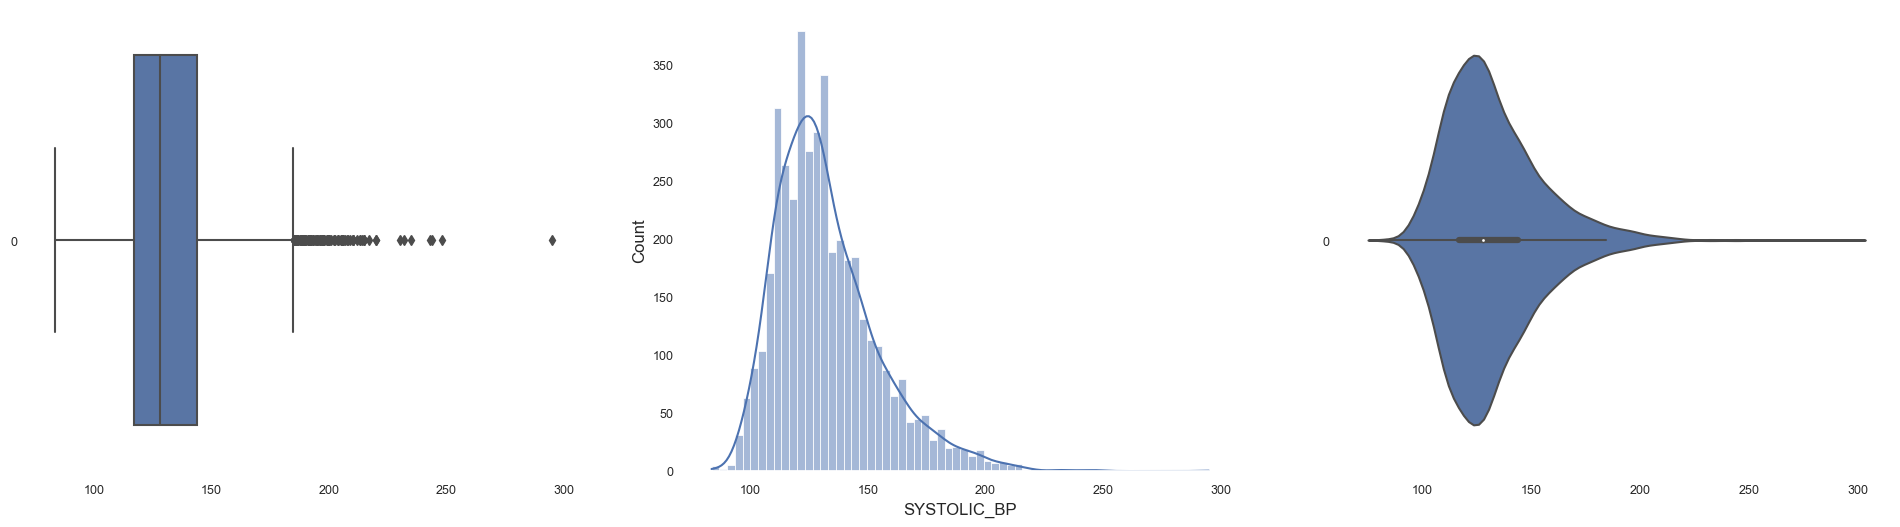

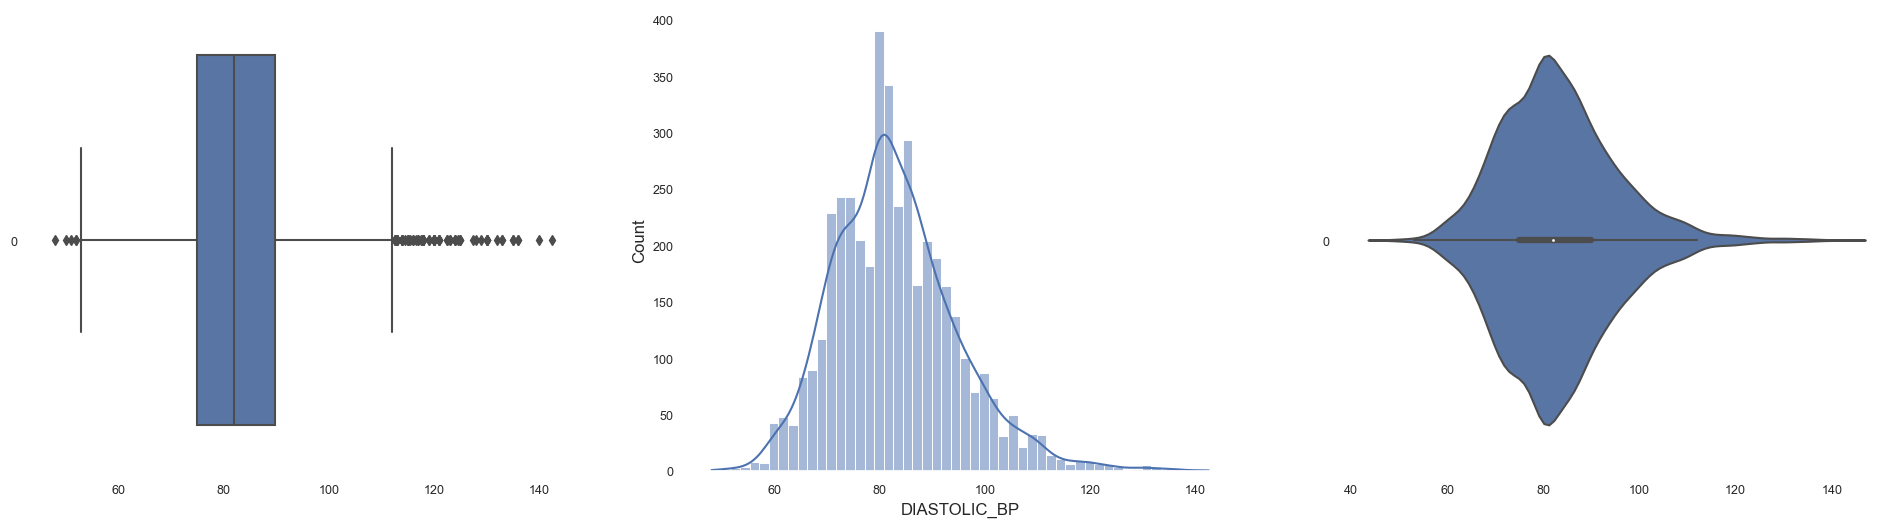

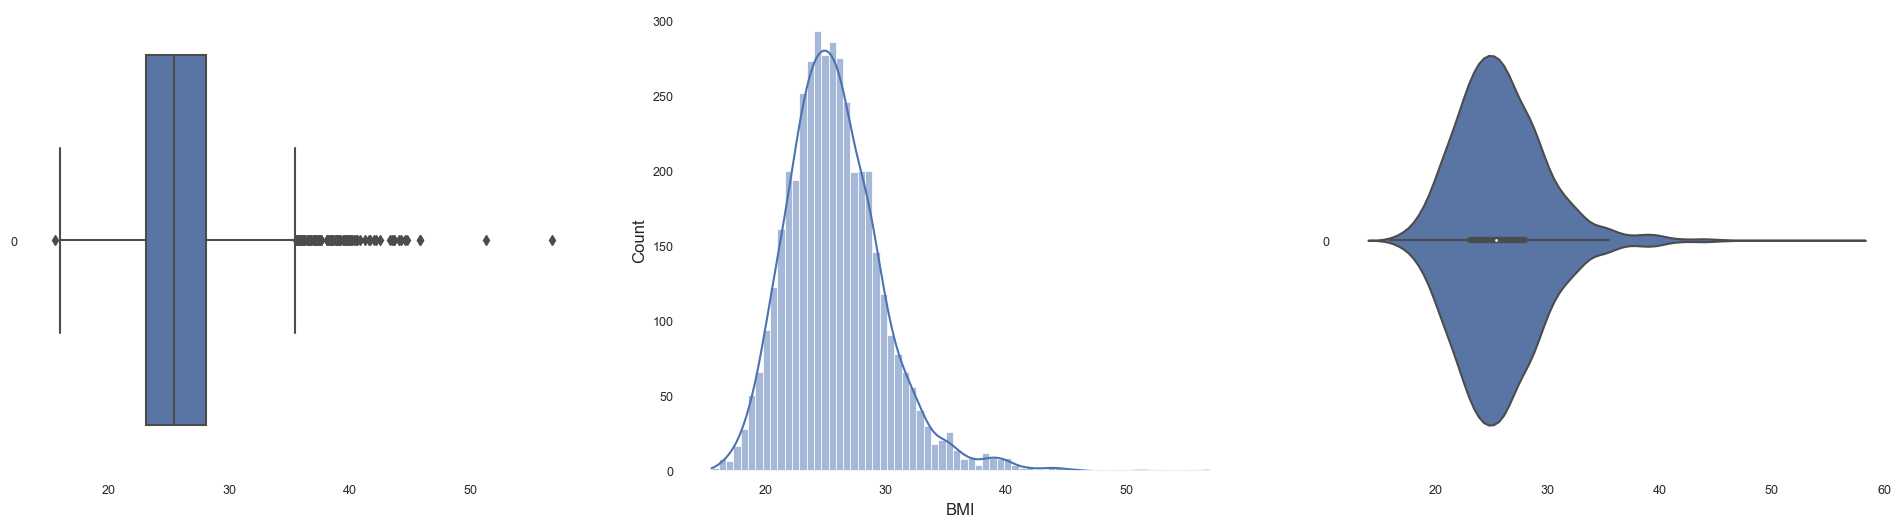

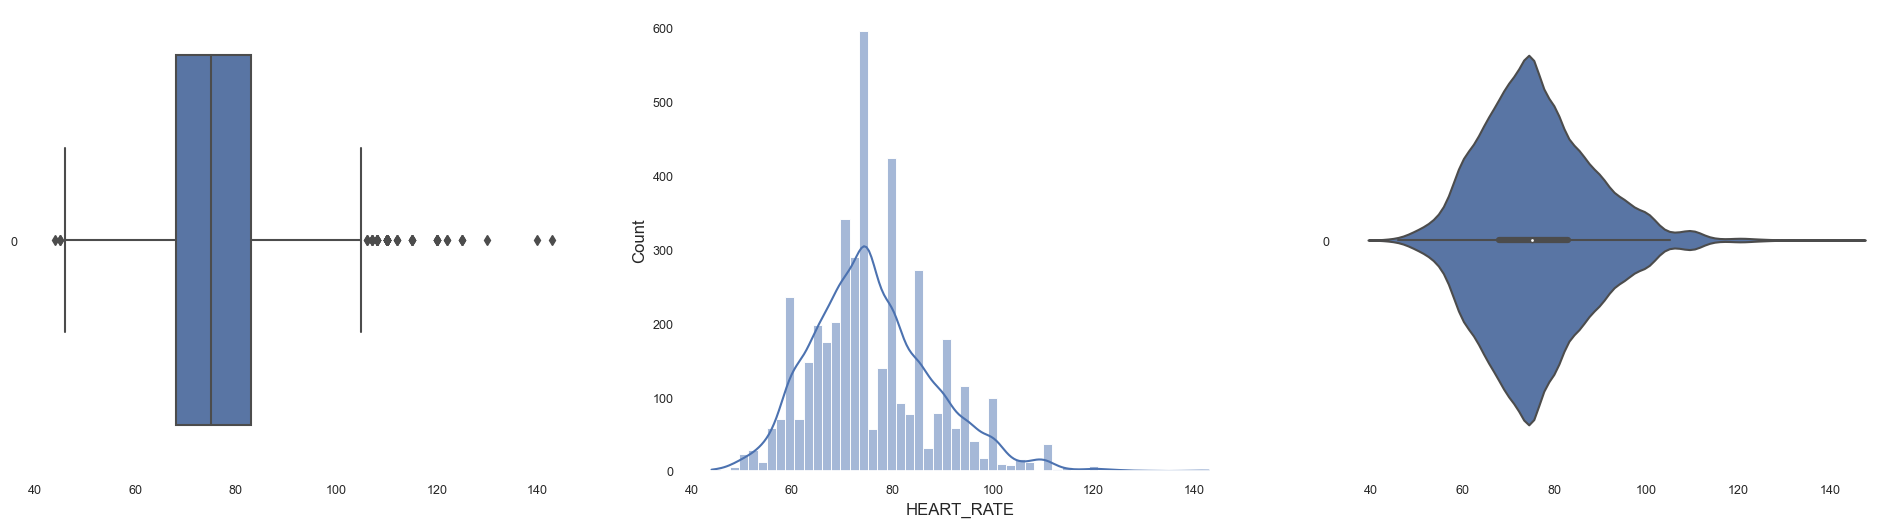

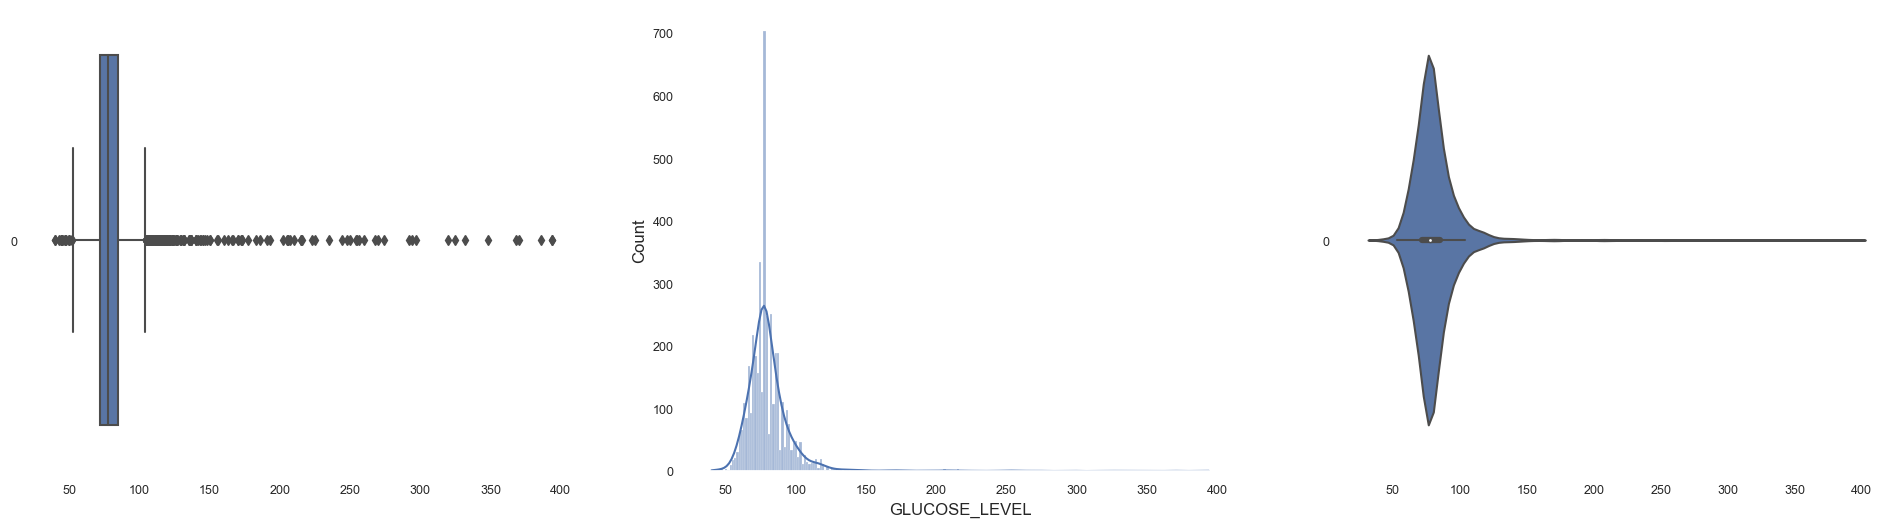

In [398]:
for var in numDF:
    f, axes=plt.subplots(1,3, figsize=(24,6))
    
    sb.boxplot(data=numDF[var], orient='h', ax=axes[0])
    sb.histplot(data=numDF[var], kde=True, ax=axes[1])
    sb.violinplot(data=numDF[var], orient='h', ax=axes[2])

### Categorical Predictors (Overview)

Predictors (categorical) : `AGEGROUP`, `GENDER`, `EDUCATION`, `CURRENT_SMOKER`, `BP_MEDICATION`, `PREV_STROKE`, `PREV_HYPERTENSION` and `DIABETES`.

In [313]:
catDF=pd.DataFrame(heart_dis[["AGEGROUP", "GENDER", "EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES"]])
catDF

AGEGROUP  GENDER       EDUCATION CURRENT_SMOKER BP_MEDICATION  \
0       30-39    Male    Postgraduate          False         False   
1       40-49  Female  Primary School          False         False   
2       40-49    Male      Uneducated           True         False   
3       60-69  Female        Graduate           True         False   
4       40-49  Female        Graduate           True         False   
...       ...     ...             ...            ...           ...   
4233    50-59    Male      Uneducated           True         False   
4234    50-59    Male        Graduate           True         False   
4235    40-49  Female  Primary School           True    NotDefined   
4236    40-49  Female      Uneducated           True         False   
4237    50-59  Female  Primary School          False         False   

     PREV_STROKE PREV_HYPERTENSION DIABETES  
0          False             False    False  
1          False             False    False  
2          False             False    False  
3          False              True    False  
4          False             False    False  
...          ...               ...      ...  
4233       False              True    False  
4234       False             False    False  
4235       False             False    False  
4236       False             False    False  
4237       False             False    False  

[4238 rows x 8 columns]

Now we use `describe` to have an overview of the **count**, **unique**, **top** and **freq** of our categorical predictors.

In [314]:
catDF.describe()

AGEGROUP  GENDER   EDUCATION CURRENT_SMOKER BP_MEDICATION PREV_STROKE  \
count      4238    4238        4238           4238          4238        4238   
unique        5       2           5              2             3           2   
top       40-49  Female  Uneducated          False         False       False   
freq       1660    2419        1720           2144          4061        4213   

       PREV_HYPERTENSION DIABETES  
count               4238     4238  
unique                 2        2  
top                False    False  
freq                2922     4129

### Age Group

This is the categorical plot for **age group**, with **age group 40-49** dominating in the distirbution of data.

In [315]:
heart_dis["AGEGROUP"].value_counts()

40-49    1660
50-59    1333
60-69     688
30-39     555
70-79       2
Name: AGEGROUP, dtype: int64

Text(0.5, 1.0, 'Age Group')

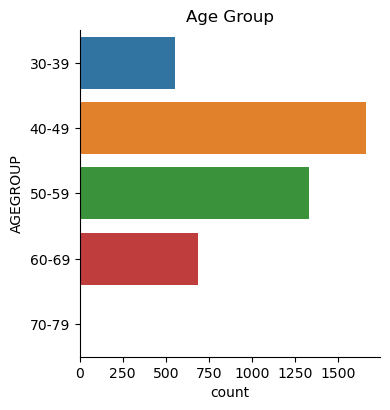

In [316]:
sb.catplot(y="AGEGROUP", data=heart_dis, kind="count", height=4)
plt.title("Age Group")

This is the categorical plot for **age group** with **gender**, also with **age group 40-49 and female** dominating in the distribution of data.

Text(0.5, 1.0, 'Age Group w Gender')

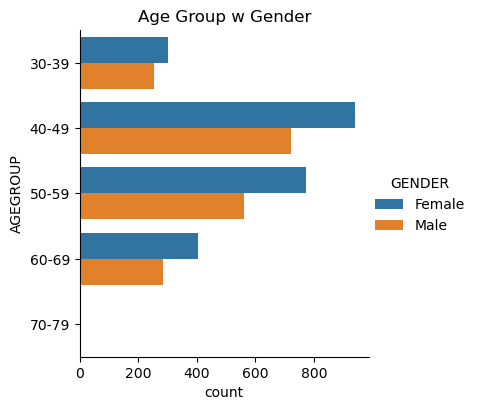

In [320]:
sb.catplot(y="AGEGROUP", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Age Group w Gender")

### Gender

This is the categorical plot for **gender**, with **female** dominating in the distirbution of data.

In [321]:
heart_dis["GENDER"].value_counts()

Female    2419
Male      1819
Name: GENDER, dtype: int64

Text(0.5, 1.0, 'Gender')

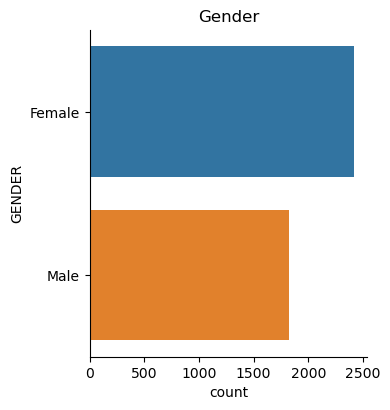

In [322]:
sb.catplot(y="GENDER", data=heart_dis, kind="count", height=4)
plt.title("Gender")

### Education

This is the categorical plot for **education**, with **uneducated** dominating the distirbution of data.

In [323]:
heart_dis["EDUCATION"].value_counts()

Uneducated        1720
Primary School    1253
Graduate           687
Postgraduate       473
NotDefined         105
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Education')

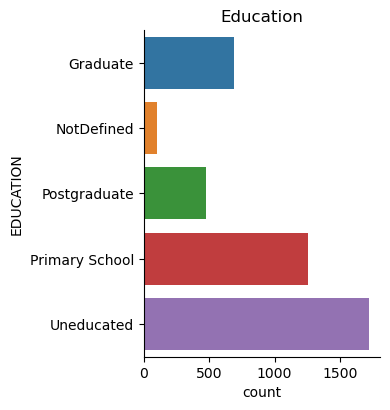

In [324]:
sb.catplot(y="EDUCATION", data=heart_dis, kind="count", height=4)
plt.title("Education")

Here is the categorical plot for **education** with **gender**, also with **uneducated and female** dominating in the distribution of data.

Text(0.5, 1.0, 'Education w Gender')

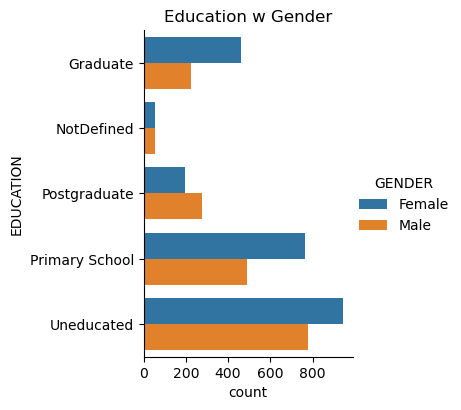

In [325]:
sb.catplot(y="EDUCATION", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Education w Gender")

### Current Smoker

This is the categorical plot for **current smoker**, with **non current smokers** slightly dominating in the distirbution of data.

In [326]:
heart_dis["CURRENT_SMOKER"].value_counts()

False    2144
True     2094
Name: CURRENT_SMOKER, dtype: int64

Text(0.5, 1.0, 'Current Smoker')

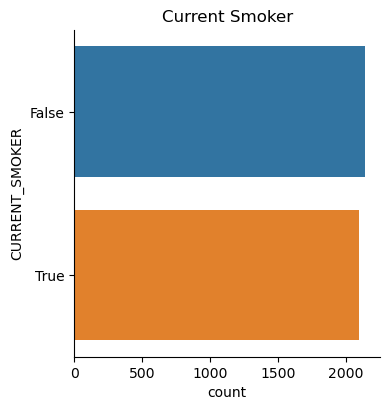

In [327]:
sb.catplot(y="CURRENT_SMOKER", data=heart_dis, kind="count", height=4)
plt.title("Current Smoker")

Here is the categorical plot for **current smoker** with **gender**, also with **non current smokers and female** dominating in the distribution of data.

Text(0.5, 1.0, 'Current Smoker w Gender')

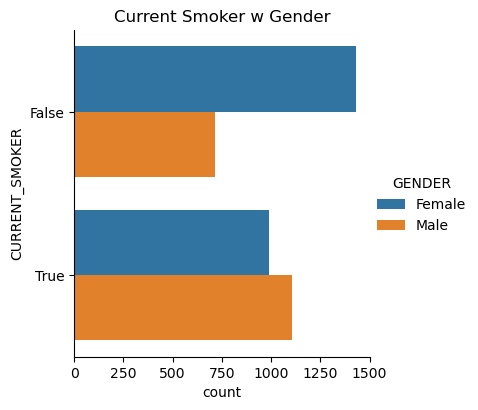

In [328]:
sb.catplot(y="CURRENT_SMOKER", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Current Smoker w Gender")

### Blood Pressure Medication

This is the categorical plot for **Blood Pressure Medication**, with **people who do not have blood pressure medication** dominating in the distirbution of data.

In [329]:
heart_dis["BP_MEDICATION"].value_counts()

False         4061
True           124
NotDefined      53
Name: BP_MEDICATION, dtype: int64

Text(0.5, 1.0, 'Blood Pressure Medication')

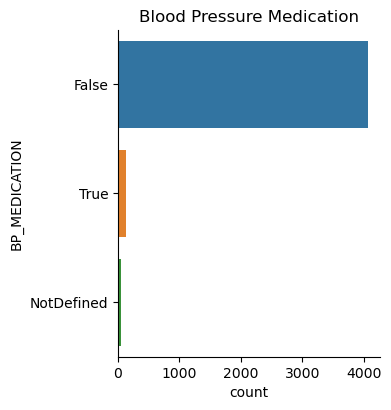

In [330]:
sb.catplot(y="BP_MEDICATION", data=heart_dis, kind="count", height=4)
plt.title("Blood Pressure Medication")

Here is the categorical plot for **Blood Pressure Medication** with **gender**, also with **females who do not have blood pressure medication** dominating in the distirbution of data.

Text(0.5, 1.0, 'Blood Pressure Medication w Gender')

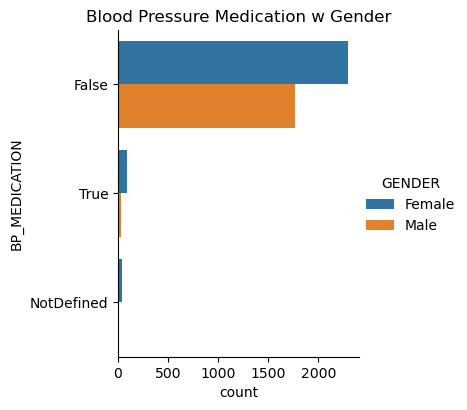

In [331]:
sb.catplot(y="BP_MEDICATION", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Blood Pressure Medication w Gender")

### Prevalent Stroke

This is the categorical plot for **Prevalent Stroke**, with **people who do not have prevalent stroke** dominating in the distirbution of data.

In [332]:
heart_dis["PREV_STROKE"].value_counts()

False    4213
True       25
Name: PREV_STROKE, dtype: int64

Text(0.5, 1.0, 'Prevalent Stroke')

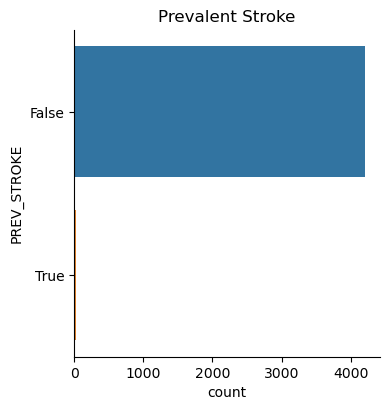

In [333]:
sb.catplot(y="PREV_STROKE", data=heart_dis, kind="count", height=4)
plt.title("Prevalent Stroke")

Here is the categorical plot for **Prevalent Stroke** with **gender**, also with **females who do not have prevalent stroke** dominating in the distirbution of data.

Text(0.5, 1.0, 'Prevalent Stroke w Gender')

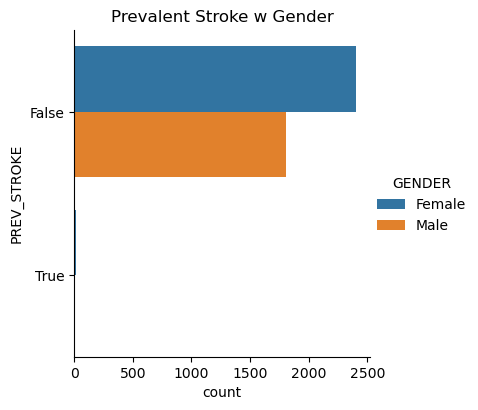

In [334]:
sb.catplot(y="PREV_STROKE", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Prevalent Stroke w Gender")

### Prevalent Hypertension

This is the categorical plot for **Prevalent Hypertension**, with **people who do not have prevalent hypertension** dominating in the distirbution of data.

In [335]:
heart_dis["PREV_HYPERTENSION"].value_counts()

False    2922
True     1316
Name: PREV_HYPERTENSION, dtype: int64

Text(0.5, 1.0, 'Prevalent Hypertension')

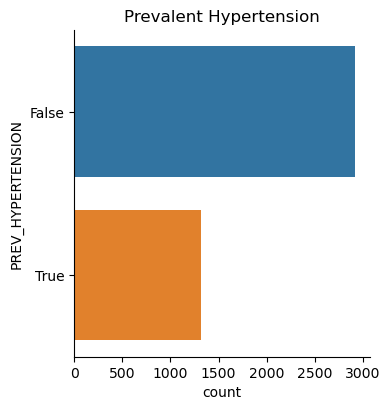

In [336]:
sb.catplot(y="PREV_HYPERTENSION", data=heart_dis, kind="count", height=4)
plt.title("Prevalent Hypertension")

Here is the categorical plot for **Prevalent Hypertension** with **gender**, also with **females who do not have prevalent hypertension** dominating in the distirbution of data.

Text(0.5, 1.0, 'Prevalent Hypertension w Gender')

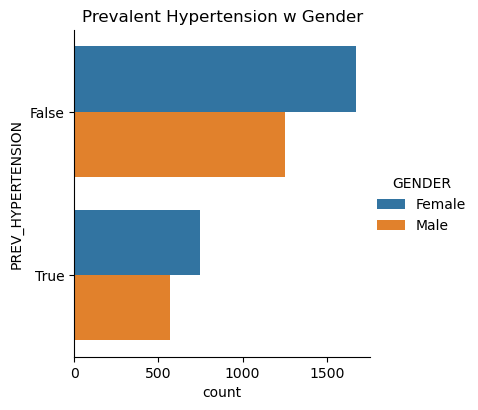

In [337]:
sb.catplot(y="PREV_HYPERTENSION", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Prevalent Hypertension w Gender")

### Diabetes

This is the categorical plot for **Diabetes**, with **people who do not have diabetes** dominating in the distirbution of data.

In [338]:
heart_dis["DIABETES"].value_counts()

False    4129
True      109
Name: DIABETES, dtype: int64

Text(0.5, 1.0, 'Diabetes')

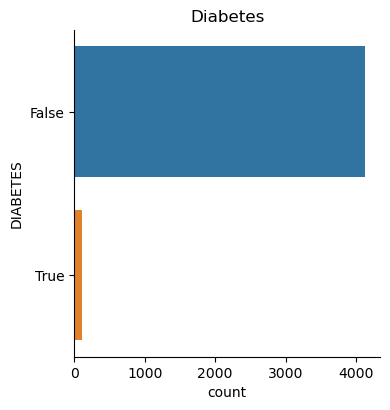

In [339]:
sb.catplot(y="DIABETES", data=heart_dis, kind="count", height=4)
plt.title("Diabetes")

Here is the categorical plot for **Diabetes** with **gender**, also with **females who do not have diabetes** dominating in the distirbution of data.

Text(0.5, 1.0, 'Diabetes w Gender')

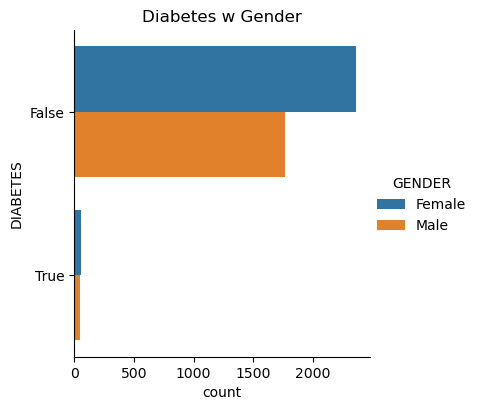

In [340]:
sb.catplot(y="DIABETES", data=heart_dis, kind="count", height=4, hue="GENDER")
plt.title("Diabetes w Gender")

## Data Preparation and Data Cleaning 2
Now, like how we did for `numDF`, we drop the outliers from `heart_dis` and create a new dataframe `heart_dis_cln`.

In [346]:
heart_dis_cln=heart_dis.copy()

In [347]:
heart_dis_cln.drop(heart_dis_cln.index[(heart_dis_cln["CIGS_PER_DAY"]>50) | 
                    (heart_dis_cln["TOT_CHOLESTEROL"]>346) | (heart_dis_cln["TOT_CHOLESTEROL"]<122) |
                    (heart_dis_cln["SYSTOLIC_BP"]>184.5) |
                    (heart_dis_cln["DIASTOLIC_BP"]>112.2) | (heart_dis_cln["DIASTOLIC_BP"]<52.7) |
                    (heart_dis_cln["BMI"]>35.5) | (heart_dis_cln["BMI"]<15.6) |
                    (heart_dis_cln["HEART_RATE"]>105.5) | (heart_dis_cln["HEART_RATE"]<45.5) |
                    (heart_dis_cln["GLUCOSE_LEVEL"]>104.5) | (heart_dis_cln["GLUCOSE_LEVEL"]<52.5)], inplace=True)
                    
heart_dis_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 4236
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GENDER             3653 non-null   category
 1   AGE                3653 non-null   int32   
 2   AGEGROUP           3653 non-null   category
 3   EDUCATION          3653 non-null   category
 4   CURRENT_SMOKER     3653 non-null   category
 5   CIGS_PER_DAY       3653 non-null   float32 
 6   BP_MEDICATION      3653 non-null   category
 7   PREV_STROKE        3653 non-null   category
 8   PREV_HYPERTENSION  3653 non-null   category
 9   DIABETES           3653 non-null   category
 10  TOT_CHOLESTEROL    3653 non-null   float32 
 11  SYSTOLIC_BP        3653 non-null   float32 
 12  DIASTOLIC_BP       3653 non-null   float32 
 13  BMI                3653 non-null   float32 
 14  HEART_RATE         3653 non-null   float32 
 15  GLUCOSE_LEVEL      3653 non-null   float32 
 16  HEART_

## Exploratory Data Analysis and Visualization

In [348]:
heart_dis_cln.describe()

AGE  CIGS_PER_DAY  TOT_CHOLESTEROL  SYSTOLIC_BP  DIASTOLIC_BP  \
count  3653.000000   3653.000000      3653.000000  3653.000000   3653.000000   
mean     49.050096      9.042705       234.047638   128.970840     81.509995   
std       8.478564     11.682271        40.217236    18.016249     10.356091   
min      32.000000      0.000000       124.000000    83.500000     53.000000   
25%      42.000000      0.000000       205.000000   116.000000     74.000000   
50%      48.000000      0.000000       232.000000   126.500000     81.000000   
75%      56.000000     20.000000       260.000000   140.000000     88.000000   
max      70.000000     50.000000       346.000000   184.500000    112.000000   

               BMI   HEART_RATE  GLUCOSE_LEVEL  
count  3653.000000  3653.000000    3653.000000  
mean     25.396746    74.754448      77.910210  
std       3.476097    10.906189       9.817625  
min      16.480000    46.000000      53.000000  
25%      22.930000    67.000000      72.000000  
50%      25.190001    75.000000      78.000000  
75%      27.719999    80.000000      84.000000  
max      35.450001   105.000000     104.000000

This is the categorical plot for **Heart Stroke**.

In [350]:
heart_dis_cln["HEART_STROKE"].value_counts()

False    3165
True      488
Name: HEART_STROKE, dtype: int64

Text(0.5, 1.0, 'Heart Stroke')

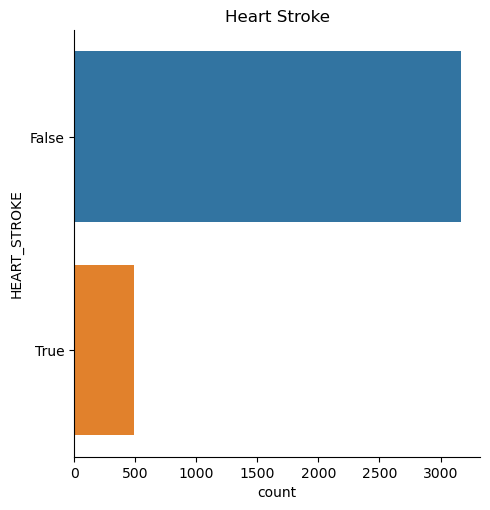

In [351]:
sb.catplot(y = "HEART_STROKE", data = heart_dis_cln, kind = "count")
plt.title("Heart Stroke")

Predictors (Numerical Variables).Once again, we have a look at the boxplot, histogram with kernel density estimation and violin plot of **Age**, **Cigarettes per day**, **Total Cholesterol**, **Systolic Blood Pressure**, **Diastolic Blood Pressure**, **BMI**, **Heart Rate** and **Glucose Level** respectively.

In [399]:
num_lst=("AGE", "CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL")

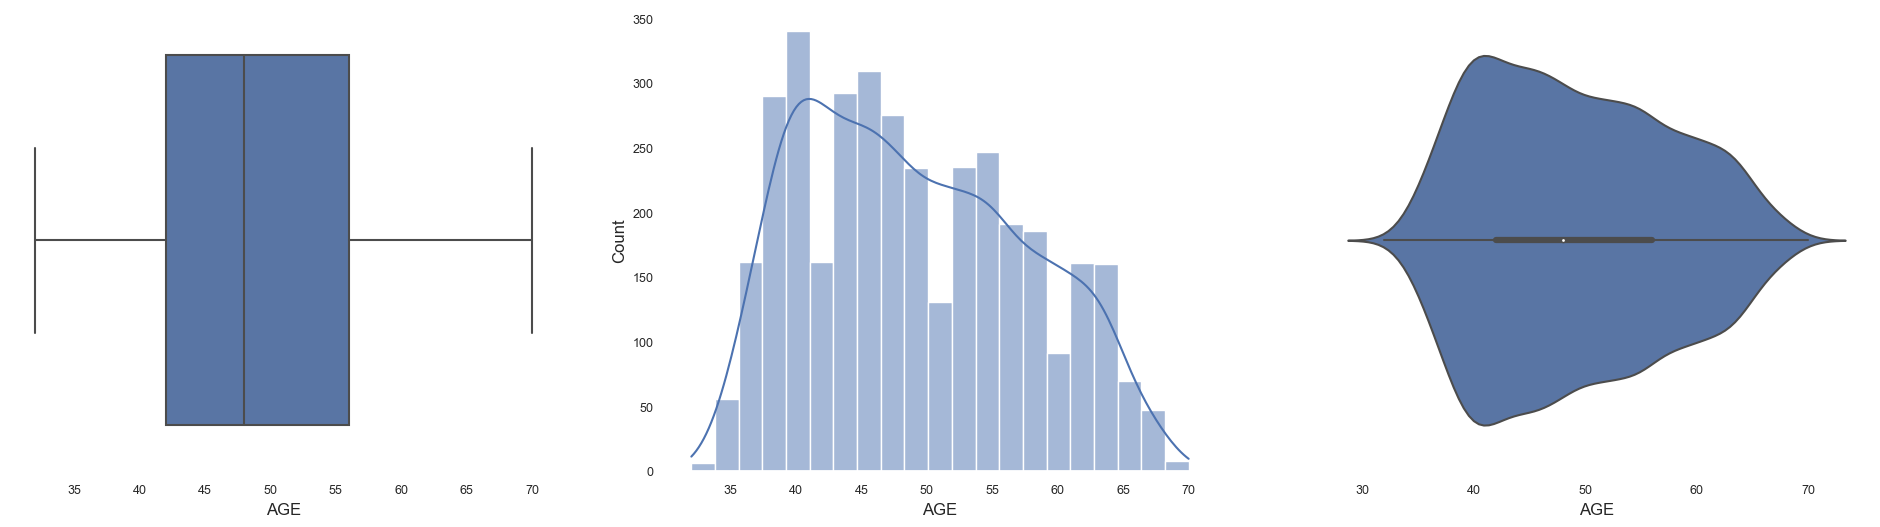

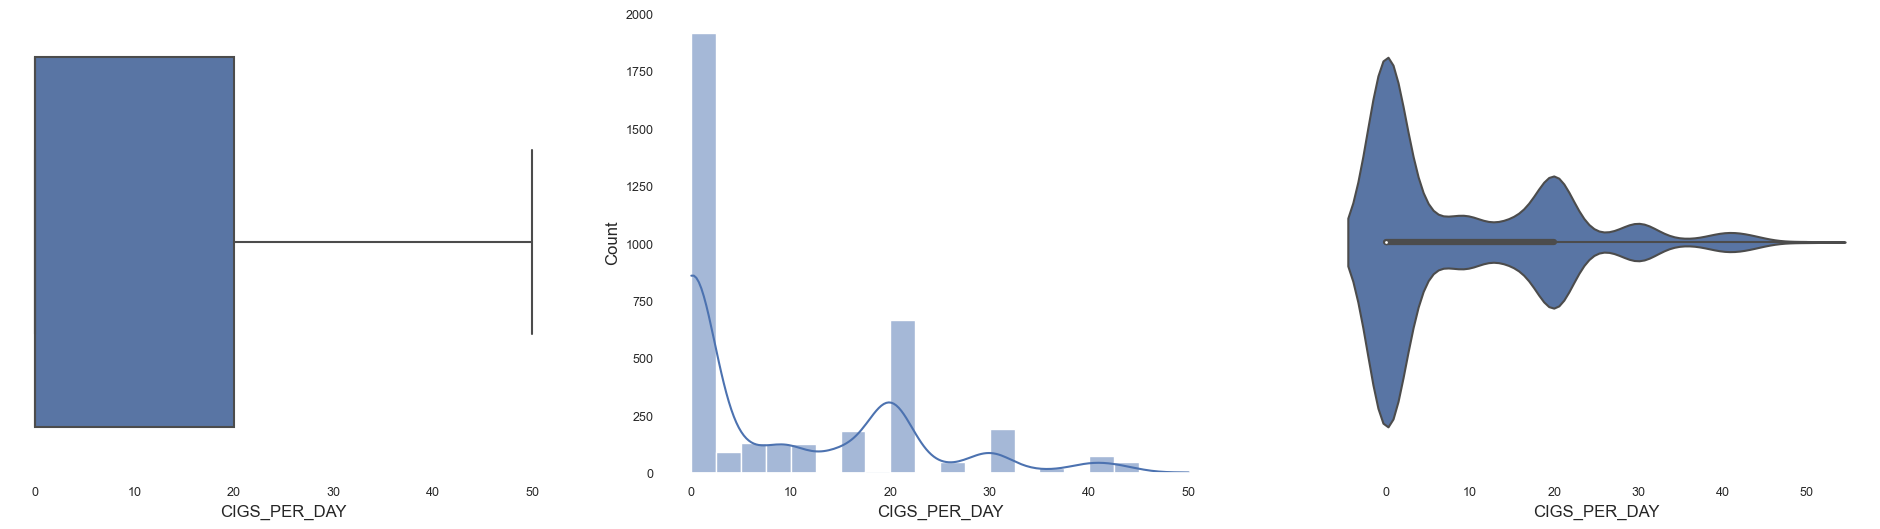

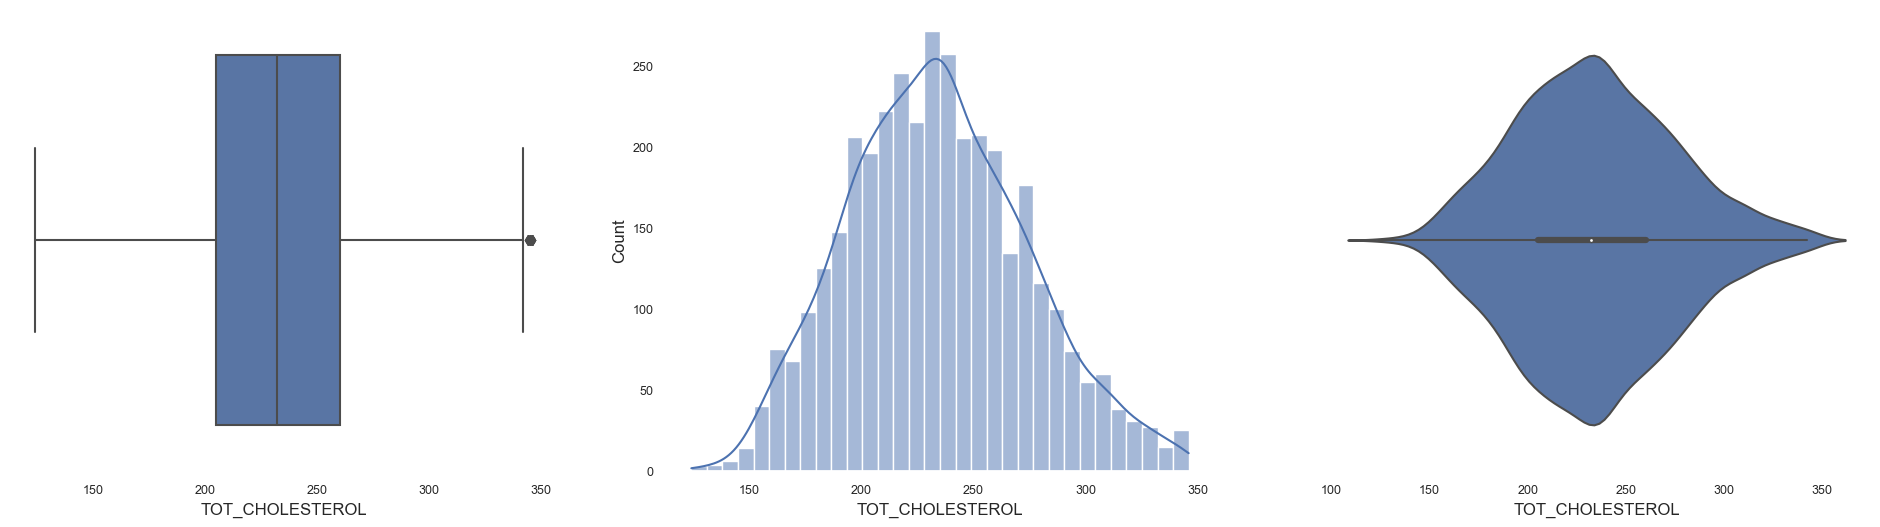

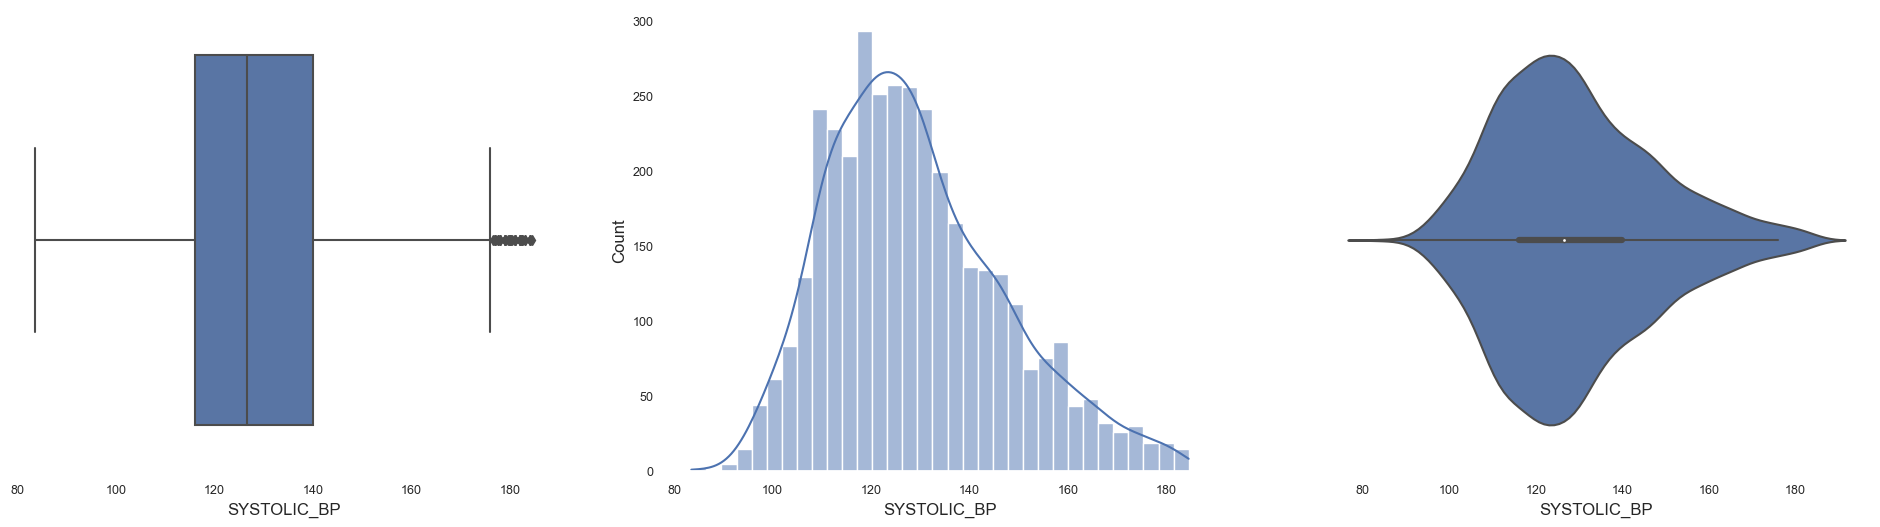

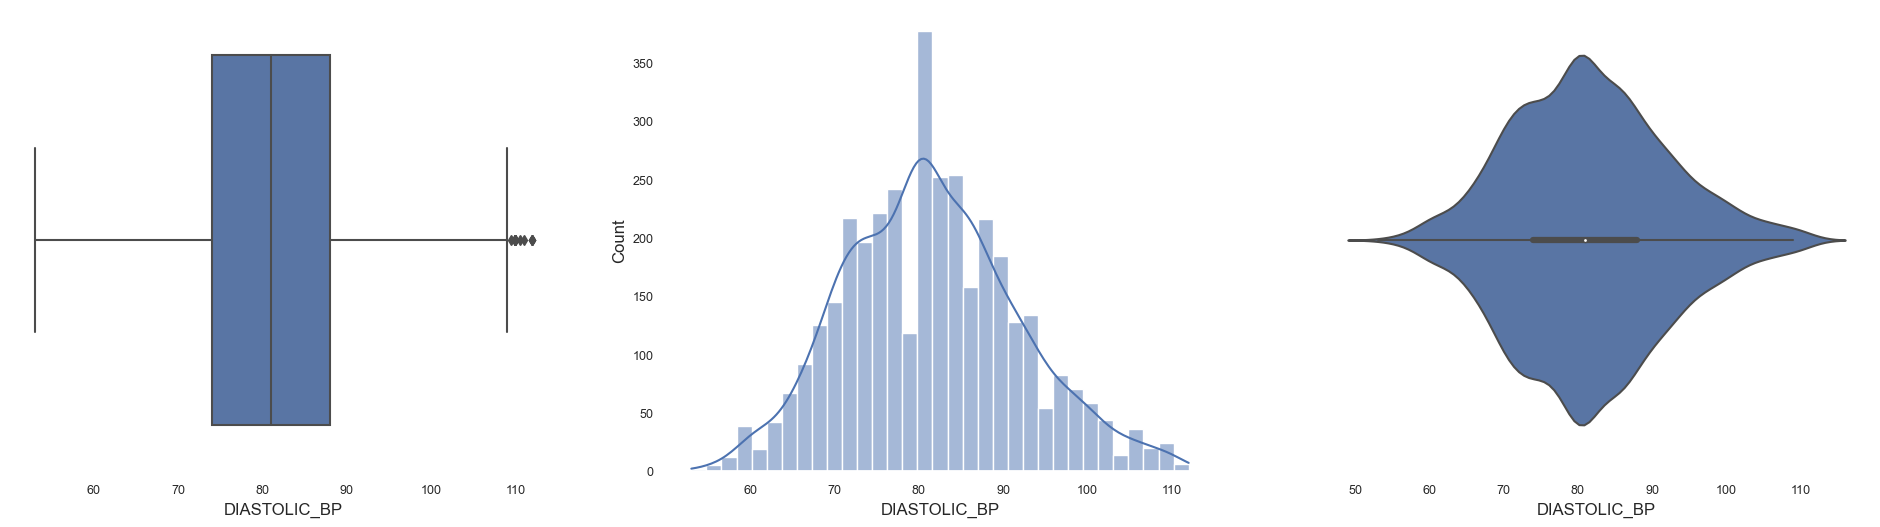

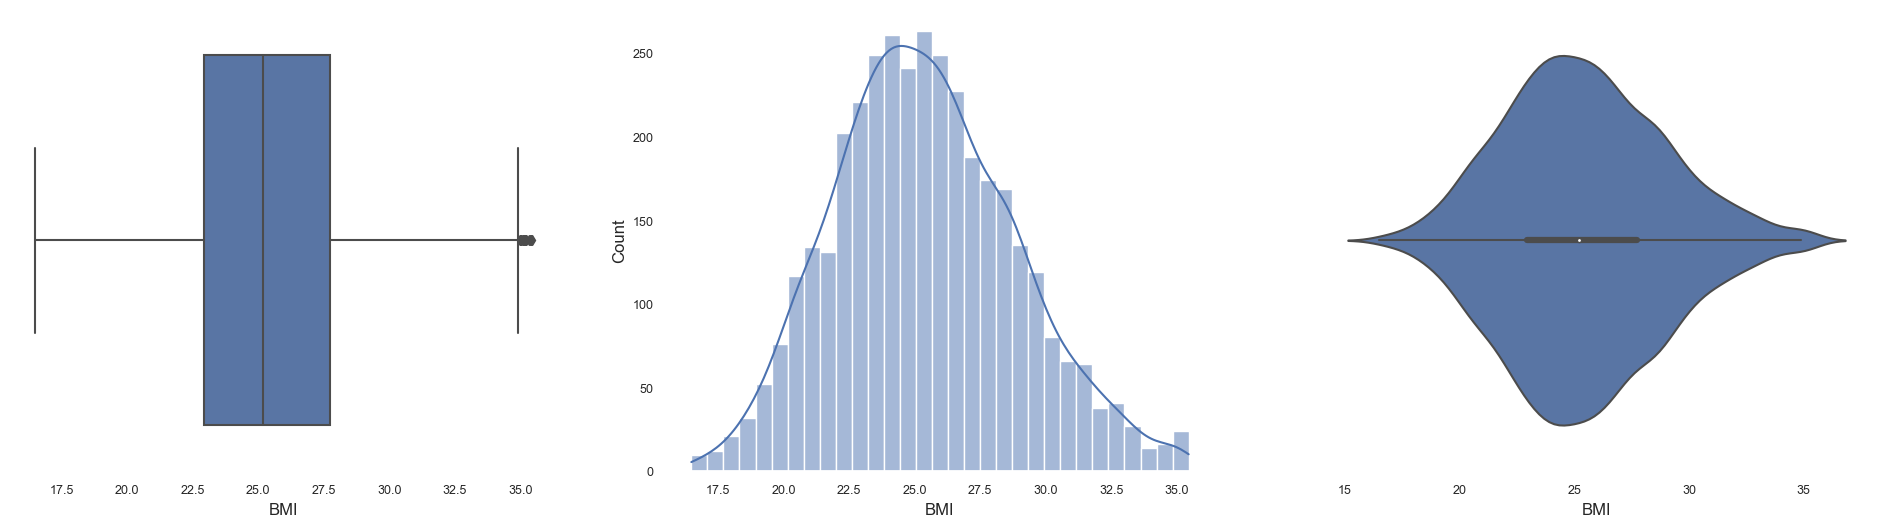

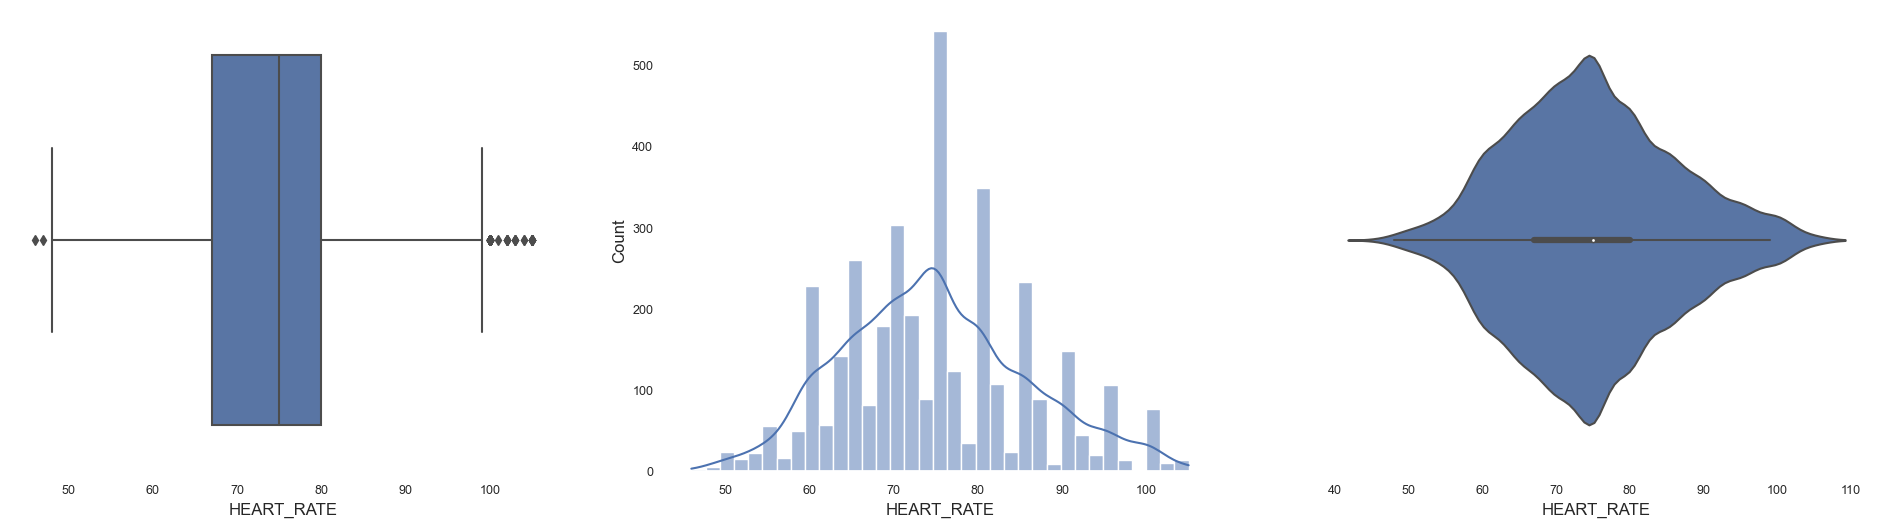

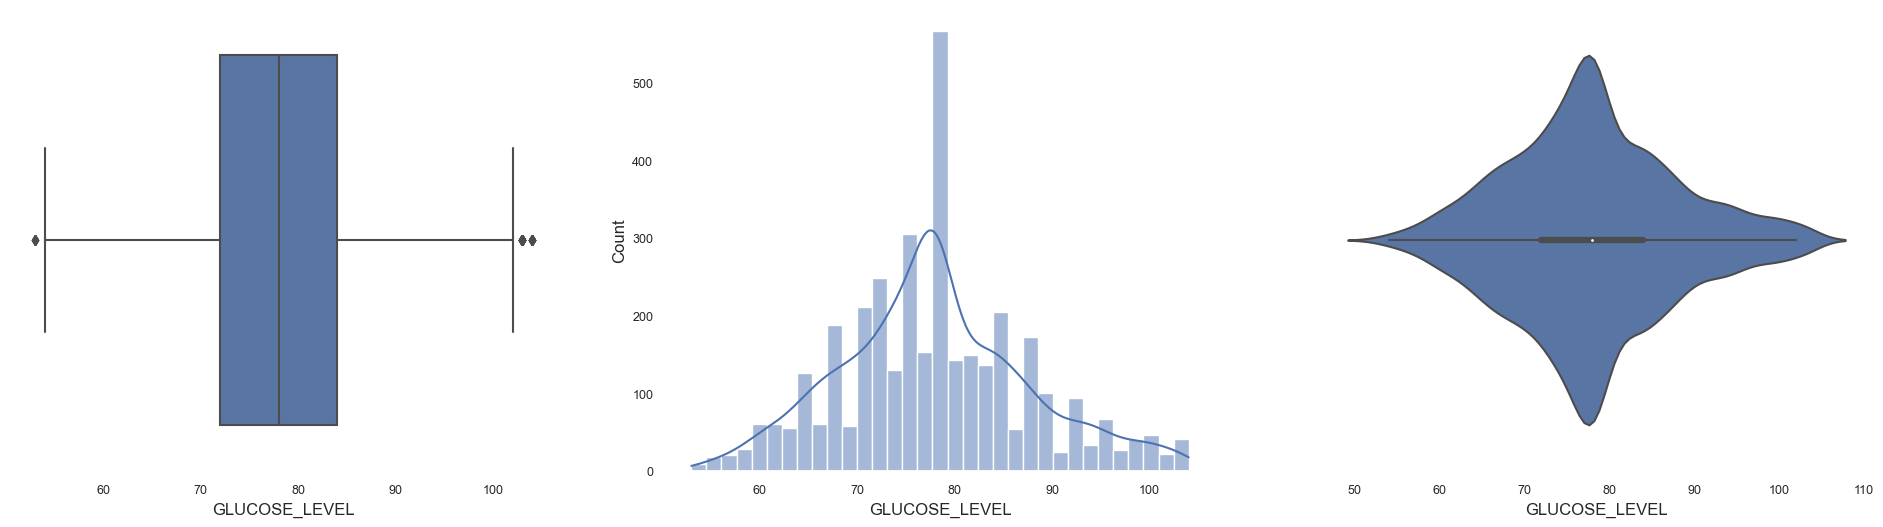

In [400]:
for var in num_lst:
    f, axes=plt.subplots(1,3, figsize=(24,6))
    
    sb.boxplot(x=heart_dis_cln[var], orient='h', ax=axes[0])
    sb.histplot(x=heart_dis_cln[var], kde=True, ax=axes[1])
    sb.violinplot(x=heart_dis_cln[var], orient='h', ax=axes[2])

Predictors (Categorical Variables). Once again, we have a look at the categorical plot of **age group**, **gender**, **education**, **current smoker**, **blood prressure medication**, **prevalent stroke**, **prevalent hypertension** and **diabetes** respectively.

In [354]:
cat_lst=("AGEGROUP", "GENDER", "EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES")

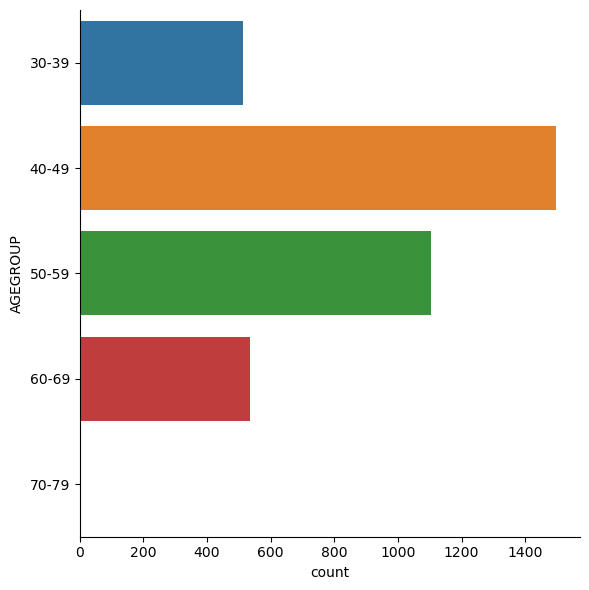

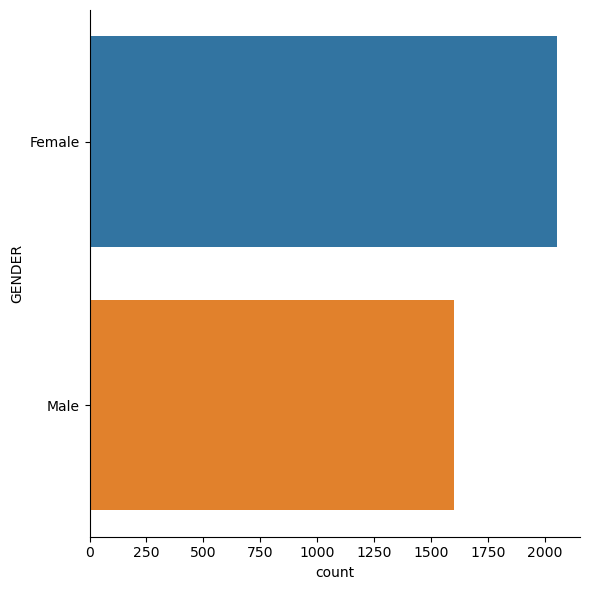

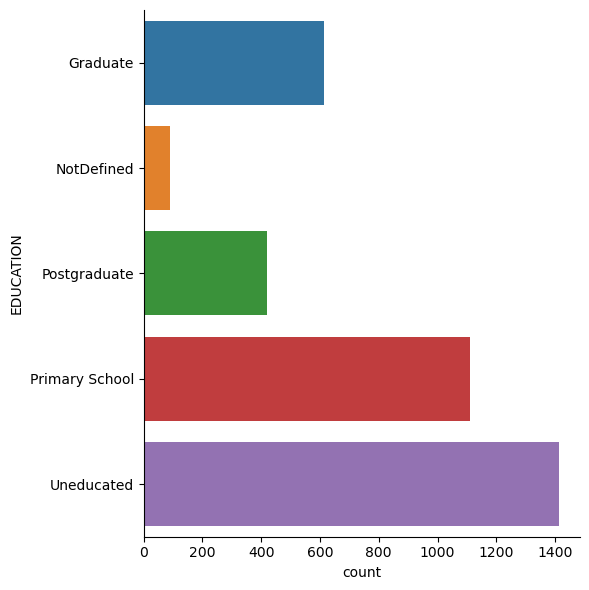

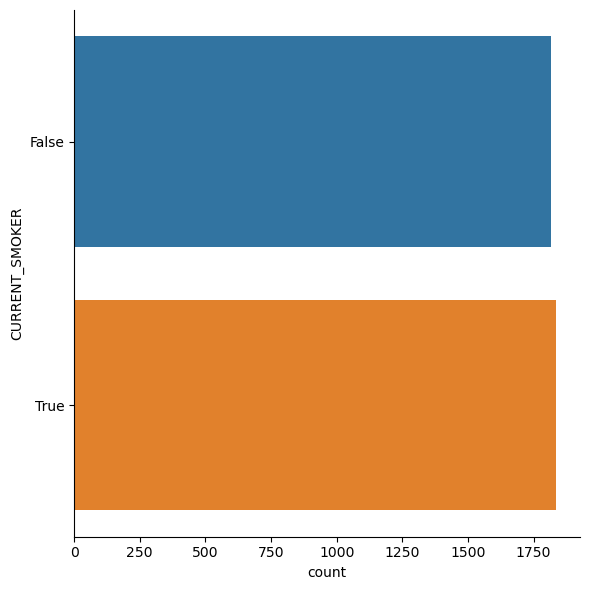

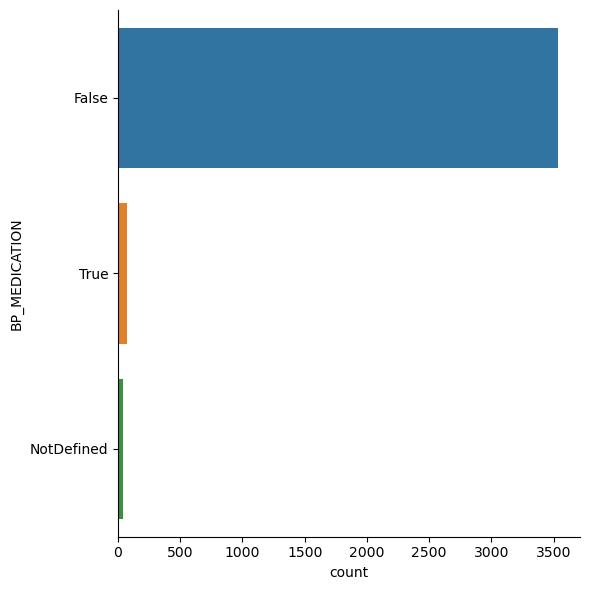

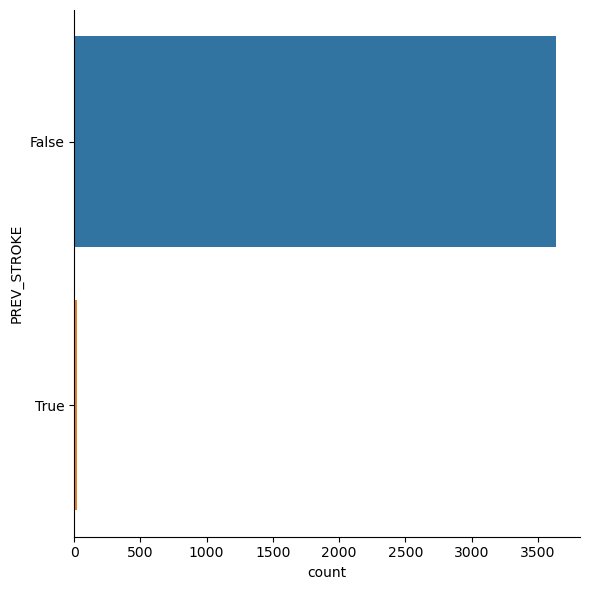

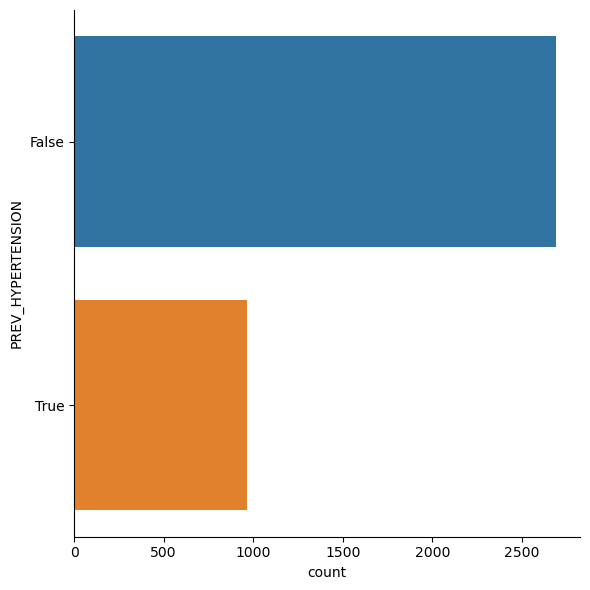

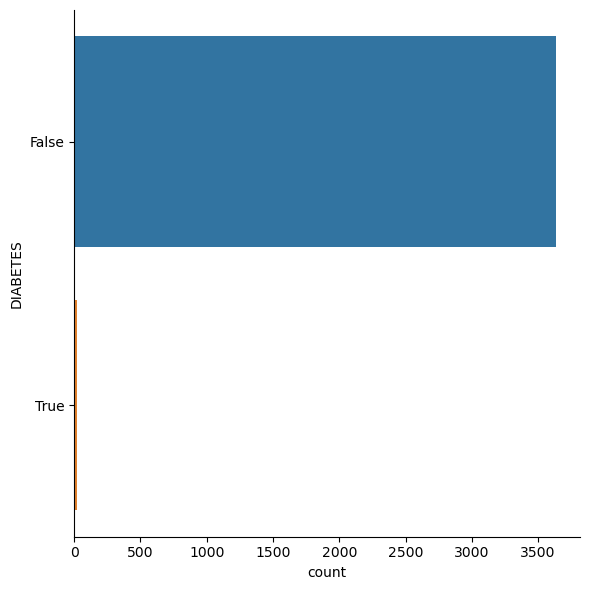

In [355]:
for var in cat_lst:
    sb.catplot(y=var, data=heart_dis_cln, kind="count", height=6)

### Relationship between Age Group and Heart Stroke Occurence

The bar plot below shows the top 5 **age group** that has **heart stroke**.

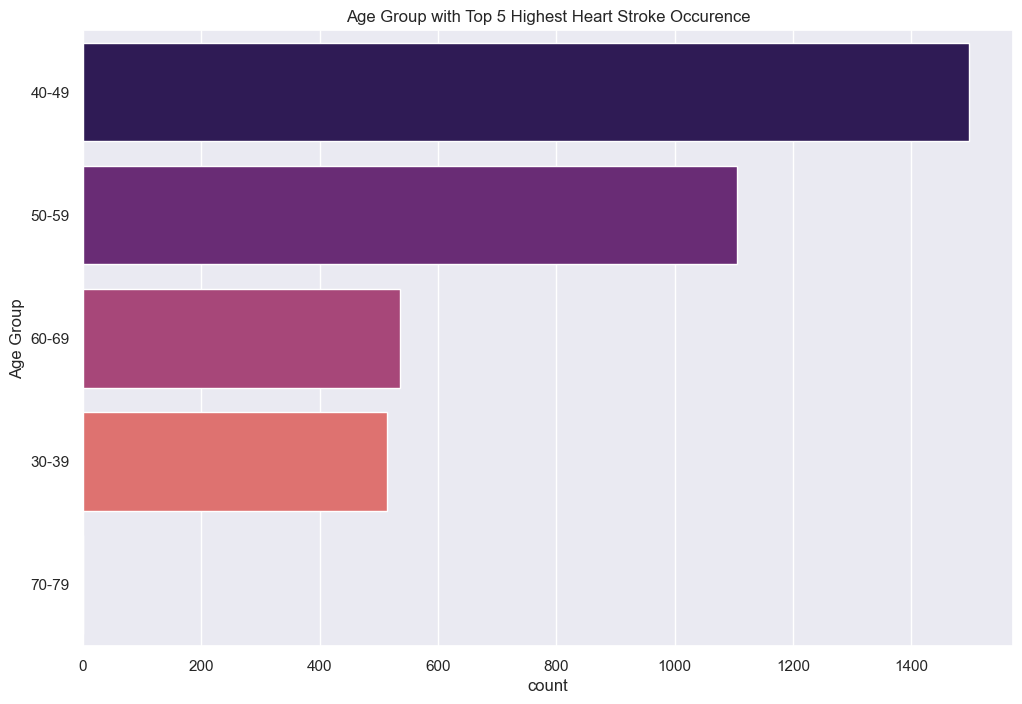

In [364]:
agegroup_hs=heart_dis_cln["AGEGROUP"].astype("object")
agegroup_hs_h=agegroup_hs.value_counts().sort_values(ascending=False)[0:5]
sb.set_style("white")
sb.set_style("white")
sb.set(rc={'figure.figsize':(12,8)})
sb.barplot(x=agegroup_hs_h.values, y=agegroup_hs_h.index, palette='magma')
plt.xlabel("count")
plt.ylabel("Age Group")
plt.title("Age Group with Top 5 Highest Heart Stroke Occurence")
plt.show()

## Statistical Summary: Numerical Variables (Multi-variate) vs Total Cholesterol (Numeric)

In [401]:
num_var=pd.DataFrame(heart_dis_cln[["AGE", "CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]])

This shows the correlation values (in table, heatmap and grid pair) between multi-variables.

In [402]:
num_var.corr()

AGE  CIGS_PER_DAY  TOT_CHOLESTEROL  SYSTOLIC_BP  \
AGE              1.000000     -0.181608         0.271722     0.370302   
CIGS_PER_DAY    -0.181608      1.000000        -0.021006    -0.059554   
TOT_CHOLESTEROL  0.271722     -0.021006         1.000000     0.199790   
SYSTOLIC_BP      0.370302     -0.059554         0.199790     1.000000   
DIASTOLIC_BP     0.177084     -0.040832         0.183973     0.760702   
BMI              0.130484     -0.083610         0.158505     0.277638   
HEART_RATE      -0.038896      0.086548         0.080530     0.138604   
GLUCOSE_LEVEL    0.076678     -0.075602         0.008703     0.059048   

                 DIASTOLIC_BP       BMI  HEART_RATE  GLUCOSE_LEVEL  
AGE                  0.177084  0.130484   -0.038896       0.076678  
CIGS_PER_DAY        -0.040832 -0.083610    0.086548      -0.075602  
TOT_CHOLESTEROL      0.183973  0.158505    0.080530       0.008703  
SYSTOLIC_BP          0.760702  0.277638    0.138604       0.059048  
DIASTOLIC_BP         1.000000  0.332565    0.156674       0.017579  
BMI                  0.332565  1.000000    0.037645       0.053248  
HEART_RATE           0.156674  0.037645    1.000000       0.061002  
GLUCOSE_LEVEL        0.017579  0.053248    0.061002       1.000000

<AxesSubplot:>

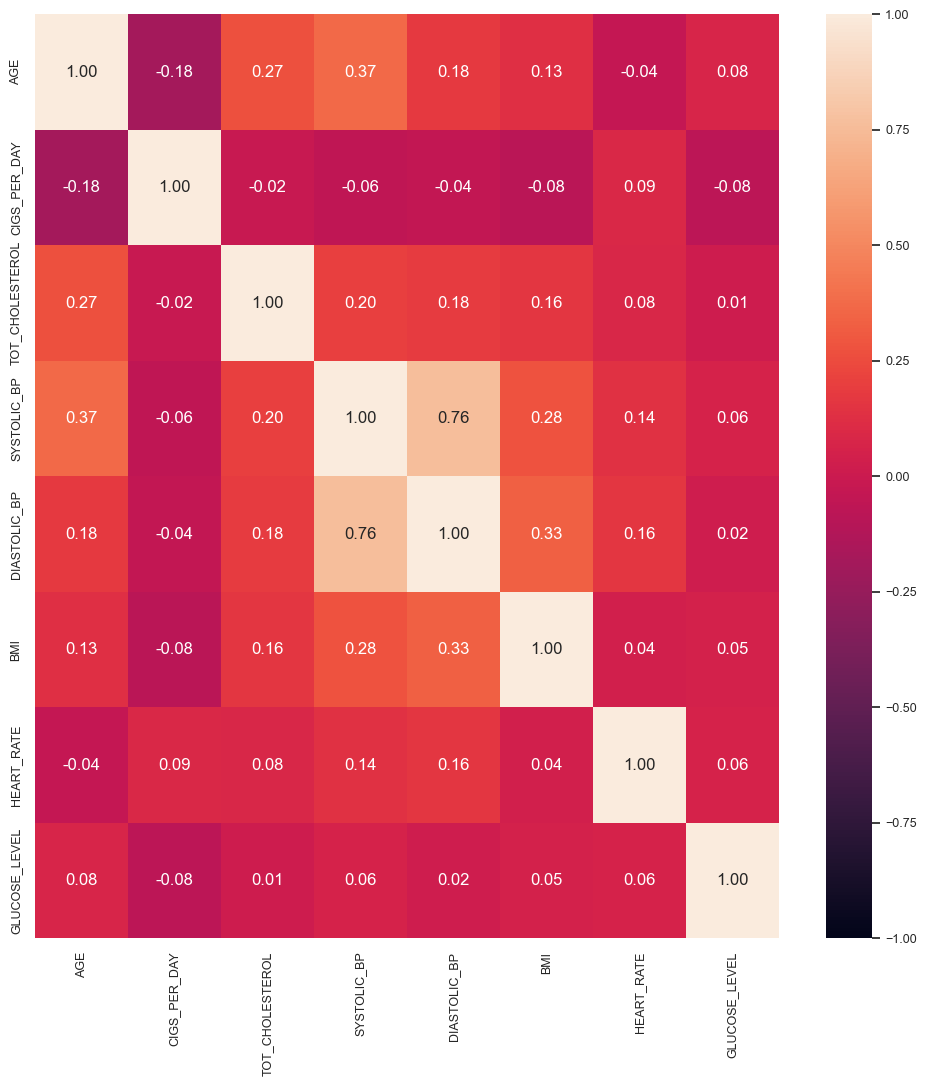

In [403]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(num_var.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

A pairplot here is not ideal for visualization as the data contains around 3500++ data points.

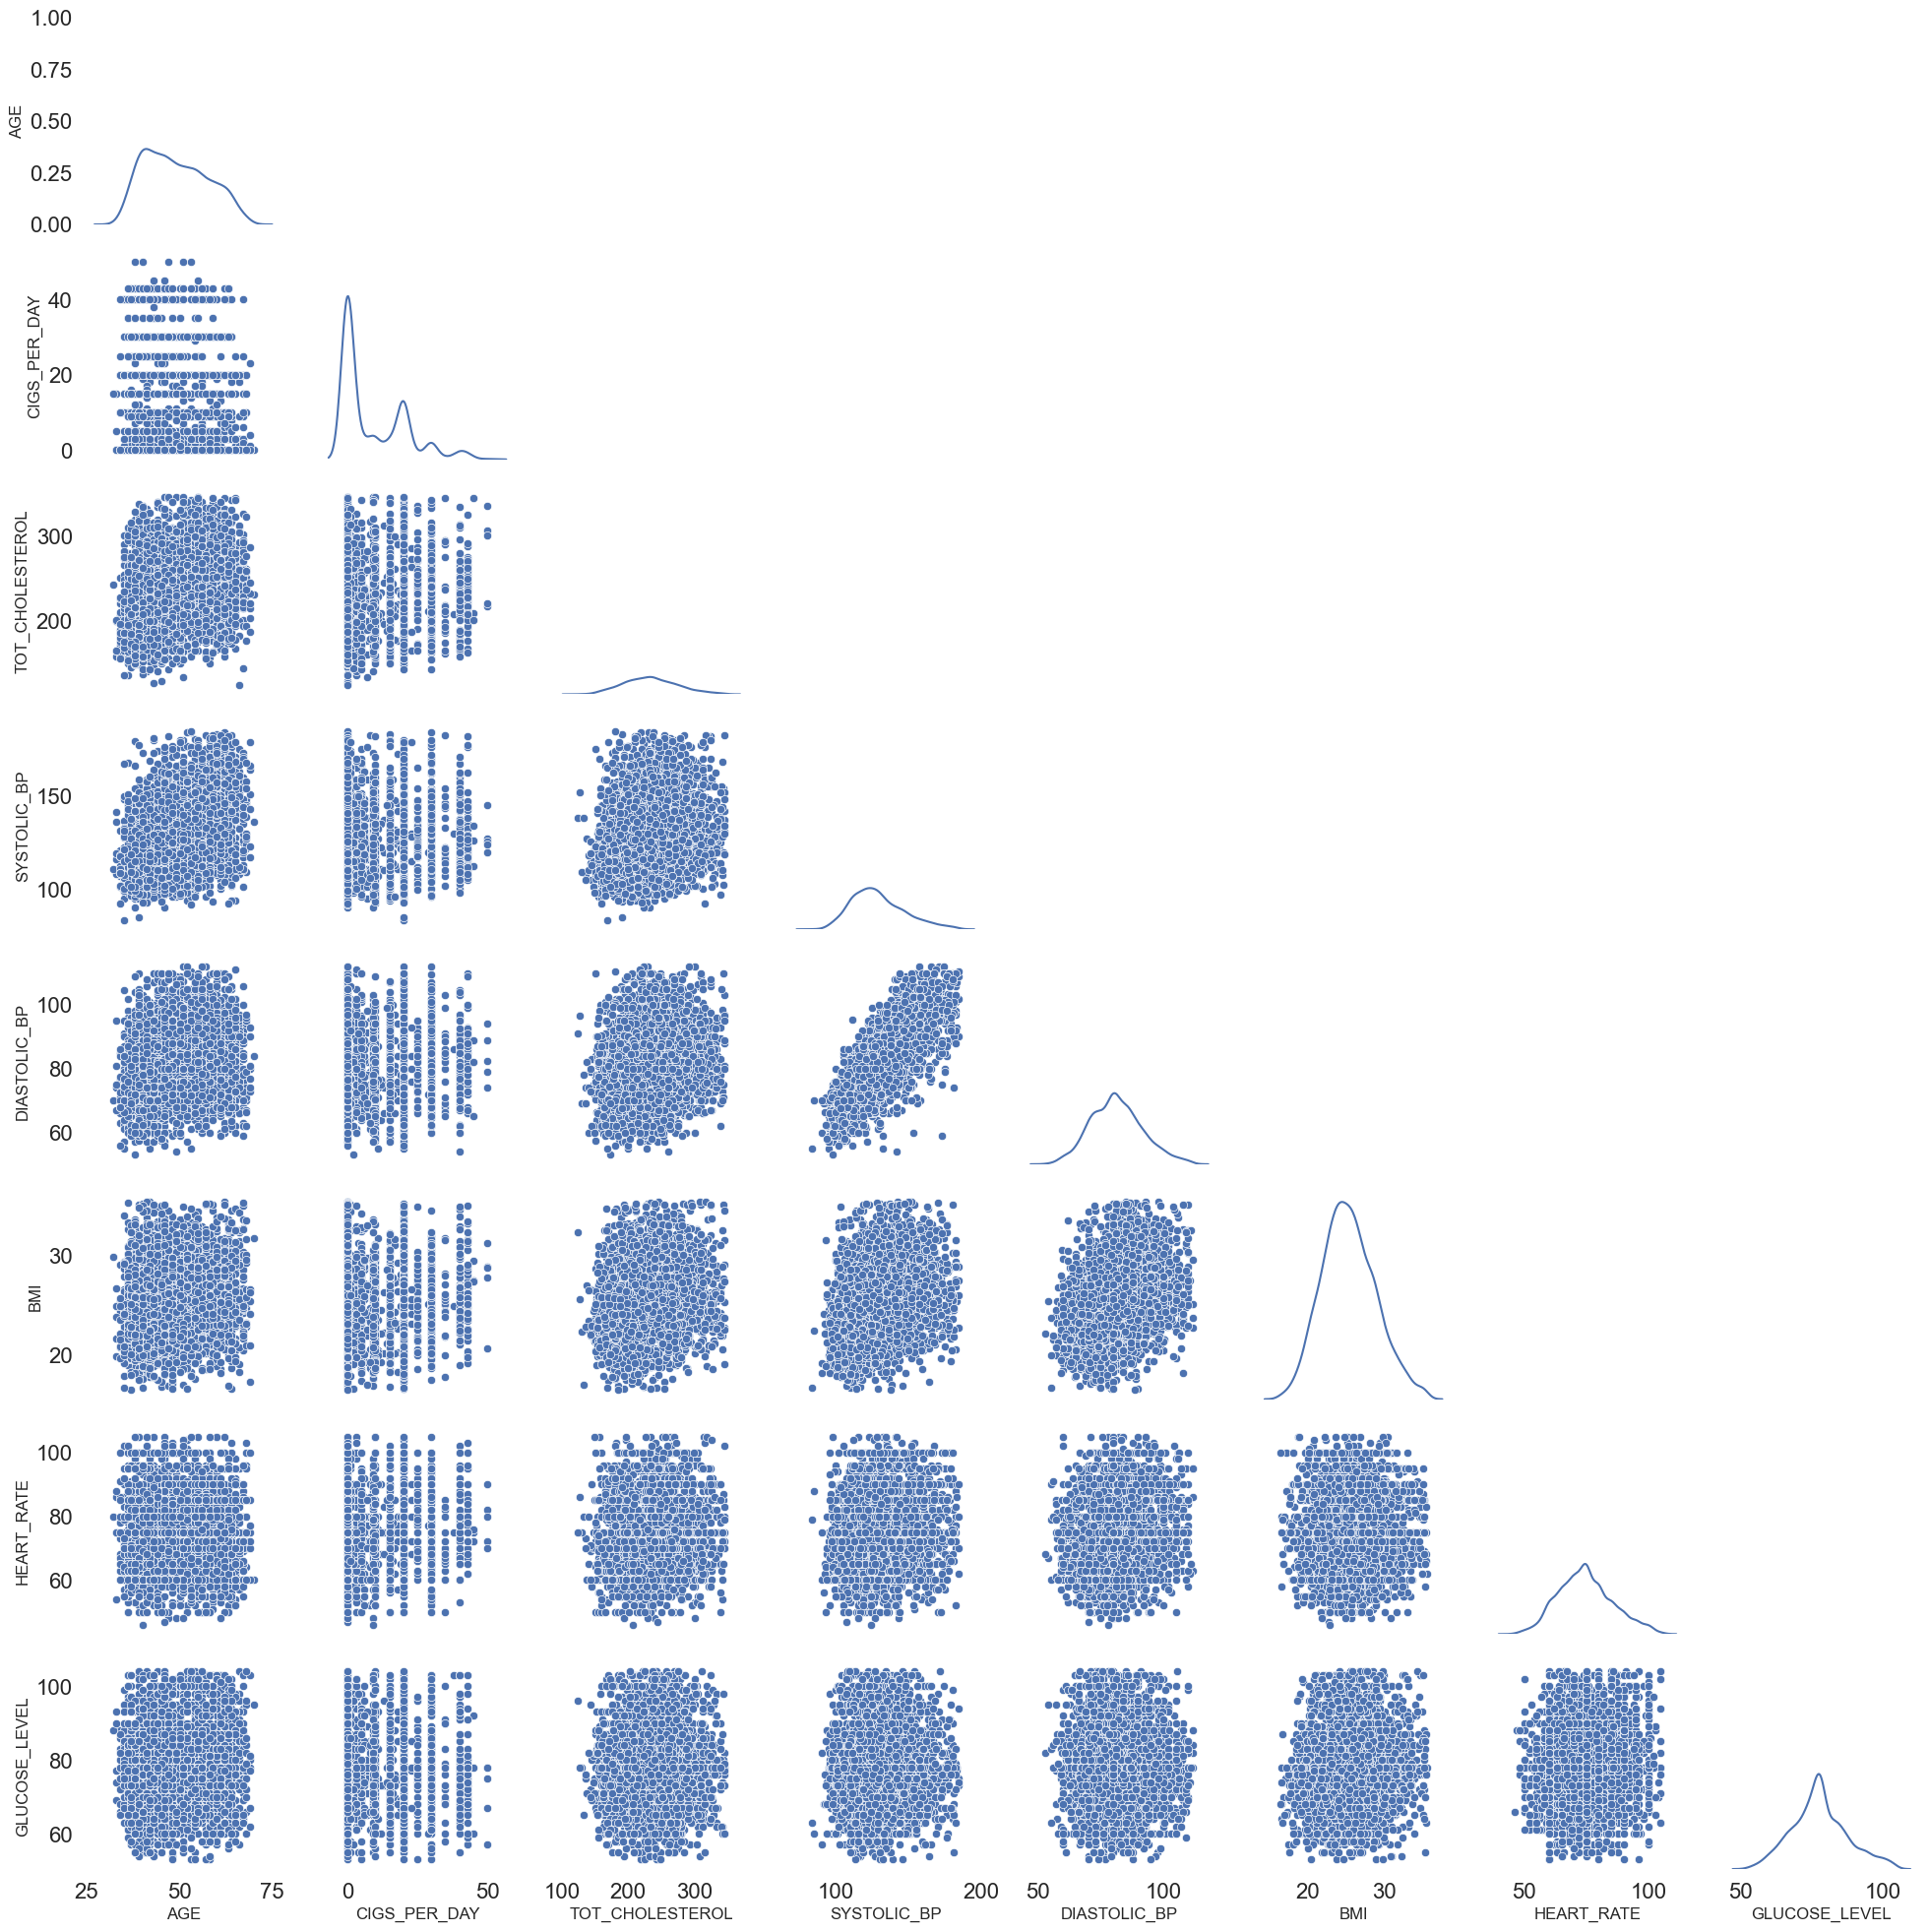

In [413]:
fig_pairGrid=sb.PairGrid(num_var)
fig_pairGrid.map_lower(sb.scatterplot)
fig_pairGrid.map_diag(sb.kdeplot)

Now let's understand the impact of a combination of two numerical variables on Heart Stroke occurence

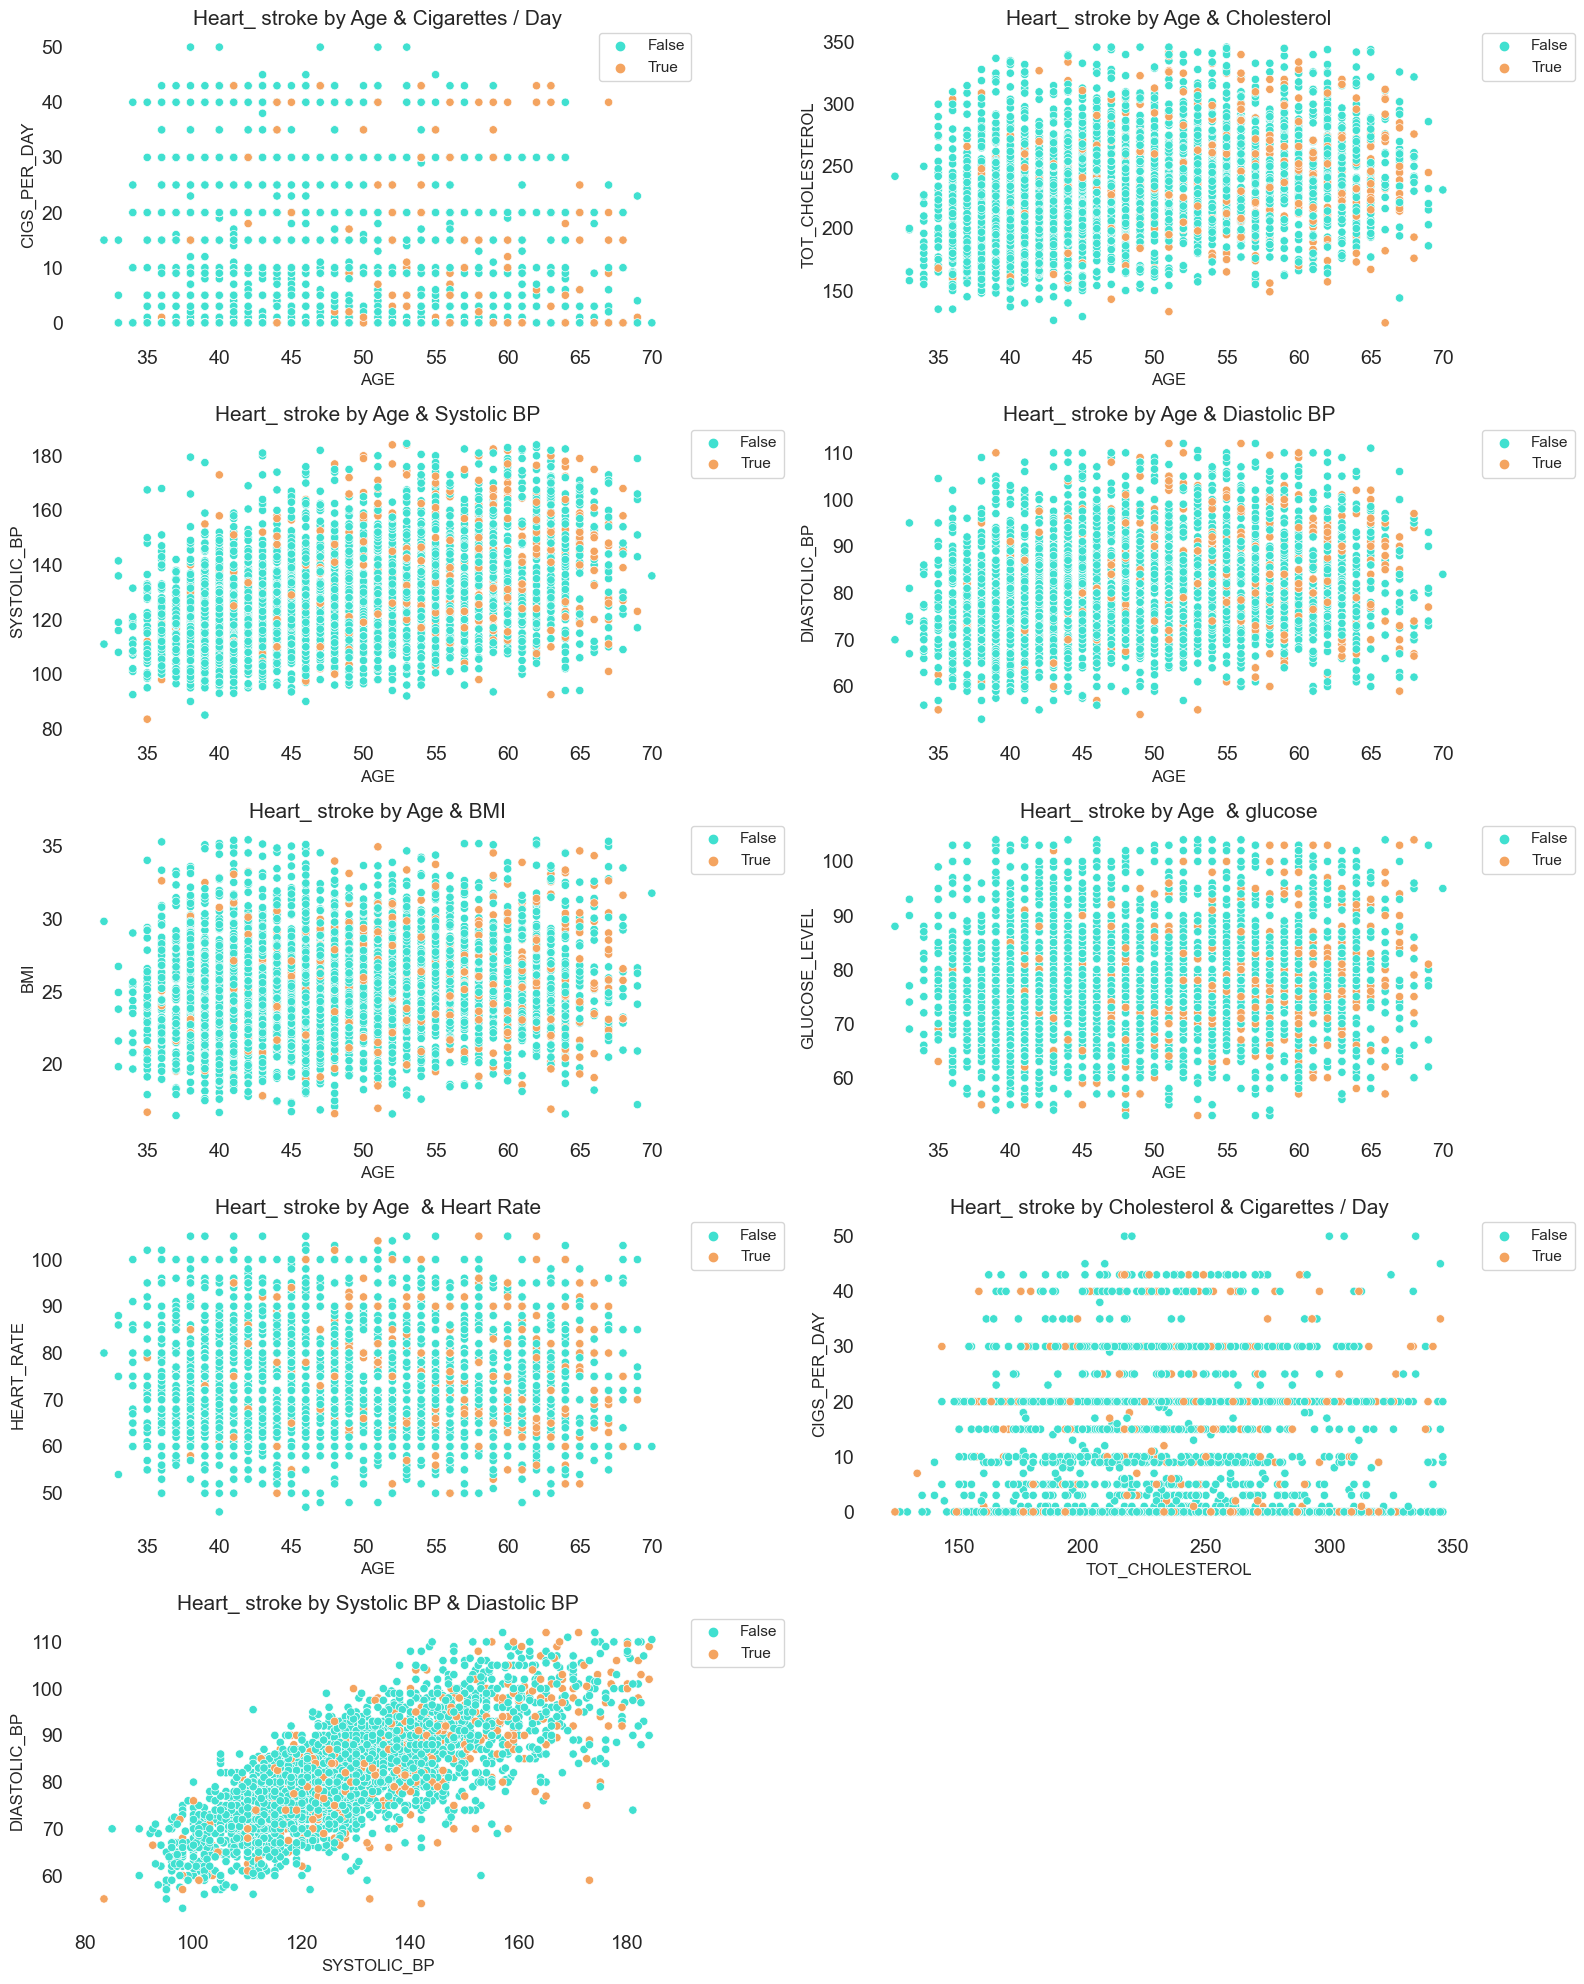

In [405]:
sb.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(16,20))
my_pal = ("#40E0D0", "#F4A460")

plt.subplot(5,2,1)
plt.title('Heart_ stroke by Age & Cigarettes / Day', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='CIGS_PER_DAY', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,2)
plt.title('Heart_ stroke by Age & Cholesterol', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='TOT_CHOLESTEROL', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,3)
plt.title('Heart_ stroke by Age & Systolic BP', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='SYSTOLIC_BP', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,4)
plt.title('Heart_ stroke by Age & Diastolic BP', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='DIASTOLIC_BP', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,5)
plt.title('Heart_ stroke by Age & BMI', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='BMI', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,6)
plt.title('Heart_ stroke by Age  & glucose', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='GLUCOSE_LEVEL', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,7)
plt.title('Heart_ stroke by Age  & Heart Rate', fontdict={'fontsize':15})
sb.scatterplot(x='AGE', y='HEART_RATE', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,8)
plt.title('Heart_ stroke by Cholesterol & Cigarettes / Day', fontdict={'fontsize':15})
sb.scatterplot(x='TOT_CHOLESTEROL', y='CIGS_PER_DAY', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,9)
plt.title('Heart_ stroke by Systolic BP & Diastolic BP', fontdict={'fontsize':15})
sb.scatterplot(x='SYSTOLIC_BP', y='DIASTOLIC_BP', hue='HEART_STROKE', palette=my_pal, data=heart_dis_cln)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.show()

There isn't much correlation between most of the numerical features and the target variable (heart stroke).

Diastolic BP and Systolic BP show some degree of correlation. And in remaining features, there isn't any visible correlation.

Generally, it is told that cholesterol and smoking have direct correlation with heart disease and heart stroke, but from the current data, it is difficult to see such strong correlation.

## Statistical Summary: Categorical Variables vs Heart Stroke (Categorical)

### Distribution of Age Group for Occurence of Heart Stroke

Here we show the distribution of age group against the occurence of heart stroke in terms of categorical plot and heatmap.

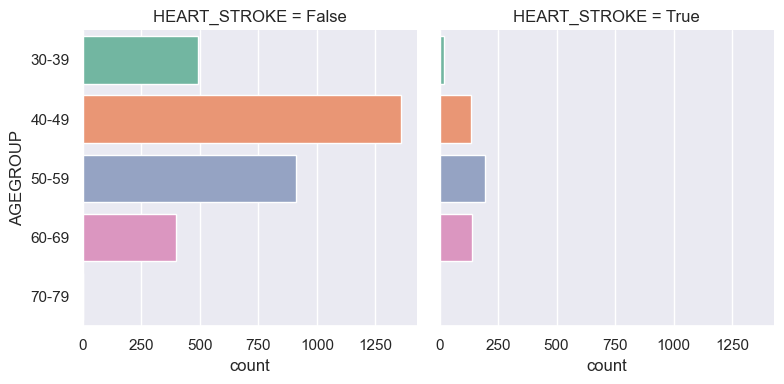

In [372]:
sb.catplot(y = 'AGEGROUP', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Text(0.5, 1.0, 'Age Group vs Heart Stroke')

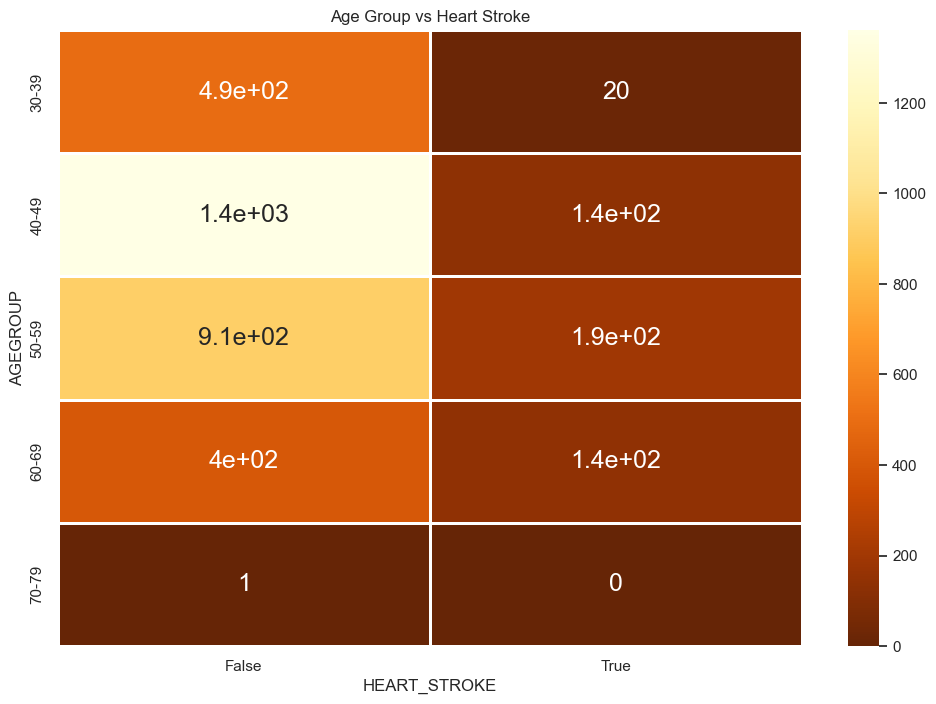

In [373]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['AGEGROUP', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Age Group vs Heart Stroke")

### Distribution of Gender for Occurence of Heart Stroke

Here we show the distribution of gender against the occurence of heart stroke in terms of categorical plot and heatmap.

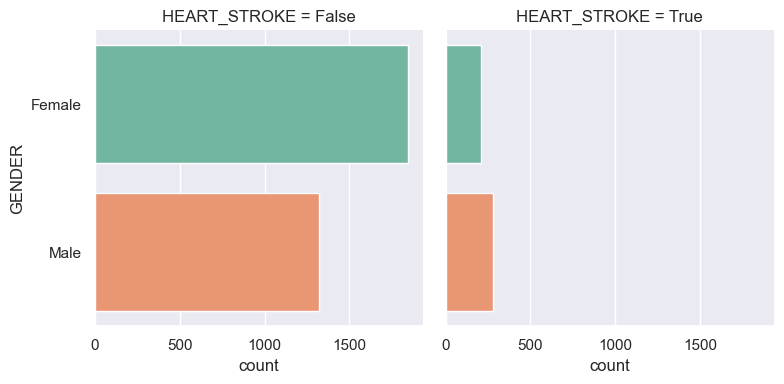

In [374]:
sb.catplot(y = 'GENDER', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Total patient count by **gender** is higher for female patients.

Whereas positive (+ve) patient count is higher for male patients.

Text(0.5, 1.0, 'Gender vs Heart Stroke')

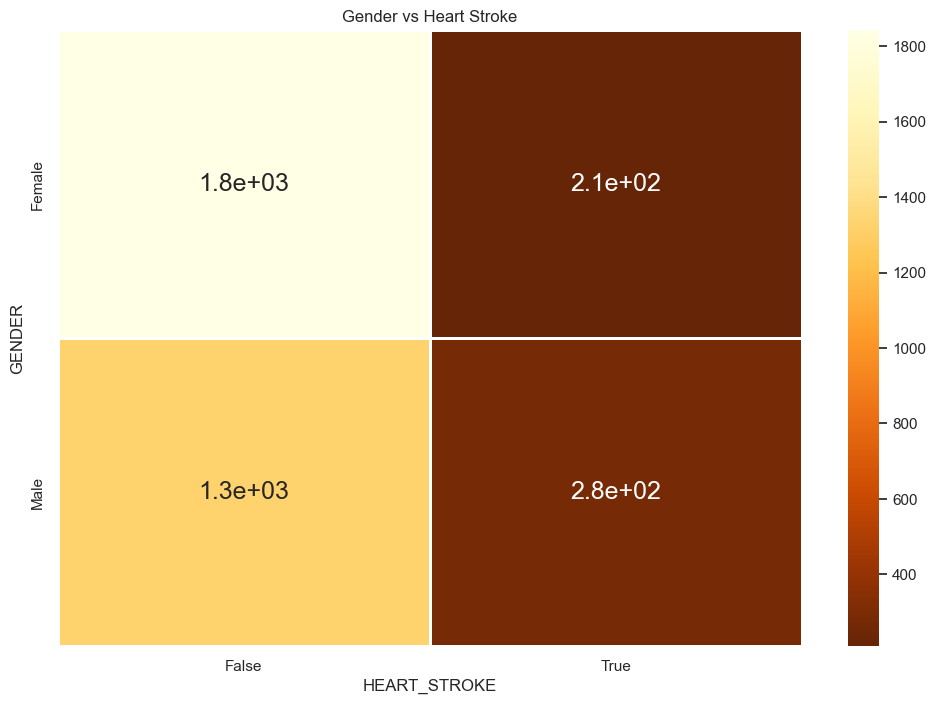

In [375]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['GENDER', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Gender vs Heart Stroke")

### Distribution of Education for Occurence of Heart Stroke

Here we show the distribution of education against the occurence of heart stroke in terms of categorical plot and heatmap.

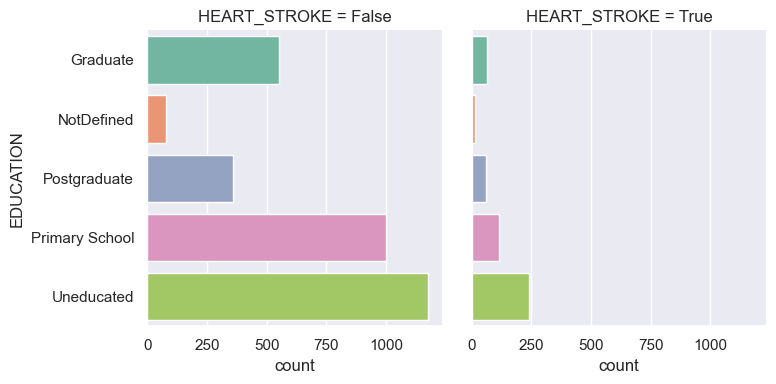

In [376]:
sb.catplot(y = 'EDUCATION', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

By **education**, positive patient count is higher for uneducated patient group.

Text(0.5, 1.0, 'Education vs Heart Stroke')

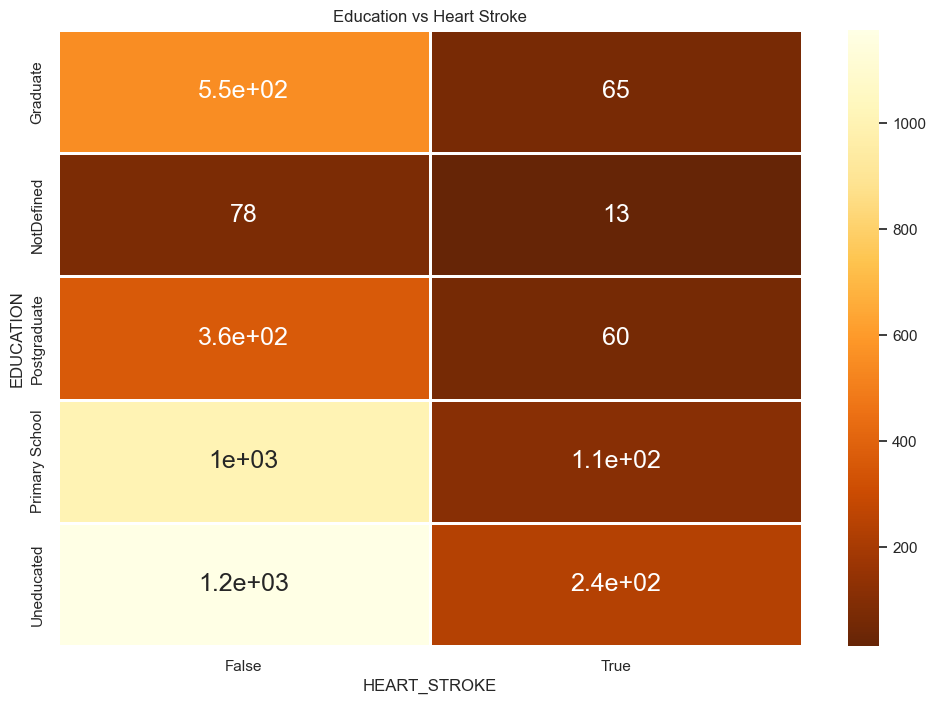

In [377]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['EDUCATION', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Education vs Heart Stroke")

### Distribution of Current Smoker for Occurence of Heart Stroke

Here we show the distribution of current smoker against the occurence of heart stroke in terms of categorical plot and heatmap.

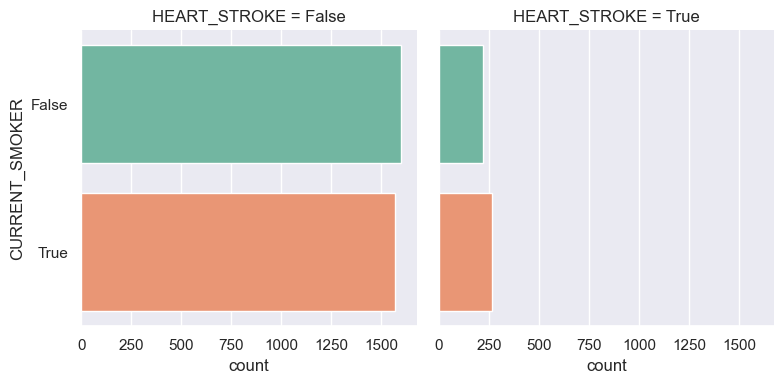

In [378]:
sb.catplot(y = 'CURRENT_SMOKER', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Text(0.5, 1.0, 'Current Smoker vs Heart Stroke')

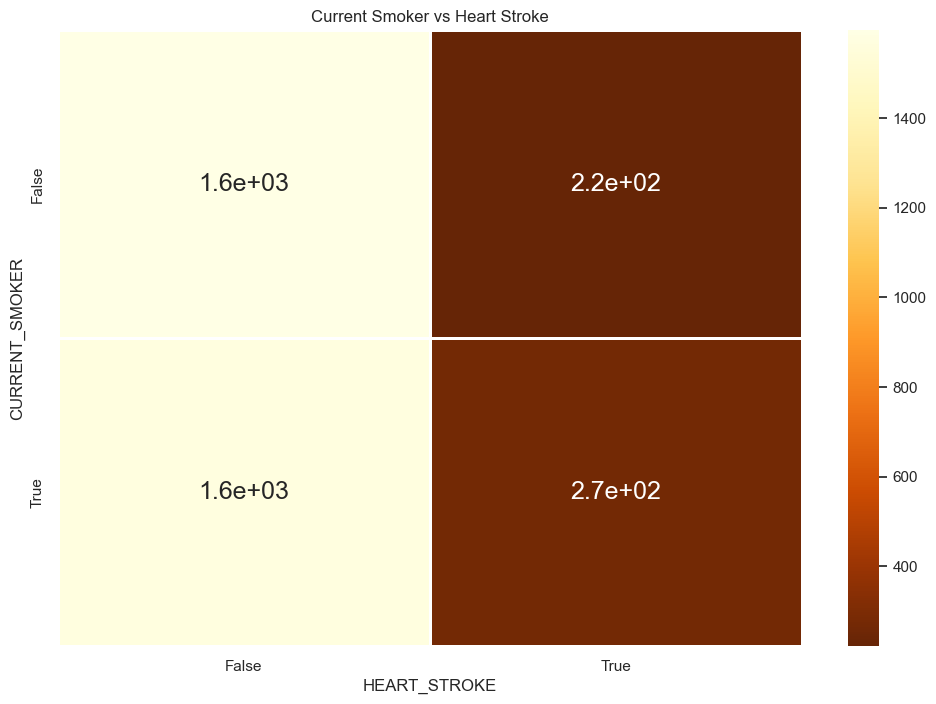

In [379]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['CURRENT_SMOKER', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Current Smoker vs Heart Stroke")

### Distribution of Blood Pressure Medication for Occurence of Heart Stroke

Here we show the distribution of blood pressure medication against the occurence of heart stroke in terms of categorical plot and heatmap.

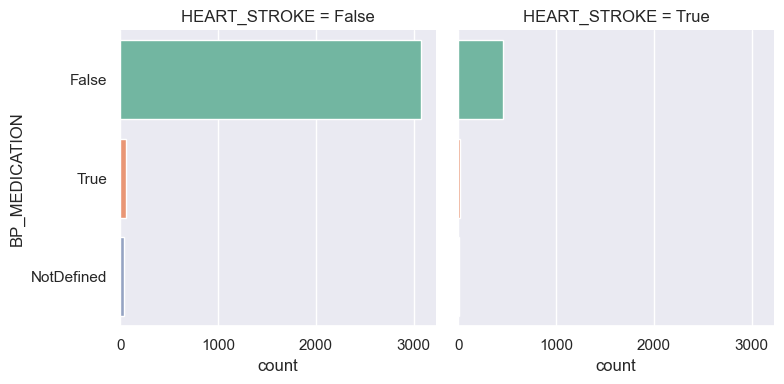

In [380]:
sb.catplot(y = 'BP_MEDICATION', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Text(0.5, 1.0, 'Blood Pressure Medication vs Heart Stroke')

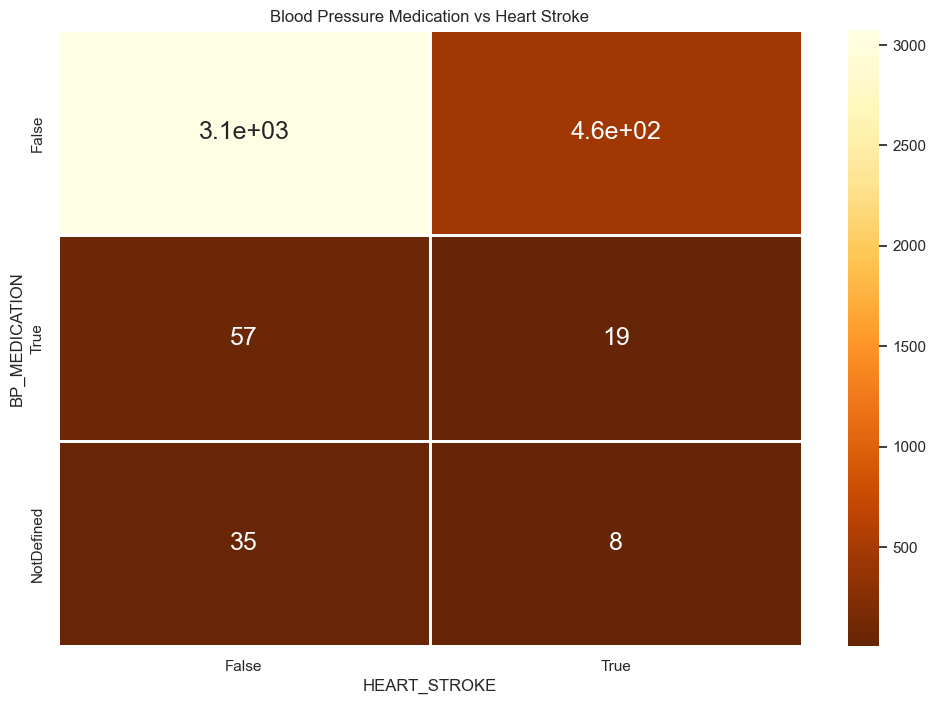

In [381]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['BP_MEDICATION', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Blood Pressure Medication vs Heart Stroke")

### Distribution of Prevalent Stroke for Occurence of Heart Stroke

Here we show the distribution of prevalent stroke against the occurence of heart stroke in terms of categorical plot and heatmap.

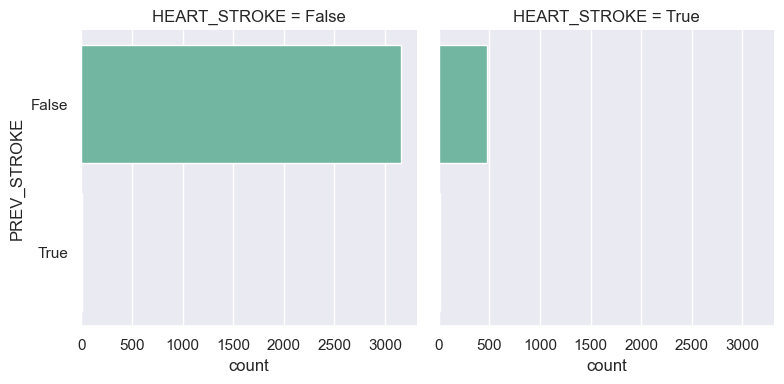

In [382]:
sb.catplot(y = 'PREV_STROKE', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Text(0.5, 1.0, 'Prevalent Stroke vs Heart Stroke')

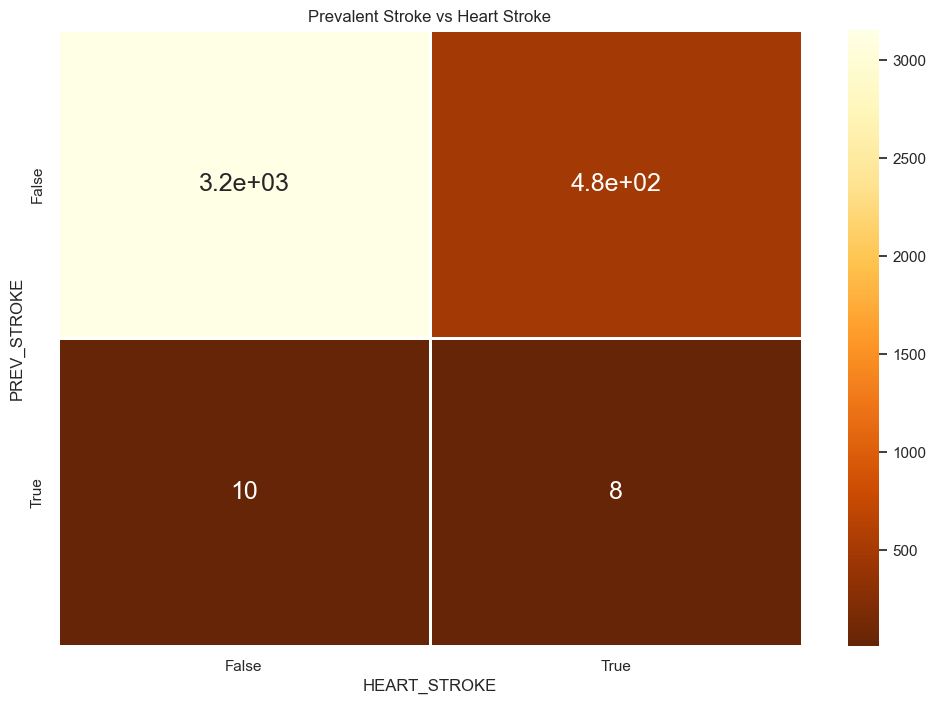

In [383]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['PREV_STROKE', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Prevalent Stroke vs Heart Stroke")

### Distribution of Prevalent Hypertension for Occurence of Heart Stroke

Here we show the distribution of prevalent hypertension against the occurence of heart stroke in terms of categorical plot and heatmap.

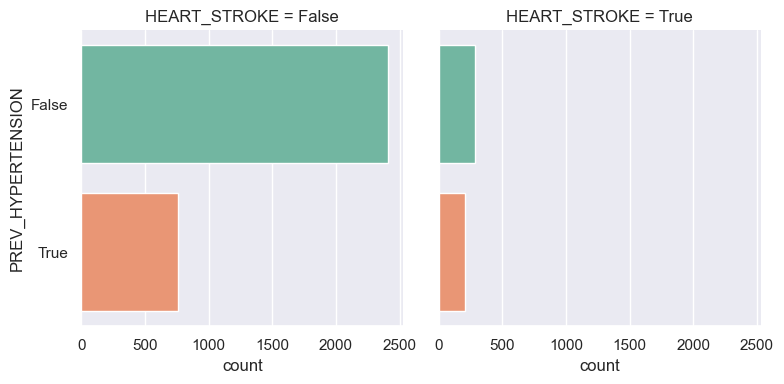

In [384]:
sb.catplot(y = 'PREV_HYPERTENSION', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Text(0.5, 1.0, 'Prevalent Hypertension vs Heart Stroke')

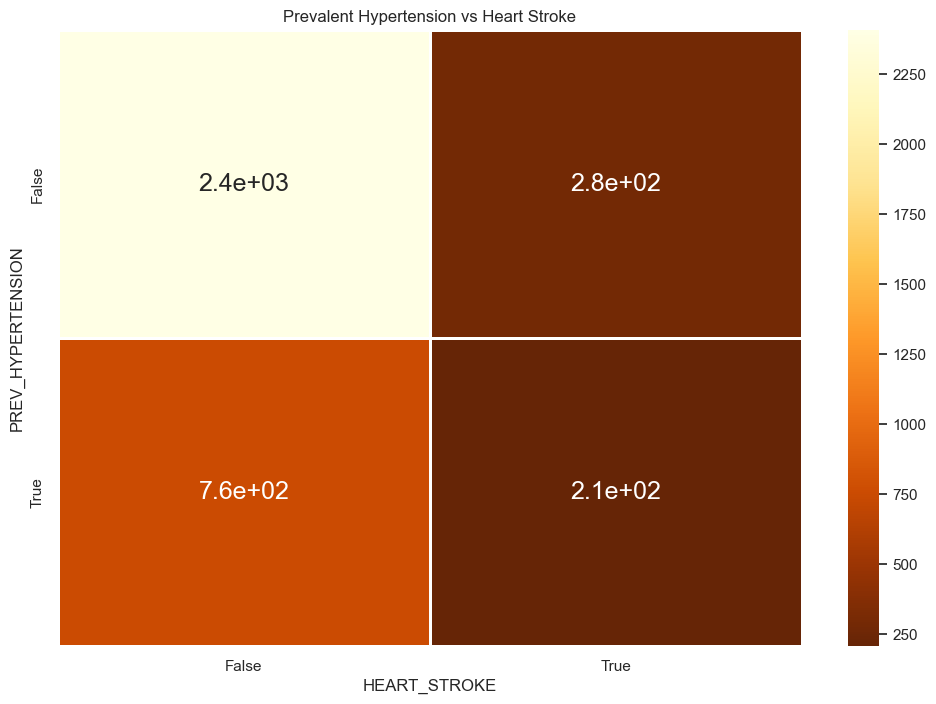

In [385]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['PREV_HYPERTENSION', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Prevalent Hypertension vs Heart Stroke")

### Distribution of Diabetes for Occurence of Heart Stroke

Here we show the distribution of diabetes against the occurence of heart stroke in terms of categorical plot and heatmap.

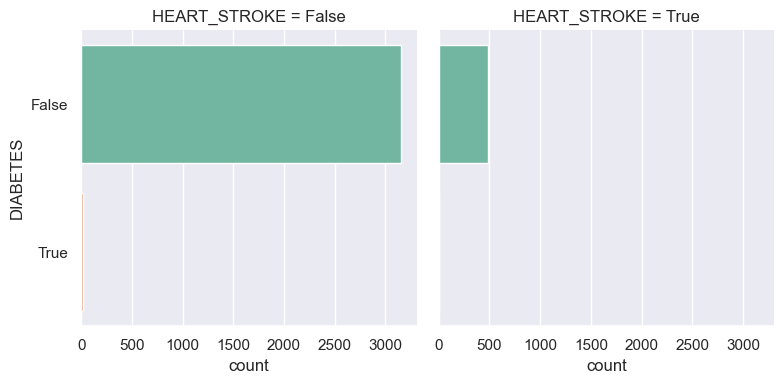

In [386]:
sb.catplot(y = 'DIABETES', data = heart_dis_cln, col = 'HEART_STROKE', kind = 'count', col_wrap = 2, height = 4, 
           palette='Set2')

Text(0.5, 1.0, 'Diabetes vs Heart Stroke')

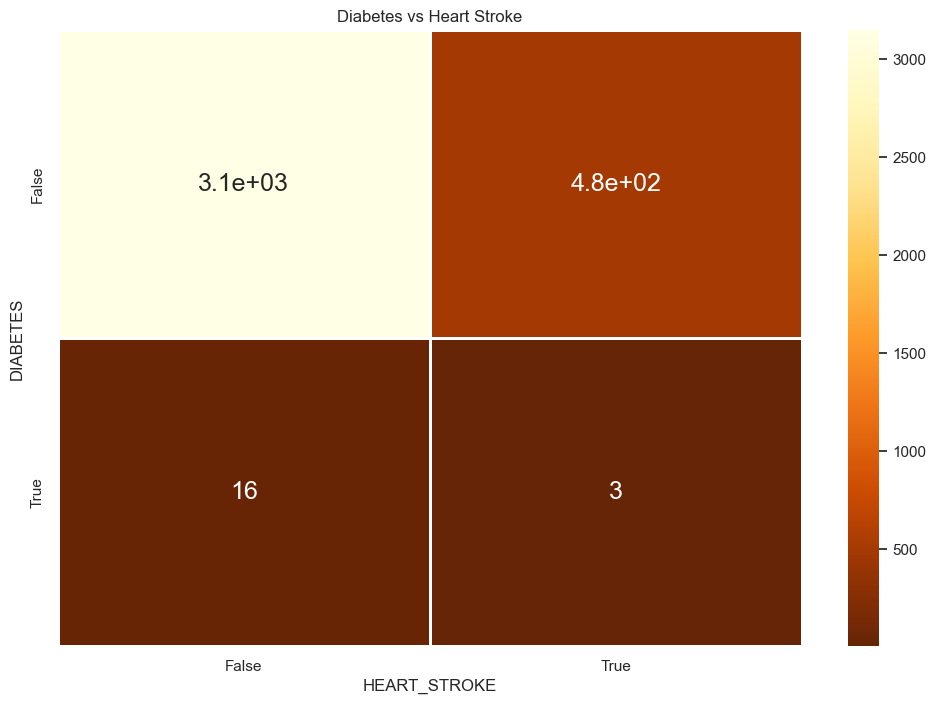

In [387]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(heart_dis_cln.groupby(['DIABETES', 'HEART_STROKE']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "YlOrBr_r")
plt.title("Diabetes vs Heart Stroke")

Export the modified csv file.

In [388]:
heart_dis_cln.to_csv('heart_dis_cln.csv')